In [1]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.2 MB/s eta 0:00:00


In [3]:
pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import xgboost
import random
import datetime
import csv
from datetime import datetime

from sklearn.pipeline import make_pipeline
#from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import explained_variance_score
import matplotlib.dates as mdates

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 구글 드라이브에서 파일 불러오기
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#df_click_stream_new_ori = pd.read_csv('/content/gdrive/MyDrive/Sprint/Section6_Project2/click_stream_new.csv')

In [6]:
#df_click_stream_new_ori.to_parquet('df_click_stream_new.parquet', compression='gzip')

In [7]:
#df = pd.read_parquet('df_click_stream_new.parquet')

In [5]:
df_click_stream_new_ori = pd.read_parquet('/content/gdrive/MyDrive/Sprint/Section6_Project2/df_click_stream_new.parquet')

클릭 스트림 데이터는 사용자의 온라인 상호 작용을 기록하고 분석하는 데 사용됩니다. 웹사이트나 앱에서 사용자의 동작과 행동을 이해하고, 이를 통해 사용자 경험을 개선하거나 마케팅 전략을 수립할 수 있습니다. 이 데이터는 사용자의 경로를 추적하여 어떤 페이지나 기능이 가장 많이 클릭되는지, 어떤 제품이 인기 있는지, 프로모션 코드가 어떤 영향을 미치는지 등을 파악하는 데 활용됩니다.

session_id: 사용자 세션 식별자. 사용자가 웹사이트 또는 앱에서 일련의 상호 작용을 수행하는 동안 생성되는 고유한 세션을 식별하는 값입니다.

event_name: 발생한 이벤트의 이름. 사용자 활동을 설명하는 이벤트의 유형을 나타냅니다. 예를 들어 '클릭', '구매', '검색' 등이 될 수 있습니다.

event_time: 이벤트가 발생한 시간. 일반적으로 날짜와 시간 정보를 포함하며, 사용자 활동의 타임스탬프를 나타냅니다.

event_id: 이벤트의 고유 식별자. 각각의 이벤트를 고유하게 식별하기 위한 값입니다.

traffic_source: 트래픽 소스. 사용자가 사이트에 도달하는 원본을 나타냅니다. 예를 들어 '직접', '검색 엔진', '소셜 미디어' 등이 될 수 있습니다.

product_id: 제품의 고유 식별자. 제품을 식별하는 값으로, 제품과 관련된 이벤트에서 사용될 수 있습니다.

quantity: 제품 수량. 이벤트에서 구매한 제품의 수량을 나타냅니다.

item_price: 제품 가격. 제품의 가격 정보를 나타냅니다.

payment_status: 결제 상태. 구매 이벤트의 경우 결제가 완료되었는지 여부를 나타냅니다.

search_keywords: 검색 키워드. 사용자가 검색한 키워드나 검색 관련 활동에서 사용되는 키워드를 나타냅니다.

promo_code: 프로모션 코드. 사용자가 입력한 프로모션 코드나 할인 코드를 나타냅니다.

promo_amount: 프로모션 할인 금액. 프로모션 코드로 인해 발생한 할인 금액을 나타냅니다.

In [6]:
df_click_stream_new_ori

session_id   event_name  \
0         fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c     HOMEPAGE   
1         fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c       SCROLL   
2         7d440441-e67a-4d36-b324-80ffd636d166     HOMEPAGE   
3         7d440441-e67a-4d36-b324-80ffd636d166  ADD_TO_CART   
4         7d440441-e67a-4d36-b324-80ffd636d166      BOOKING   
...                                        ...          ...   
12833597  ad1063b0-a6e5-40a9-aed6-d1b45741e571       SEARCH   
12833598  64585e37-3fe7-48d7-b79b-ebcb70230eb2     HOMEPAGE   
12833599  64585e37-3fe7-48d7-b79b-ebcb70230eb2  ADD_TO_CART   
12833600  64585e37-3fe7-48d7-b79b-ebcb70230eb2      BOOKING   
12833601  64585e37-3fe7-48d7-b79b-ebcb70230eb2       SEARCH   

                           event_time                              event_id  \
0         2019-09-06T15:54:32.821085Z  9c4388c4-c95b-4678-b5ca-e9cbc0734109   
1         2019-09-06T16:03:57.821085Z  4690e1f5-3f99-42d3-84a5-22c4c4d8500a   
2         2019-09-01T12:05:10.322763Z  88aeaeb5-ec98-4859-852c-8abb483faf31   
3         2019-09-01T12:06:33.322763Z  934e306e-ecc6-472f-9ccb-12c8536910a2   
4         2019-09-01T12:15:29.425431Z  9f4767a1-40fa-4c9c-9524-dfad18634d56   
...                               ...                                   ...   
12833597  2021-06-07T04:37:53.354381Z  4b3b91a5-9bda-44de-87dc-153367071dfc   
12833598  2021-05-05T11:44:14.985835Z  ab0acc87-9578-408a-b47f-c46996b8b52f   
12833599  2021-05-05T11:53:10.985835Z  230d7b67-9934-42f9-9509-b330ac6ae777   
12833600  2021-05-05T12:10:09.135142Z  8996ce49-c5dd-41ed-9231-28bfdb634cbe   
12833601  2021-05-05T11:53:12.985835Z  3c60d8bc-b3e1-41fa-a87b-f65a9053856a   

         traffic_source  product_id  quantity  item_price payment_status  \
0                MOBILE         NaN       NaN         NaN           None   
1                MOBILE         NaN       NaN         NaN           None   
2                MOBILE         NaN       NaN         NaN           None   
3                MOBILE     15315.0       4.0    313529.0           None   
4                MOBILE         NaN       NaN         NaN        Success   
...                 ...         ...       ...         ...            ...   
12833597         MOBILE         NaN       NaN         NaN           None   
12833598         MOBILE         NaN       NaN         NaN           None   
12833599         MOBILE     19820.0       1.0     88918.0           None   
12833600         MOBILE         NaN       NaN         NaN        Success   
12833601         MOBILE         NaN       NaN         NaN           None   

         search_keywords promo_code  promo_amount  
0                   None       None           NaN  
1                   None       None           NaN  
2                   None       None           NaN  
3                   None       None           NaN  
4                   None       None           NaN  
...                  ...        ...           ...  
12833597           Bekas       None           NaN  
12833598            None       None           NaN  
12833599            None       None           NaN  
12833600            None       None           NaN  
12833601            Baju       None           NaN  

[12833602 rows x 12 columns]

* 사이트에 방문한 고객들 데이터

In [5]:
selected_columns = ['session_id', 'event_name', 'event_time']
df_click_stream_new = df_click_stream_new_ori[selected_columns]

In [6]:
df_click_stream_new = df_click_stream_new[df_click_stream_new['event_name'] == 'HOMEPAGE']

In [8]:
import re
# 'event_time' 칼럼의 데이터를 datetime 형식으로 변환
df_click_stream_new['event_time'] = pd.to_datetime(df_click_stream_new['event_time'])

for i, row in df_click_stream_new.iterrows():
    try:
        df_click_stream_new.at[i, 'event_time'] = pd.to_datetime(row['event_time'], format='%Y-%m-%d')
    except ValueError:
        pass

In [9]:
# 'click_date' 칼럼 생성
df_click_stream_new['click_date'] = df_click_stream_new['event_time'].dt.strftime('%Y-%m-%d')
df_click_stream_new['click_date'] = pd.to_datetime(df_click_stream_new['click_date'])

In [10]:
df_click_stream_new = df_click_stream_new.drop(columns=['event_name']).reset_index(drop=True)

* 구매한 고객들 데이터

In [18]:
# ADD_TO_CART 이벤트만 있는 경우의 데이터 추출
add_to_cart_events = df_click_stream_new_ori[df_click_stream_new_ori['event_name'] == 'ADD_TO_CART']
booking_events = df_click_stream_new_ori[df_click_stream_new_ori['event_name'] == 'BOOKING']

# ADD_TO_CART 이벤트만 있는 경우 중에서 BOOKING 이벤트가 있는 경우만 추출
rfm_df_click_stream = add_to_cart_events[add_to_cart_events['session_id'].isin(booking_events['session_id'])]

# 필요한 열만 선택 (product_id, quantity, item_price 등)
rfm_df_click_stream = rfm_df_click_stream[['session_id', 'event_time', 'product_id', 'quantity', 'item_price', 'promo_code',	'promo_amount']]

In [7]:
non_empty_promo = df_click_stream_new_ori[(df_click_stream_new_ori['promo_code'].notnull()) & (df_click_stream_new_ori['promo_amount'].notnull())]
non_empty_promo

session_id event_name  \
20        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2  ADD_PROMO   
46        d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9  ADD_PROMO   
53        98e66f53-f24f-4238-8c9c-34a0482e22d5  ADD_PROMO   
74        1553b735-081d-4dc5-8d5f-80c1bf442e0f  ADD_PROMO   
169       a1027501-f085-479f-a719-1aeec041408c  ADD_PROMO   
...                                        ...        ...   
12832905  cebfe9cd-0754-4151-9ba7-2372164686b7  ADD_PROMO   
12832915  5e7c20e3-e1f0-42ae-9016-b3227169dea9  ADD_PROMO   
12832967  eef8cec1-9dc6-4756-a4bc-0832da4b6e69  ADD_PROMO   
12833104  137b5f97-a8d0-4898-ac99-12cbbfc52362  ADD_PROMO   
12833120  1c2d6c6a-e1b8-4126-9f5d-082738e87b21  ADD_PROMO   

                           event_time                              event_id  \
20        2019-09-09T07:22:05.425431Z  28329764-aa29-4e7a-9d8e-eee88d00a640   
46        2019-09-24T16:16:10.425431Z  7a808081-2384-4a3a-ad00-9f10df4f07a7   
53        2019-10-02T15:14:18.425431Z  1d293181-b1cf-46e0-b5eb-682fe652131d   
74        2019-10-16T20:20:14.425431Z  c86b2a91-0a21-404a-98e9-947d3060fdc2   
169       2019-11-20T03:28:12.425431Z  cef2a298-e38b-4460-bc89-71f7a3039ff7   
...                               ...                                   ...   
12832905  2020-04-05T10:24:17.116768Z  a5ecd91b-ed11-4c8b-adf7-bab2720bc3c6   
12832915  2018-06-03T08:00:35.938975Z  487307cd-222a-4131-bc6a-69effe9f6560   
12832967  2021-07-25T08:23:48.795552Z  7fd98dbb-ed1a-4a5e-998f-d09566a67de0   
12833104  2021-11-18T17:57:33.345950Z  9abcf7c9-41e3-497e-974f-174a27161d2b   
12833120  2021-09-17T14:34:55.708206Z  4dc8868d-509a-4c02-b86d-95331c7e4be7   

         traffic_source  product_id  quantity  item_price payment_status  \
20               MOBILE         NaN       NaN         NaN           None   
46                  WEB         NaN       NaN         NaN           None   
53               MOBILE         NaN       NaN         NaN           None   
74               MOBILE         NaN       NaN         NaN           None   
169              MOBILE         NaN       NaN         NaN           None   
...                 ...         ...       ...         ...            ...   
12832905         MOBILE         NaN       NaN         NaN           None   
12832915         MOBILE         NaN       NaN         NaN           None   
12832967         MOBILE         NaN       NaN         NaN           None   
12833104         MOBILE         NaN       NaN         NaN           None   
12833120         MOBILE         NaN       NaN         NaN           None   

         search_keywords     promo_code  promo_amount  
20                  None         AZ2022        7047.0  
46                  None        BUYMORE        4903.0  
53                  None         AZ2022        6307.0  
74                  None    WEEKENDSERU        5165.0  
169                 None         XX2022        2569.0  
...                  ...            ...           ...  
12832905            None  WEEKENDMANTAP        4272.0  
12832915            None    WEEKENDSERU        1510.0  
12832967            None      LIBURDONG        3204.0  
12833104            None         AZ2022        5284.0  
12833120            None         XX2022        5413.0  

[326535 rows x 12 columns]

In [19]:
# rfm_df_click_stream에 non_empty_promo의 promo_code, promo_amount 칼럼값을 병합
rfm_df_click_stream = rfm_df_click_stream.merge(non_empty_promo[['session_id', 'promo_code', 'promo_amount']], on='session_id', how='left')

# promo_code_x와 promo_amount_x 칼럼 삭제
rfm_df_click_stream.drop(columns=['promo_code_x', 'promo_amount_x'], inplace=True)

# promo_code_y와 promo_amount_y 칼럼을 promo_code와 promo_amount로 이름 변경
rfm_df_click_stream.rename(columns={'promo_code_y': 'promo_code', 'promo_amount_y': 'promo_amount'}, inplace=True)
rfm_df_click_stream = rfm_df_click_stream.reset_index(drop=True)

In [21]:
import re
# 'event_time' 칼럼의 데이터를 datetime 형식으로 변환
rfm_df_click_stream['event_time'] = pd.to_datetime(rfm_df_click_stream['event_time'])

for i, row in rfm_df_click_stream.iterrows():
    try:
        rfm_df_click_stream.at[i, 'event_time'] = pd.to_datetime(row['event_time'], format='%Y-%m-%d')
    except ValueError:
        pass

In [23]:
# 'click_date' 칼럼 생성
rfm_df_click_stream['click_date'] = rfm_df_click_stream['event_time'].dt.strftime('%Y-%m-%d')
rfm_df_click_stream['click_date'] = pd.to_datetime(rfm_df_click_stream['click_date'])

In [25]:
rfm_df_click_stream = rfm_df_click_stream.drop(columns=['event_time'])

In [26]:
rfm_df_click_stream

session_id  product_id  quantity  \
0        7d440441-e67a-4d36-b324-80ffd636d166     15315.0       4.0   
1        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      6133.0       2.0   
2        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      6721.0       1.0   
3        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2     57622.0       1.0   
4        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      5490.0       1.0   
...                                       ...         ...       ...   
1894526  f38416ce-51f2-46b0-a476-776d8fed1cb0      4869.0       1.0   
1894527  c1ce86f6-858b-4009-af5b-f1483a28d020     25127.0       1.0   
1894528  f5c4bbe0-f977-45bb-af23-6ab524df7777     19386.0       1.0   
1894529  ad1063b0-a6e5-40a9-aed6-d1b45741e571     13143.0       1.0   
1894530  64585e37-3fe7-48d7-b79b-ebcb70230eb2     19820.0       1.0   

         item_price promo_code  promo_amount click_date  
0          313529.0        NaN           NaN 2019-09-01  
1          249443.0     AZ2022        7047.0 2019-09-09  
2          134504.0     AZ2022        7047.0 2019-09-09  
3          384716.0     AZ2022        7047.0 2019-09-09  
4          121318.0     AZ2022        7047.0 2019-09-09  
...             ...        ...           ...        ...  
1894526    282771.0        NaN           NaN 2021-08-01  
1894527    166365.0        NaN           NaN 2020-09-22  
1894528    208644.0        NaN           NaN 2022-04-09  
1894529    284949.0        NaN           NaN 2021-06-07  
1894530     88918.0        NaN           NaN 2021-05-05  

[1894531 rows x 7 columns]

In [36]:
df_click_stream_new_ori['event_name'].unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE'], dtype=object)

In [76]:
df_click_stream_new_ori['event_name'].value_counts()

CLICK          2498038
HOMEPAGE       2487126
ADD_TO_CART    1937157
SCROLL         1663571
ITEM_DETAIL    1290396
SEARCH         1173266
BOOKING         852582
PROMO_PAGE      604931
ADD_PROMO       326535
Name: event_name, dtype: int64

'HOMEPAGE': 사용자가 웹사이트나 앱의 홈페이지에 접속한 이벤트를 나타냅니다. 사용자가 초기에 사이트에 접속하는 활동입니다.

'SCROLL': 사용자가 스크롤을 내리는 이벤트를 나타냅니다. 페이지 내용을 아래로 스크롤하거나 이동하는 동작입니다.

'ADD_TO_CART': 사용자가 제품을 장바구니에 추가하는 이벤트를 나타냅니다. 제품을 구매하려는 의도로 장바구니에 추가하는 동작입니다.

'BOOKING': 예약을 생성하는 이벤트를 나타냅니다. 호텔, 항공권 등의 예약과 관련된 활동을 포함합니다.

'SEARCH': 사용자가 검색하는 이벤트를 나타냅니다. 웹사이트 내에서 특정 키워드나 제품을 검색하는 동작을 의미합니다.

'ITEM_DETAIL': 사용자가 특정 제품의 상세 정보를 보는 이벤트를 나타냅니다. 제품에 대한 자세한 정보를 확인하는 활동입니다.

'ADD_PROMO': 프로모션 코드나 할인 코드를 추가하는 이벤트를 나타냅니다. 할인 혜택을 받으려는 동작을 의미합니다.

'CLICK': 사용자가 어떤 요소나 링크를 클릭하는 이벤트를 나타냅니다. 다양한 링크나 버튼을 클릭하는 활동을 포함합니다.

'PROMO_PAGE': 프로모션 페이지를 방문하는 이벤트를 나타냅니다. 특정 프로모션에 대한 정보를 확인하는 활동입니다.

각각의 이벤트는 사용자의 행동을 나타내며, 이러한 데이터는 사용자 동작 및 웹사이트/앱의 사용 패턴을 분석하여 사용자 경험을 개선하거나 비즈니스 전략을 구축하는 데 활용될 수 있습니다.

전환수 / 클릭수 * 100 = 전환율

입니다.

전환수의 클릭수에 대한 비율을 말합니다.

여기서 혼동이 될 만한 것은 클릭수인데 클릭은 2가지로 구분할 수 있습니다.

유효 클릭과 무효 클릭으로 구분할 수 있습니다.

CTR을 계산할 때 무효클릭까지 넣을 것인가? 유효클릭만 계산에 넣을 것인가입니다.

유효 클릭은 광고를 클릭(모바일이라면 손가락으로 터치)하고 확실하게 랜딩한 것을 말하는 것이고

무효 클릭은 랜딩을 못한 것을 말합니다.

보통은 전환율을 계산할때 유효, 무효를 구분하지 않지만 정밀하게 하기 위해서

전환수 / 유효클릭수 * 100 으로 할 수도 있습니다.

전환율이 높으면 좋은 것일까??
당연히 좋습니다.

광고시장에서 성과지표로 볼 때 전환율이 높은 것은 광고업체에게도 광고주에게도 좋습니다.

사내에서 직접 내부 마케팅을 하는 경우에도 전환율이 높으면 당연히 좋습니다.

전환율이 높이기 위한 방법은 많은 빵법과 요령이 있습니다만 그것은 다른 포스트에서 다루기로 하겠습니다.

In [11]:
# 전환수 계산
conversion_count = df_click_stream_new[(df_click_stream_new['event_name'] == 'ADD_TO_CART') | (df_click_stream_new['event_name'] == 'BOOKING')]['event_id'].nunique()

# 클릭수 계산
click_count = df_click_stream_new['event_id'].nunique()

# 결과 출력
print(f"전환수: {conversion_count}")
print(f"클릭수: {click_count}")

# 전환율 계산, 전환수 / 클릭수 * 100 = 전환율
conversion_rate = (conversion_count / click_count) * 100
print(f"전환률: {conversion_rate}")

전환수: 2789739
클릭수: 12833602
전환률: 21.737770892380798


In [14]:
df_customer = pd.read_csv('/content/gdrive/MyDrive/Sprint/Section6_Project2/customer.csv')

customer_id: 고객 식별자. 각 고객을 고유하게 식별하기 위한 고유한 값입니다.

first_name: 고객의 이름(이름의 첫 부분).

last_name: 고객의 성(성의 마지막 부분).

username: 사용자 이름 또는 닉네임. 고객이 시스템 내에서 사용하는 고유한 이름입니다.

email: 고객의 이메일 주소. 연락 및 계정 관련 정보를 전송하기 위해 사용됩니다.

gender: 고객의 성별. 주로 '남성' 또는 '여성'과 같은 값으로 표시됩니다.

birthdate: 고객의 생년월일. 연령대 분석이나 타겟 마케팅을 위해 사용될 수 있습니다.

device_type: 사용하는 장치 유형, 예를 들어 '스마트폰', '태블릿', '노트북' 등.

device_id: 장치의 고유 식별자. 주로 모바일 장치의 경우 사용되며, 각 장치를 고유하게 식별하기 위한 값입니다.

device_version: 장치의 소프트웨어 버전 또는 모델 정보.

home_location_lat: 고객의 집 주소의 위도 정보.

home_location_long: 고객의 집 주소의 경도 정보.

home_location: 고객의 집 주소(텍스트 형식).

home_country: 고객의 국적 또는 거주 국가.

first_join_date: 고객이 서비스에 처음 가입한 날짜.

In [22]:
df_customer

customer_id first_name    last_name  \
0             2870       Lala      Maryati   
1             8193   Maimunah   Laksmiwati   
2             7279    Bakiman  Simanjuntak   
3            88813    Cahyadi    Maheswara   
4            82542    Irnanto       Wijaya   
...            ...        ...          ...   
99995        34743      Manah      Mustofa   
99996        72065       Danu      Pradana   
99997        32818      Talia       Aryani   
99998        75597     Ajimat       Mansur   
99999        40573       Yani        Usada   

                                   username  \
0      671a0865-ac4e-4dc4-9c4f-c286a1176f7e   
1      83be2ba7-8133-48a4-bbcb-b46a2762473f   
2      3250e5a3-1d23-4675-a647-3281879d42be   
3      df797edf-b465-4a80-973b-9fbb612260c2   
4      36ab08e1-03de-42a8-9e3b-59528c798824   
...                                     ...   
99995  bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c   
99996  4af2b3d5-c573-4032-b29c-24782745a2f6   
99997  af0edbfa-f354-4765-813b-b9f151022555   
99998  35cd82f3-6b86-42a2-bb15-933770d7f250   
99999  f5a2ab29-481d-49e6-960e-cb864ee1ed5a   

                                                   email gender  birthdate  \
0      671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...      F 1996-06-14   
1      83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...      F 1993-08-16   
2      3250e5a3_1d23_4675_a647_3281879d42be@startupca...      M 1989-01-23   
3      df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...      M 1991-01-05   
4      36ab08e1_03de_42a8_9e3b_59528c798824@startupca...      M 2000-07-15   
...                                                  ...    ...        ...   
99995  bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...      M 2000-11-17   
99996  4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...      M 1998-03-30   
99997  af0edbfa_f354_4765_813b_b9f151022555@startupca...      F 1993-01-12   
99998  35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...      M 2000-09-13   
99999  f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...      F 1987-09-10   

      device_type                             device_id  \
0             iOS  c9c0de76-0a6c-4ac2-843f-65264ab9fe63   
1         Android  fb331c3d-f42e-40fe-afe2-b4b73a8a6e25   
2             iOS  d13dde0a-6ae1-43c3-83a7-11bbb922730b   
3             iOS  f4c18515-c5be-419f-8142-f037be47c9cd   
4             iOS  e46e4c36-4630-4736-8fcf-663db29ca3b0   
...           ...                                   ...   
99995     Android  fa1914a5-0c12-4393-8d6c-af4e4a4de6aa   
99996     Android  d8234d67-6954-4e05-8293-d37ef25bfd7e   
99997     Android  3c586f64-aab7-4dd6-be94-5d47c6361081   
99998     Android  3b209c58-d305-4b46-9363-b90a3914f008   
99999     Android  b6bc29e0-5a22-47af-b31e-0972aafd4cab   

                                   device_version  home_location_lat  \
0      iPhone; CPU iPhone OS 14_2_1 like Mac OS X          -1.043345   
1                                   Android 2.2.1          -6.212489   
2           iPad; CPU iPad OS 4_2_1 like Mac OS X          -8.631607   
3            iPad; CPU iPad OS 14_2 like Mac OS X           1.299332   
4      iPhone; CPU iPhone OS 10_3_3 like Mac OS X          -2.980807   
...                                           ...                ...   
99995                               Android 4.3.1          -5.203523   
99996                               Android 8.0.0           4.474702   
99997                                  Android 11          -3.330376   
99998                                 Android 7.1          -2.173114   
99999                               Android 3.2.6          -6.524369   

       home_location_long        home_location first_join_date  \
0              101.360523       Sumatera Barat      2019-07-21   
1              106.818850         Jakarta Raya      2017-07-16   
2              116.428436  Nusa Tenggara Barat      2020-08-23   
3              115.774934     Kalimantan Timur      2021-10-03   
4              114.924675   Kalimantan Selatan  

In [6]:
df_product = pd.read_csv('/content/gdrive/MyDrive/Sprint/Section6_Project2/product.csv', on_bad_lines='skip')

id: 제품의 고유 식별자. 각 제품을 고유하게 식별하기 위한 값입니다.

gender: 제품의 대상 성별. 예를 들어 '남성', '여성', '남녀 공용' 등이 포함될 수 있습니다.

masterCategory: 제품의 주요 카테고리. 제품이 속하는 주요 분류를 나타냅니다. 예를 들어 '의류', '신발', '액세서리' 등이 될 수 있습니다.

subCategory: 제품의 하위 카테고리. 주요 카테고리 내에서 세부 분류를 나타냅니다. 예를 들어 '티셔츠', '운동화', '시계' 등이 될 수 있습니다.

articleType: 제품의 아티클 유형 또는 종류. 제품의 특성을 설명하는 정보로, 예를 들어 '긴팔 티셔츠', '런닝화', '레더 백' 등이 될 수 있습니다.

baseColour: 제품의 기본 색상. 제품의 주요 색상을 나타냅니다.

season: 제품이 속하는 계절. 예를 들어 '봄', '여름', '가을', '겨울' 등이 될 수 있습니다.

year: 제품 출시 연도. 제품의 출시 연도를 나타냅니다.

usage: 제품의 사용 용도 또는 목적. 예를 들어 '일상', '스포츠', '파티' 등이 될 수 있습니다.

productDisplayName: 제품의 표시 이름 또는 브랜드 이름. 고객에게 제공되는 제품 이름이나 브랜드 이름을 나타냅니다.

In [7]:
df_product

id gender masterCategory subCategory            articleType  \
0      15970    Men        Apparel     Topwear                 Shirts   
1      39386    Men        Apparel  Bottomwear                  Jeans   
2      59263  Women    Accessories     Watches                Watches   
3      21379    Men        Apparel  Bottomwear            Track Pants   
4      53759    Men        Apparel     Topwear                Tshirts   
...      ...    ...            ...         ...                    ...   
44419  17036    Men       Footwear       Shoes           Casual Shoes   
44420   6461    Men       Footwear  Flip Flops             Flip Flops   
44421  18842    Men        Apparel     Topwear                Tshirts   
44422  46694  Women  Personal Care   Fragrance  Perfume and Body Mist   
44423  51623  Women    Accessories     Watches                Watches   

      baseColour  season    year   usage  \
0      Navy Blue    Fall  2011.0  Casual   
1           Blue  Summer  2012.0  Casual   
2         Silver  Winter  2016.0  Casual   
3          Black    Fall  2011.0  Casual   
4           Grey  Summer  2012.0  Casual   
...          ...     ...     ...     ...   
44419      White  Summer  2013.0  Casual   
44420        Red  Summer  2011.0  Casual   
44421       Blue    Fall  2011.0  Casual   
44422       Blue  Spring  2017.0  Casual   
44423       Pink  Winter  2016.0  Casual   

                                    productDisplayName  
0                     Turtle Check Men Navy Blue Shirt  
1                   Peter England Men Party Blue Jeans  
2                             Titan Women Silver Watch  
3        Manchester United Men Solid Black Track Pants  
4                                Puma Men Grey T-shirt  
...                                                ...  
44419                        Gas Men Caddy Casual Shoe  
44420               Lotto Men's Soccer Track Flip Flop  
44421             Puma Men Graphic Stellar Blue Tshirt  
44422                   Rasasi Women Blue Lady Perfume  
44423  Fossil Women Pink Dial Chronograph Watch ES3050  

[44424 rows x 10 columns]

In [30]:
df_transaction_new = pd.read_csv('/content/gdrive/MyDrive/Sprint/Section6_Project2/transaction_new.csv')

이러한 거래 데이터는 판매나 주문과 관련된 정보를 포함하며, 결제 상태, 제품 정보, 배송 정보 등을 통해 거래 프로세스를 관리하고 분석하는 데 사용됩니다. 이를 통해 고객의 구매 패턴을 파악하고 결제 상태를 모니터링하며, 효과적인 주문 처리 및 배송 관리를 할 수 있습니다.

created_at: 거래가 생성된 시간. 거래가 생성된 날짜와 시간을 나타내는 타임스탬프입니다.

customer_id: 고객 식별자. 해당 거래를 발생시킨 고객을 고유하게 식별하는 값입니다.

booking_id: 예약 식별자. 거래가 예약과 관련되어 있는 경우 해당 예약을 고유하게 식별하는 값입니다.

session_id: 사용자 세션 식별자. 거래가 발생한 세션을 나타내는 값으로, 사용자의 활동을 그룹화할 때 사용됩니다.

payment_method: 결제 방법. 거래에 사용된 결제 수단을 나타냅니다. 예를 들어 '신용카드', '페이팔', '현금' 등이 될 수 있습니다.

payment_status: 결제 상태. 거래의 결제가 완료되었는지 여부를 나타냅니다.

promo_amount: 프로모션 할인 금액. 거래에 적용된 프로모션 코드로 인해 발생한 할인 금액을 나타냅니다.

promo_code: 프로모션 코드. 사용된 프로모션 코드나 할인 코드를 나타냅니다.

shipment_fee: 배송 비용. 제품 배송에 대한 비용을 나타냅니다.

shipment_date_limit: 배송 날짜 제한. 제품 배송 가능한 최대 날짜를 나타냅니다.

shipment_location_lat: 배송 장소의 위도 정보.

shipment_location_long: 배송 장소의 경도 정보.

total_amount: 거래의 총 금액. 결제한 총 금액으로 제품 가격, 배송 비용 등을 포함할 수 있습니다.

product_id: 제품의 고유 식별자. 거래에 포함된 제품을 식별하는 값입니다.

quantity: 제품 수량. 거래에서 구매한 제품의 수량을 나타냅니다.

item_price: 제품 가격. 거래에서 각 제품의 가격을 나타냅니다.

In [31]:
# 'created_at' 칼럼의 데이터를 datetime 형식으로 변환
df_transaction_new['created_at'] = pd.to_datetime(df_transaction_new['created_at'])

# 'order_date' 칼럼 생성 (연도와 월만 추출하여 저장)
df_transaction_new['order_date'] = df_transaction_new['created_at'].dt.strftime('%Y-%m-%d')
df_transaction_new['order_date'] = pd.to_datetime(df_transaction_new['order_date'])

In [17]:
df_transaction_new

created_at  customer_id  \
0       2018-07-29 15:22:01.458193+00:00         5868   
1       2018-07-30 12:40:22.365620+00:00         4774   
2       2018-09-15 11:51:17.365620+00:00         4774   
3       2018-11-01 11:23:48.365620+00:00         4774   
4       2018-12-18 11:20:30.365620+00:00         4774   
...                                  ...          ...   
1254580 2021-09-21 22:10:05.074873+00:00        25121   
1254581 2021-12-09 07:35:18.222046+00:00        34829   
1254582 2021-12-11 01:20:36.944593+00:00        99645   
1254583 2019-12-18 11:01:09.623382+00:00        87319   
1254584 2019-12-19 12:47:14.701215+00:00        58180   

                                   booking_id  \
0        186e2bee-0637-4710-8981-50c2d737bc42   
1        caadb57b-e808-4f94-9e96-8a7d4c9898db   
2        6000fffb-9c1a-4f4a-9296-bc8f6b622b50   
3        f5e530a7-4350-4cd1-a3bc-525b5037bcab   
4        0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2   
...                                       ...   
1254580  66f02fa4-c62e-497a-8b6e-be239009b50a   
1254581  ccde6b83-ee42-4cce-b2cd-976574886eac   
1254582  5bcd3434-1dc6-44bb-ae63-fd19714cbd6c   
1254583  af7f291a-b01b-4bfd-89a9-237b16368b15   
1254584  b242e188-5f94-4448-a038-c5865842374b   

                                   session_id payment_method payment_status  \
0        3abaa6ce-e320-4e51-9469-d9f3fa328e86     Debit Card        Success   
1        2ee5ead1-f13e-4759-92df-7ff48475e970    Credit Card        Success   
2        93325fb6-eb00-4268-bb0e-6471795a0ad0            OVO        Success   
3        bcad5a61-1b67-448d-8ff4-781d67bc56e4    Credit Card        Success   
4        df1042ab-13e6-4072-b9d2-64a81974c51a    Credit Card        Success   
...                                       ...            ...            ...   
1254580  484eecde-9f4a-42de-a8df-7ce6668101f4     Debit Card         Failed   
1254581  954e1211-4d45-4d0b-ba84-53e80119592c            OVO        Success   
1254582  e6e6c108-abd0-49a2-b0a5-691117f9cfe1    Credit Card        Success   
1254583  bb6e5426-a3f3-426a-b99d-79173eaa234b    Credit Card        Success   
1254584  5e3183df-198b-40e0-b861-27ef694a832a          Gopay        Success   

         promo_amount   promo_code  shipment_fee          shipment_date_limit  \
0                1415  WEEKENDSERU         10000  2018-08-03T05:07:24.812676Z   
1                   0          NaN         10000  2018-08-03T01:29:03.415705Z   
2                   0          NaN         10000  2018-09-18T08:41:49.422380Z   
3                   0          NaN             0  2018-11-05T17:42:27.954235Z   
4                   0          NaN             0  2018-12-23T17:24:07.361785Z   
...               ...          ...           ...                          ...   
1254580             0          NaN             0  2021-09-27T00:43:40.992167Z   
1254581          5010       AZ2022         10000  2021-12-12T07:52:44.803822Z   
1254582          2181  WEEKENDSERU          5000  2021-12-12T13:28:22.848703Z   
1254583          4503       AZ2022             0  2019-12-23T22:56:46.831720Z   
1254584          4724      BUYMORE         10000  2019-12-23T06:02:05.828334Z   

         shipment_location_lat  shipment_location_long  total_amount  \
0                    -8.227893              111.969107        199832   
1                     3.013470              107.802514        155526   
2                    -2.579428              115.743885        550696   
3                    -3.602334              120.363824        271012   
4                    -3.602334              120.363824        198753   
...                        ...                     ...           ...   
1254580              -6.869535              111.077145        226820   
1254581              -8.677264              115.176947        359203   
1254582              -6.185498              106.831093       1158159   
1254583              -7.155977              110.891858        184143   
1254584              -6.155983            

In [53]:
df_transaction_new.payment_method.value_counts()

Credit Card    439876
Gopay          251577
OVO            249065
Debit Card     202552
LinkAja        111515
Name: payment_method, dtype: int64

Credit Card: 신용카드를 사용한 결제를 나타냅니다. 신용카드 정보를 입력하여 결제하는 방식입니다.

Gopay: 인도네시아의 전자 지불 서비스인 "Gopay"를 사용한 결제를 나타냅니다. 모바일 지갑 앱을 통해 결제하는 방식으로, 인도네시아에서 많이 사용됩니다.

OVO: 또 다른 인도네시아의 전자 지불 서비스인 "OVO"를 사용한 결제를 나타냅니다. 마찬가지로 모바일 지갑 앱을 통해 결제하는 방식입니다.

Debit Card: 직불카드나 체크카드 등을 사용한 결제를 나타냅니다. 실시간으로 계좌에서 돈을 차감하여 결제하는 방식입니다.

LinkAja: 인도네시아의 전자 지불 및 금융 플랫폼인 "LinkAja"를 사용한 결제를 나타냅니다. 모바일 지갑 앱을 통해 결제 및 송금 등을 할 수 있는 서비스입니다.

---------------------------------------------

customer_id: 고객 식별자. 각 고객을 고유하게 식별하기 위한 고유한 값입니다.

first_name: 고객의 이름(이름의 첫 부분).

last_name: 고객의 성(성의 마지막 부분).

username: 사용자 이름 또는 닉네임. 고객이 시스템 내에서 사용하는 고유한 이름입니다.

email: 고객의 이메일 주소. 연락 및 계정 관련 정보를 전송하기 위해 사용됩니다.

gender: 고객의 성별. 주로 '남성' 또는 '여성'과 같은 값으로 표시됩니다.

birthdate: 고객의 생년월일. 연령대 분석이나 타겟 마케팅을 위해 사용될 수 있습니다.

device_type: 사용하는 장치 유형, 예를 들어 '스마트폰', '태블릿', '노트북' 등.

device_id: 장치의 고유 식별자. 주로 모바일 장치의 경우 사용되며, 각 장치를 고유하게 식별하기 위한 값입니다.

device_version: 장치의 소프트웨어 버전 또는 모델 정보.

home_location_lat: 고객의 집 주소의 위도 정보.

home_location_long: 고객의 집 주소의 경도 정보.

home_location: 고객의 집 주소(텍스트 형식).

home_country: 고객의 국적 또는 거주 국가.

first_join_date: 고객이 서비스에 처음 가입한 날짜.

In [27]:
df_customer = pd.read_csv('/content/gdrive/MyDrive/Sprint/Section6_Project2/customer.csv')

* 결측치, 중복값 없음

In [5]:
df_customer.isna().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

In [6]:
df_customer.duplicated().sum()

0

In [28]:
# 'first_join_date' 칼럼의 데이터를 datetime 형식으로 변환
df_customer['first_join_date'] = pd.to_datetime(df_customer['first_join_date'])

"""
# 'join_year_month' 칼럼 생성 (연도와 월만 추출하여 저장)
df_customer['join_year_month'] = df_customer['first_join_date'].dt.strftime('%Y-%m-%d')
df_customer['join_year_month'] = pd.to_datetime(df_customer['join_year_month'])
"""

"\n# 'join_year_month' 칼럼 생성 (연도와 월만 추출하여 저장)\ndf_customer['join_year_month'] = df_customer['first_join_date'].dt.strftime('%Y-%m-%d')\ndf_customer['join_year_month'] = pd.to_datetime(df_customer['join_year_month'])\n"

In [29]:
df_customer = df_customer.drop(columns=['home_country'])

* 나이 칼럼 추가

In [20]:
# 현재 날짜 구하기
current_date = datetime.now()

# 생년월일을 날짜로 변환하여 나이 계산 후 'Age' 칼럼 추가
df_customer['birthdate'] = pd.to_datetime(df_customer['birthdate'])
df_customer['age'] = (current_date - df_customer['birthdate']).astype('<m8[Y]').astype(int)

In [8]:
# 가입 연도별 가입 고객 수 계산
df_customer['join_year'] = df_customer['first_join_date'].dt.year
join_count_by_year = df_customer['join_year'].value_counts().sort_index()
# 가입 월별 가입 고객 수 계산
df_customer['join_month'] = df_customer['first_join_date'].dt.month
join_count_by_month = df_customer['join_month'].value_counts().sort_index()

In [24]:
df_customer

customer_id first_name    last_name  \
0             2870       Lala      Maryati   
1             8193   Maimunah   Laksmiwati   
2             7279    Bakiman  Simanjuntak   
3            88813    Cahyadi    Maheswara   
4            82542    Irnanto       Wijaya   
...            ...        ...          ...   
99995        34743      Manah      Mustofa   
99996        72065       Danu      Pradana   
99997        32818      Talia       Aryani   
99998        75597     Ajimat       Mansur   
99999        40573       Yani        Usada   

                                   username  \
0      671a0865-ac4e-4dc4-9c4f-c286a1176f7e   
1      83be2ba7-8133-48a4-bbcb-b46a2762473f   
2      3250e5a3-1d23-4675-a647-3281879d42be   
3      df797edf-b465-4a80-973b-9fbb612260c2   
4      36ab08e1-03de-42a8-9e3b-59528c798824   
...                                     ...   
99995  bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c   
99996  4af2b3d5-c573-4032-b29c-24782745a2f6   
99997  af0edbfa-f354-4765-813b-b9f151022555   
99998  35cd82f3-6b86-42a2-bb15-933770d7f250   
99999  f5a2ab29-481d-49e6-960e-cb864ee1ed5a   

                                                   email gender  birthdate  \
0      671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...      F 1996-06-14   
1      83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...      F 1993-08-16   
2      3250e5a3_1d23_4675_a647_3281879d42be@startupca...      M 1989-01-23   
3      df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...      M 1991-01-05   
4      36ab08e1_03de_42a8_9e3b_59528c798824@startupca...      M 2000-07-15   
...                                                  ...    ...        ...   
99995  bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...      M 2000-11-17   
99996  4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...      M 1998-03-30   
99997  af0edbfa_f354_4765_813b_b9f151022555@startupca...      F 1993-01-12   
99998  35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...      M 2000-09-13   
99999  f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...      F 1987-09-10   

      device_type                             device_id  \
0             iOS  c9c0de76-0a6c-4ac2-843f-65264ab9fe63   
1         Android  fb331c3d-f42e-40fe-afe2-b4b73a8a6e25   
2             iOS  d13dde0a-6ae1-43c3-83a7-11bbb922730b   
3             iOS  f4c18515-c5be-419f-8142-f037be47c9cd   
4             iOS  e46e4c36-4630-4736-8fcf-663db29ca3b0   
...           ...                                   ...   
99995     Android  fa1914a5-0c12-4393-8d6c-af4e4a4de6aa   
99996     Android  d8234d67-6954-4e05-8293-d37ef25bfd7e   
99997     Android  3c586f64-aab7-4dd6-be94-5d47c6361081   
99998     Android  3b209c58-d305-4b46-9363-b90a3914f008   
99999     Android  b6bc29e0-5a22-47af-b31e-0972aafd4cab   

                                   device_version  home_location_lat  \
0      iPhone; CPU iPhone OS 14_2_1 like Mac OS X          -1.043345   
1                                   Android 2.2.1          -6.212489   
2           iPad; CPU iPad OS 4_2_1 like Mac OS X          -8.631607   
3            iPad; CPU iPad OS 14_2 like Mac OS X           1.299332   
4      iPhone; CPU iPhone OS 10_3_3 like Mac OS X          -2.980807   
...                                           ...                ...   
99995                               Android 4.3.1          -5.203523   
99996                               Android 8.0.0           4.474702   
99997                                  Android 11          -3.330376   
99998                                 Android 7.1          -2.173114   
99999                               Android 3.2.6          -6.524369   

       home_location_long        home_location first_join_date  age  
0              101.360523       Sumatera Barat      2019-07-21   27  
1              106.818850         Jakarta Raya      2017-07-16   30  
2              116.428436  Nusa Tenggara Barat      2020-08-23   34  
3              115.774934     Kalimantan Timur      2021-10-03   32  
4              114.924675   

In [34]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         100000 non-null  int64         
 1   first_name          100000 non-null  object        
 2   last_name           100000 non-null  object        
 3   username            100000 non-null  object        
 4   email               100000 non-null  object        
 5   gender              100000 non-null  object        
 6   birthdate           100000 non-null  datetime64[ns]
 7   device_type         100000 non-null  object        
 8   device_id           100000 non-null  object        
 9   device_version      100000 non-null  object        
 10  home_location_lat   100000 non-null  float64       
 11  home_location_long  100000 non-null  float64       
 12  home_location       100000 non-null  object        
 13  first_join_date     100000 non

In [13]:
# 전체 이름 칼럼 생성
df_customer['full_name'] = df_customer['first_name'] + ' ' + df_customer['last_name']
df_customer['full_name'].value_counts()

Putri Agustina     14
Rahmi Kusmawati    14
Sarah Rahimah      14
Rahmi Melani       14
Cindy Namaga       13
                   ..
Jatmiko Pradana     1
Virman Prasetyo     1
Samsul Lazuardi     1
Jabal Halim         1
Danu Pradana        1
Name: full_name, Length: 40430, dtype: int64

In [17]:
# 'first_name', 'last_name', 'birthdate', 'gender' 칼럼을 기준으로 고객들을 그룹화하고 value count 계산
duplicate_customers = df_customer.groupby(['first_name', 'last_name', 'birthdate', 'gender']).size().reset_index(name='count')

# 중복된 고객들만 추출
duplicate_customers = duplicate_customers[duplicate_customers['count'] > 1]

# 결과 출력
print(duplicate_customers)

      first_name  last_name  birthdate gender  count
5020       Anita   Yulianti 1998-08-18      F      2
14531    Cinthia    Hastuti 1994-08-03      F      2
32680       Hana    Yolanda 2004-05-30      F      2
53109      Lidya    Wastuti 1996-04-16      F      2
57801       Maya    Puspita 1993-08-02      F      2
61301      Najwa  Wulandari 1997-06-13      F      2
63423      Nurul   Nasyidah 1993-08-10      F      2
71155      Putri    Sudiati 2003-02-14      F      2
73565      Rahmi     Rahayu 2000-12-31      F      2
77184    Sabrina    Hasanah 1993-07-24      F      2
79177      Salwa    Laksita 1987-10-30      F      2
80287       Sari   Winarsih 1991-07-05      F      2
81217     Shania    Nuraini 2002-04-08      F      2
88067       Ulya     Farida 2000-03-30      F      2
93972      Winda     Melani 2000-07-19      F      2
96231      Yulia    Hasanah 1989-09-05      F      2
96751    Yuliana    Zulaika 2002-08-10      F      2


In [15]:
df_customer.birthdate.value_counts()

1999-07-31    54
1995-06-30    48
1996-06-30    44
1996-07-31    44
1998-07-31    43
              ..
1969-03-04     1
2009-12-10     1
1977-01-19     1
1981-10-19     1
2012-07-12     1
Name: birthdate, Length: 13003, dtype: int64

* 남성 여성 비율

In [18]:
df_customer['gender'].value_counts(normalize=True)

F    0.6423
M    0.3577
Name: gender, dtype: float64

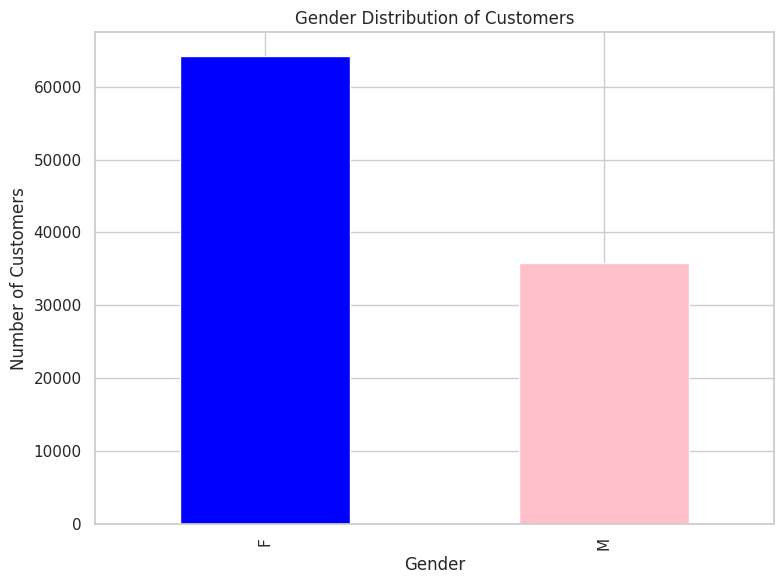

In [47]:
# 고객 성별 분포 시각화
# 성별 분포 계산
gender_counts = df_customer['gender'].value_counts()

# 시각화 설정
plt.figure(figsize=(8, 6))

# 막대 그래프 그리기
gender_counts.plot(kind='bar', color=['blue', 'pink'])

# 그래프 타이틀과 레이블 설정
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')

# 그래프 표시
plt.tight_layout()
plt.show()

* 소프트웨어 비율

In [20]:
df_customer['device_type'].value_counts(normalize=True)

Android    0.76637
iOS        0.23363
Name: device_type, dtype: float64

In [22]:
df_customer['device_version'].value_counts(normalize=True)

Android 2.2.2                                 0.01296
Android 4.4                                   0.01294
Android 4.0.4                                 0.01291
Android 4.3                                   0.01285
Android 3.0                                   0.01278
                                               ...   
iPad; CPU iPad OS 14_2 like Mac OS X          0.00949
iPhone; CPU iPhone OS 10_3_4 like Mac OS X    0.00948
iPad; CPU iPad OS 3_1_3 like Mac OS X         0.00933
iPhone; CPU iPhone OS 9_3_5 like Mac OS X     0.00907
iPhone; CPU iPhone OS 6_1_6 like Mac OS X     0.00902
Name: device_version, Length: 86, dtype: float64

<Figure size 1200x800 with 0 Axes>

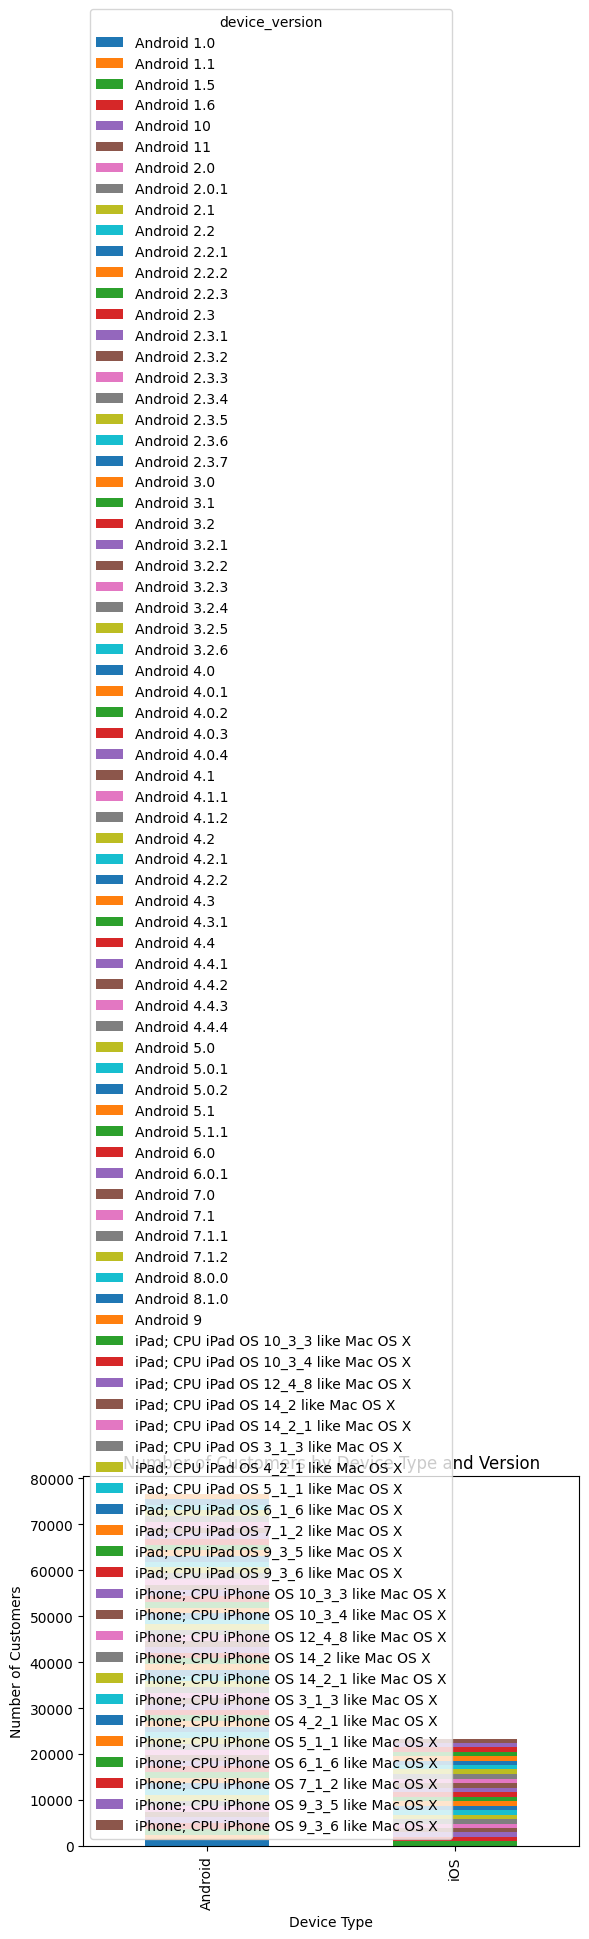

In [11]:
# 장치 유형과 버전별 가입 고객 수 계산
device_counts = df_customer.groupby(['device_type', 'device_version']).size().unstack()

# 시각화 설정
plt.figure(figsize=(12, 8))

# 막대 그래프 그리기
device_counts.plot(kind='bar', stacked=True)

# 그래프 타이틀과 레이블 설정
plt.title('Number of Customers by Device Type and Version')
plt.xlabel('Device Type')
plt.ylabel('Number of Customers')

# 그래프 표시
plt.tight_layout()
plt.show()

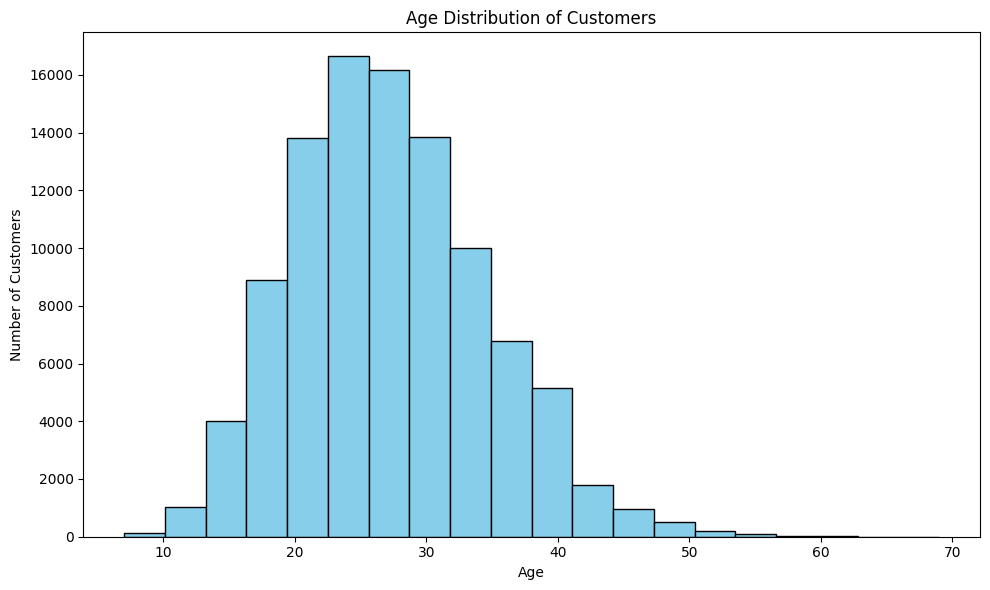

In [12]:
# 연령대별 가입 고객 수
# 시각화 설정
plt.figure(figsize=(10, 6))

# 히스토그램 그리기
plt.hist(df_customer['Age'], bins=20, color='skyblue', edgecolor='black')

# 그래프 타이틀과 레이블 설정
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

# 그래프 표시
plt.tight_layout()
plt.show()

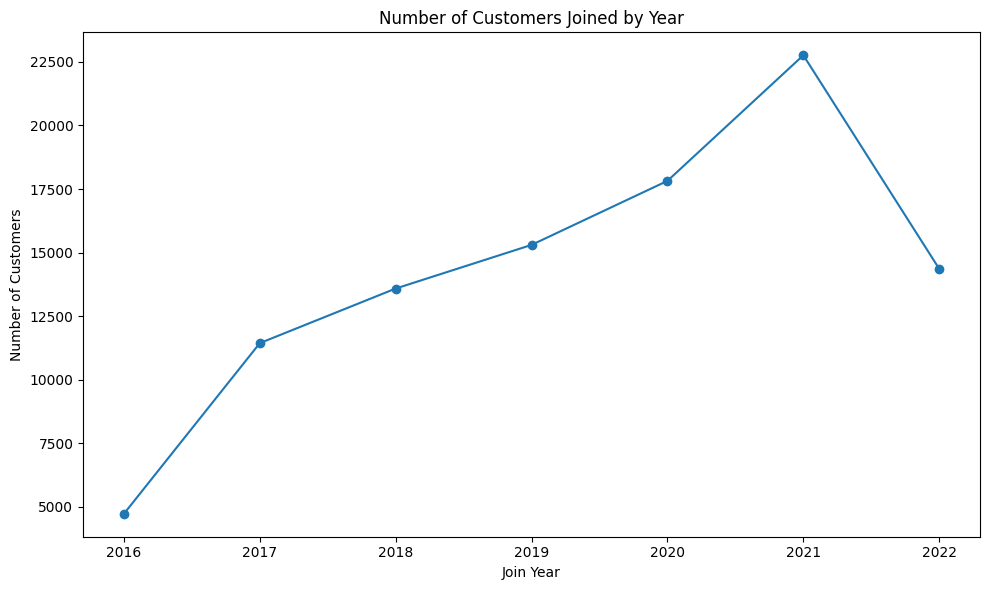

In [15]:
# 가입 연도별 가입 고객 수 시각화

# 시각화 설정
plt.figure(figsize=(10, 6))

# 선 그래프 그리기
join_count_by_year.plot(kind='line', marker='o')

# 그래프 타이틀과 레이블 설정
plt.title('Number of Customers Joined by Year')
plt.xlabel('Join Year')
plt.ylabel('Number of Customers')

# 그래프 표시
plt.tight_layout()
plt.show()

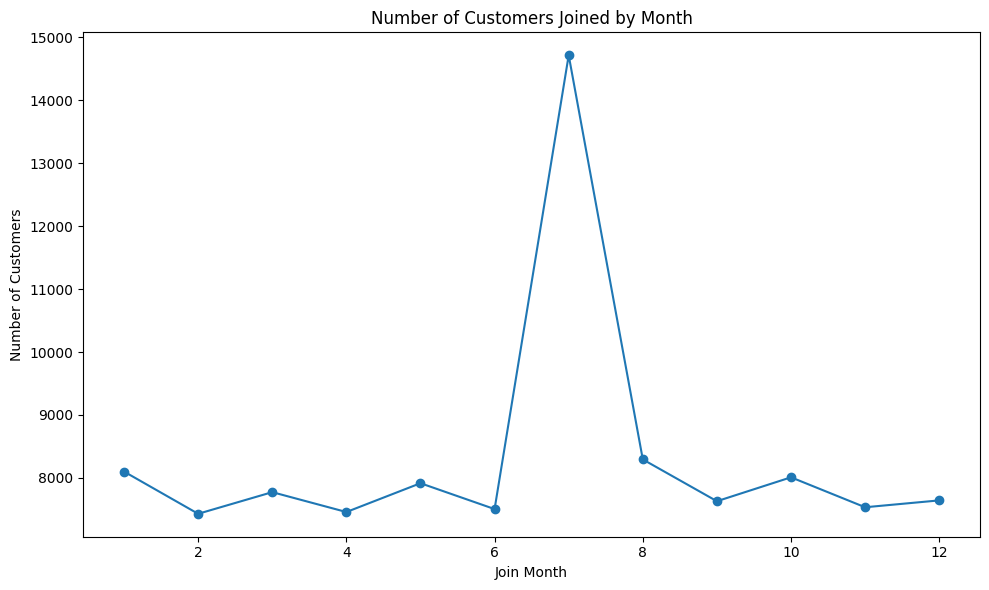

In [16]:
# 가입 월별 가입 고객 수 시각화
# 시각화 설정
plt.figure(figsize=(10, 6))

# 선 그래프 그리기
join_count_by_month.plot(kind='line', x='join_month', y='join_count', marker='o')

# 그래프 타이틀과 레이블 설정
plt.title('Number of Customers Joined by Month')
plt.xlabel('Join Month')
plt.ylabel('Number of Customers')

# 그래프 표시
plt.tight_layout()
plt.show()

7월에 가입자 급증 -> 성수기이기도 하지만 이벤트를 한 것이 아닐까?

1.문화적 이벤트 및 휴일:
7월은 인도네시아에서 여러 문화적인 이벤트와 휴일이 있는 시기일 수 있습니다. 예를 들어, 이슬람 달력의 경우 라마단(Ramadan)과 이드 알-피트르(Idul Fitri) 휴일이 포함됩니다. 라마단은 이스라엘의 달력에 따라 변동하며, 라마단 기간 동안은 이슬람교 신자들이 금식하고 기도하는 기간입니다. 이후 이드 알-피트르 휴일은 라마단의 마지막을 기념하는 휴일로, 가족들이 모여서 축제를 즐기는 시기입니다. 이러한 문화적 이벤트와 휴일은 가족들이 모여서 식사 및 쇼핑을 하고자 할 때 가입자 수가 증가할 수 있는 요소일 수 있습니다.


  - 이슬람 달력과 라마단:
    인도네시아는 이슬람교 국가로, 이슬람 달력에 따라 다양한 이슬람 문화적 이벤트와 휴일이 있습니다. 라마단(Ramadan)은 이슬람 달력 9번째 달로, 한 달 동안 낮 동안 금식하는 달입니다. 라마단 달력은 년마다 변하며, 7월에 해당하는 경우도 있습니다. 라마단 기간 동안 이슬람교 신자들은 기도와 가족과 함께 식사하는 시간을 중요하게 생각하며, 이에 따라 쇼핑 및 온라인 가입 등 소비 활동이 증가할 수 있습니다.

  - 이드 알-피트르:
    라마단 달력의 마지막에는 이드 알-피트르(Idul Fitri)가 도래합니다. 이 휴일은 라마단의 종료를 기념하는 휴일로, 가족이 모여 식사하고 서로 선물을 교환하며 축하하는 시간입니다. 이와 관련하여 쇼핑몰 가입 및 상품 구매가 증가할 수 있습니다.

2.추가 수입:
일부 지역에서는 농업이나 어업과 같은 주요 경제 활동이 특정 계절에 집중되는 경우가 있습니다. 이에 따라 이러한 활동의 수익이 7월에 들어오게 되면, 가정 내 소비 패턴이 변할 수 있습니다. 추가 수입을 기념하거나 활용하기 위해 가족들은 쇼핑을 늘리는 경향이 있을 수 있습니다.

3.학교 방학:
인도네시아의 일부 지역에서는 7월에 학교 방학이 시작되는 경우가 있습니다. 학생들과 부모들은 방학 기간 동안 여행을 계획하거나 여가 시간을 활용하여 쇼핑을 하려는 경향이 있을 수 있습니다.

4.기후 조건:
인도네시아의 기후는 지역에 따라 차이가 있을 수 있습니다. 7월은 일부 지역에서 날씨가 쾌적한 시기일 수 있으며, 이로 인해 사람들이 외부 활동과 쇼핑을 늘리는 경향이 있을 수 있습니다.

5.마케팅 및 프로모션:
쇼핑몰들은 가입자를 늘리기 위해 7월에 특별한 마케팅 캠페인이나 할인 프로모션을 진행할 수 있습니다. 이로 인해 소비자들이 쇼핑몰에 가입하거나 물건을 구매하려는 동기를 느낄 수 있습니다.

<Figure size 1200x800 with 0 Axes>

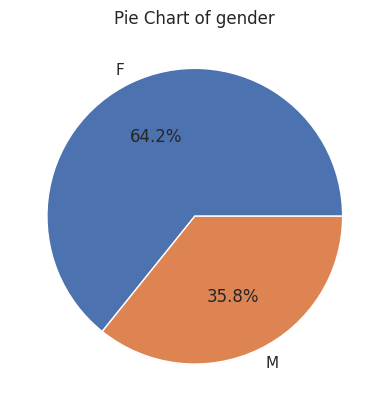

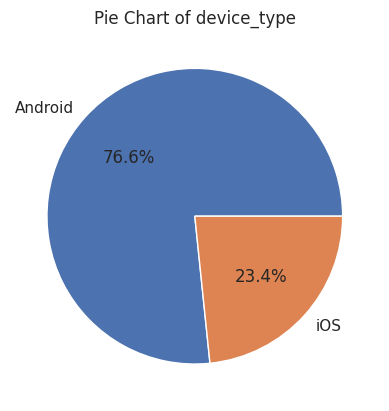

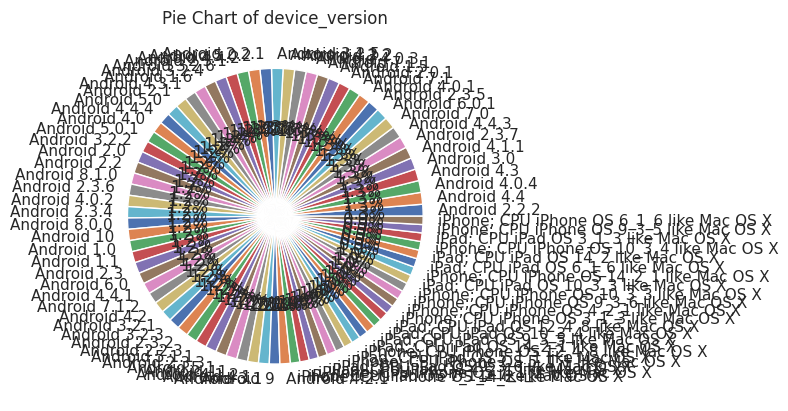

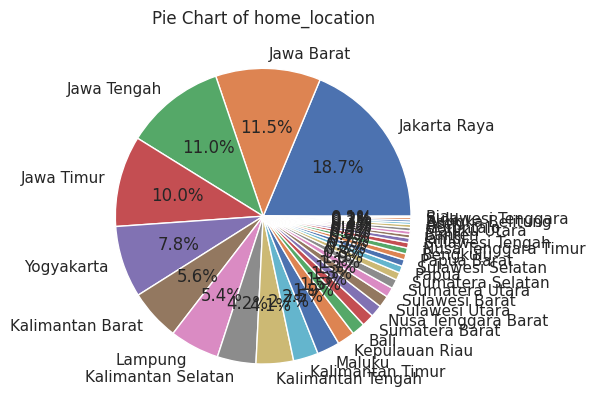

In [39]:
# 카테고리형 칼럼 선택
categorical_columns = ['gender', 'device_type', 'device_version', 'home_location']

# 시각화 설정
plt.figure(figsize=(12, 8))

# 각 카테고리형 칼럼에 대한 파이 그래프 그리기
for col in categorical_columns:
    plt.figure()
    df_customer[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')

# 그래프 표시
plt.show()

In [10]:
# customer_id를 기준으로 데이터 합치기
df_ct_merged = pd.merge(df_customer, df_transaction_new, on='customer_id', how='inner')

In [27]:
df_ct_merged

customer_id first_name    last_name  \
0               7279    Bakiman  Simanjuntak   
1               7279    Bakiman  Simanjuntak   
2               7279    Bakiman  Simanjuntak   
3               7279    Bakiman  Simanjuntak   
4               7279    Bakiman  Simanjuntak   
...              ...        ...          ...   
1254580        40573       Yani        Usada   
1254581        40573       Yani        Usada   
1254582        40573       Yani        Usada   
1254583        40573       Yani        Usada   
1254584        40573       Yani        Usada   

                                     username  \
0        3250e5a3-1d23-4675-a647-3281879d42be   
1        3250e5a3-1d23-4675-a647-3281879d42be   
2        3250e5a3-1d23-4675-a647-3281879d42be   
3        3250e5a3-1d23-4675-a647-3281879d42be   
4        3250e5a3-1d23-4675-a647-3281879d42be   
...                                       ...   
1254580  f5a2ab29-481d-49e6-960e-cb864ee1ed5a   
1254581  f5a2ab29-481d-49e6-960e-cb864ee1ed5a   
1254582  f5a2ab29-481d-49e6-960e-cb864ee1ed5a   
1254583  f5a2ab29-481d-49e6-960e-cb864ee1ed5a   
1254584  f5a2ab29-481d-49e6-960e-cb864ee1ed5a   

                                                     email gender  birthdate  \
0        3250e5a3_1d23_4675_a647_3281879d42be@startupca...      M 1989-01-23   
1        3250e5a3_1d23_4675_a647_3281879d42be@startupca...      M 1989-01-23   
2        3250e5a3_1d23_4675_a647_3281879d42be@startupca...      M 1989-01-23   
3        3250e5a3_1d23_4675_a647_3281879d42be@startupca...      M 1989-01-23   
4        3250e5a3_1d23_4675_a647_3281879d42be@startupca...      M 1989-01-23   
...                                                    ...    ...        ...   
1254580  f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...      F 1987-09-10   
1254581  f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...      F 1987-09-10   
1254582  f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...      F 1987-09-10   
1254583  f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...      F 1987-09-10   
1254584  f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...      F 1987-09-10   

        device_type                             device_id  \
0               iOS  d13dde0a-6ae1-43c3-83a7-11bbb922730b   
1               iOS  d13dde0a-6ae1-43c3-83a7-11bbb922730b   
2               iOS  d13dde0a-6ae1-43c3-83a7-11bbb922730b   
3               iOS  d13dde0a-6ae1-43c3-83a7-11bbb922730b   
4               iOS  d13dde0a-6ae1-43c3-83a7-11bbb922730b   
...             ...                                   ...   
1254580     Android  b6bc29e0-5a22-47af-b31e-0972aafd4cab   
1254581     Android  b6bc29e0-5a22-47af-b31e-0972aafd4cab   
1254582     Android  b6bc29e0-5a22-47af-b31e-0972aafd4cab   
1254583     Android  b6bc29e0-5a22-47af-b31e-0972aafd4cab   
1254584     Android  b6bc29e0-5a22-47af-b31e-0972aafd4cab   

                                device_version  ...  promo_amount  \
0        iPad; CPU iPad OS 4_2_1 like Mac OS X  ...          2853   
1        iPad; CPU iPad OS 4_2_1 like Mac OS X  ...          2853   
2        iPad; CPU iPad OS 4_2_1 like Mac OS X  ...             0   
3        iPad; CPU iPad OS 4_2_1 like Mac OS X  ...             0   
4        iPad; CPU iPad OS 4_2_1 like Mac OS X  ...             0   
...                                        ...  ...           ...   
1254580                          Android 3.2.6  ...             0   
1254581                          Android 3.2.6  ...          4532   
1254582                          Android 3.2.6  ...             0   
1254583                          Android 3.2.6  ...             0   
1254584                          Android 3.2.6  ...             0   

          promo_code shipment_fee          shipment_date_limit  \
0        WEEKENDSERU        15000  2020-08-26T05:14:04.908999Z   
1        WEEKENDSERU        15000  2020-08-26T05:14:04.908999Z   
2                NaN        10000  2020-09-04T05:49:01.977704Z   
3                NaN            0  2020-09-14T11:26:20.1

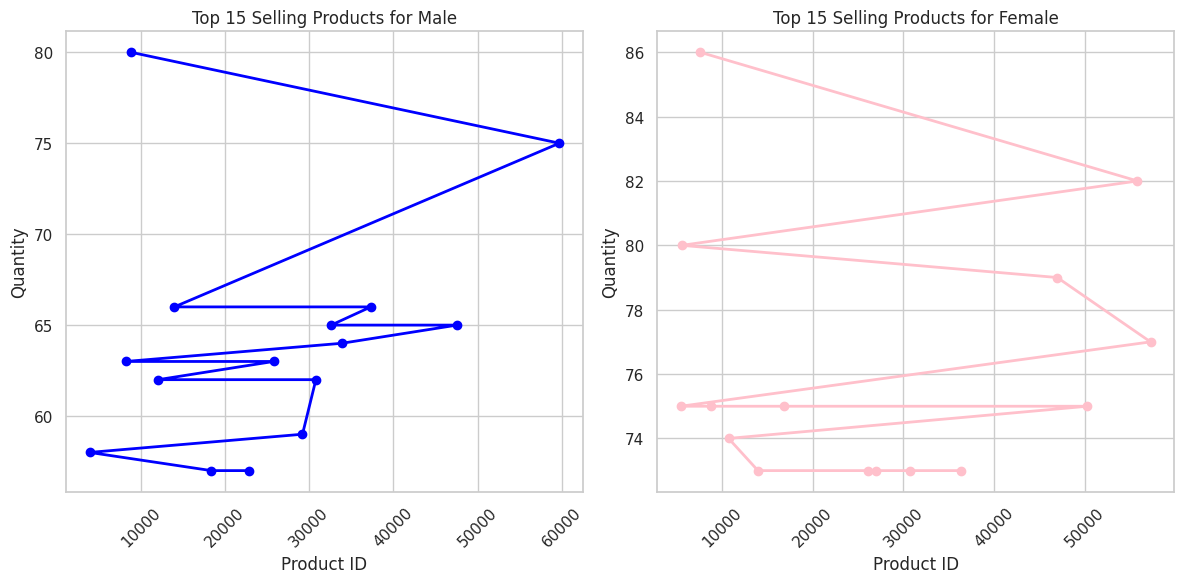

In [45]:
import matplotlib
import matplotlib.pyplot as plt


# 성별로 가장 많이 판매된 제품 순으로 데이터 가공
top_products_by_gender = df_ct_merged.groupby(['gender', 'product_id'])['quantity'].sum().reset_index()
top_products_by_gender = top_products_by_gender.sort_values(by=['gender', 'quantity'], ascending=[True, False])

# 남자용 제품 데이터 추출
top_products_male = top_products_by_gender[top_products_by_gender['gender'] == 'M'][:15]

# 여자용 제품 데이터 추출
top_products_female = top_products_by_gender[top_products_by_gender['gender'] == 'F'][:15]

# 시각화 설정
plt.figure(figsize=(12, 6))


# 남자용 제품 그래프 그리기
plt.subplot(1, 2, 1)
plt.plot(top_products_male['product_id'], top_products_male['quantity'], marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Top 15 Selling Products for Male')
plt.xlabel('Product ID')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()

# 여자용 제품 그래프 그리기
plt.subplot(1, 2, 2)
plt.plot(top_products_female['product_id'], top_products_female['quantity'], marker='o', color='pink', linestyle='-', linewidth=2)
plt.title('Top 15 Selling Products for Female')
plt.xlabel('Product ID')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()


In [46]:
top_products_male

gender  product_id  quantity
50576      M        8828        80
88681      M       59715        75
54965      M       13992        66
72777      M       37320        66
69453      M       32618        65
80069      M       47562        65
70342      M       33878        64
50089      M        8237        63
64362      M       25774        63
53314      M       12079        62
68166      M       30801        62
67160      M       29211        59
46262      M        3933        58
58553      M       18385        57
62172      M       22849        57

In [47]:
top_products_female

gender  product_id  quantity
5061       F        7532        86
41173      F       55855        82
3257       F        5499        80
35121      F       46991        79
42400      F       57293        77
3145       F        5386        75
6047       F        8729        75
12775      F       16804        75
37380      F       50321        75
7692       F       10673        74
10455      F       13923        73
20165      F       26088        73
20786      F       26910        73
23683      F       30764        73
27681      F       36357        73

In [48]:
# 각 home_location 별로 제품의 판매 수량 집계
popular_products_by_location = df_ct_merged.groupby(['home_location', 'product_id'])['quantity'].sum().reset_index()
popular_products_by_location = popular_products_by_location.sort_values(by=['home_location', 'quantity'], ascending=[True, False])

# 각 home_location 별로 가장 판매 수량이 높은 제품 선택
most_popular_products_by_location = popular_products_by_location.groupby('home_location').first().reset_index()

# 결과 출력
print(most_popular_products_by_location)

          home_location  product_id  quantity
0                  Aceh       39666        24
1                  Bali       33107        40
2       Bangka Belitung       47146        23
3                Banten       12079        40
4              Bengkulu       28414        26
5             Gorontalo       58906        27
6          Jakarta Raya       12876        48
7                 Jambi       28592        23
8            Jawa Barat       23762        45
9           Jawa Tengah       30182        52
10           Jawa Timur       32529        42
11     Kalimantan Barat        8221        40
12   Kalimantan Selatan       57939        43
13    Kalimantan Tengah       19069        34
14     Kalimantan Timur       18261        33
15       Kepulauan Riau       14411        35
16              Lampung       40130        41
17               Maluku       40127        37
18         Maluku Utara       38675        34
19  Nusa Tenggara Barat       30764        45
20  Nusa Tenggara Timur       1319

In [49]:
# 각 home_location 별로 제품의 총 금액 집계
popular_products_by_location = df_ct_merged.groupby(['home_location', 'product_id'])['item_price'].sum().reset_index()
popular_products_by_location = popular_products_by_location.sort_values(by=['home_location', 'item_price'], ascending=[True, False])

# 각 home_location 별로 가장 판매 금액이 높은 제품 선택
most_popular_products_by_location = popular_products_by_location.groupby('home_location').first().reset_index()

# 결과 출력
print(most_popular_products_by_location)

          home_location  product_id  item_price
0                  Aceh       39496     1381257
1                  Bali       19905     1687548
2       Bangka Belitung        2753      983953
3                Banten       20456     1012545
4              Bengkulu        8623     1369225
5             Gorontalo       26555     1290445
6          Jakarta Raya        4688     5234375
7                 Jambi       49640      987484
8            Jawa Barat       25305     3622810
9           Jawa Tengah       23462     3885323
10           Jawa Timur       42027     3251253
11     Kalimantan Barat       13423     2807553
12   Kalimantan Selatan       42888     2190958
13    Kalimantan Tengah       28748     2408788
14     Kalimantan Timur       38978     2173958
15       Kepulauan Riau       23818     1803817
16              Lampung       11070     2342330
17               Maluku       40767     2036322
18         Maluku Utara       13839     1058894
19  Nusa Tenggara Barat       41795     

* 7월에 이벤트 떄문에 가입이 많은지 확인

7월 : 이슬람 설날

8월 : 독립기념일

9월 : 추석

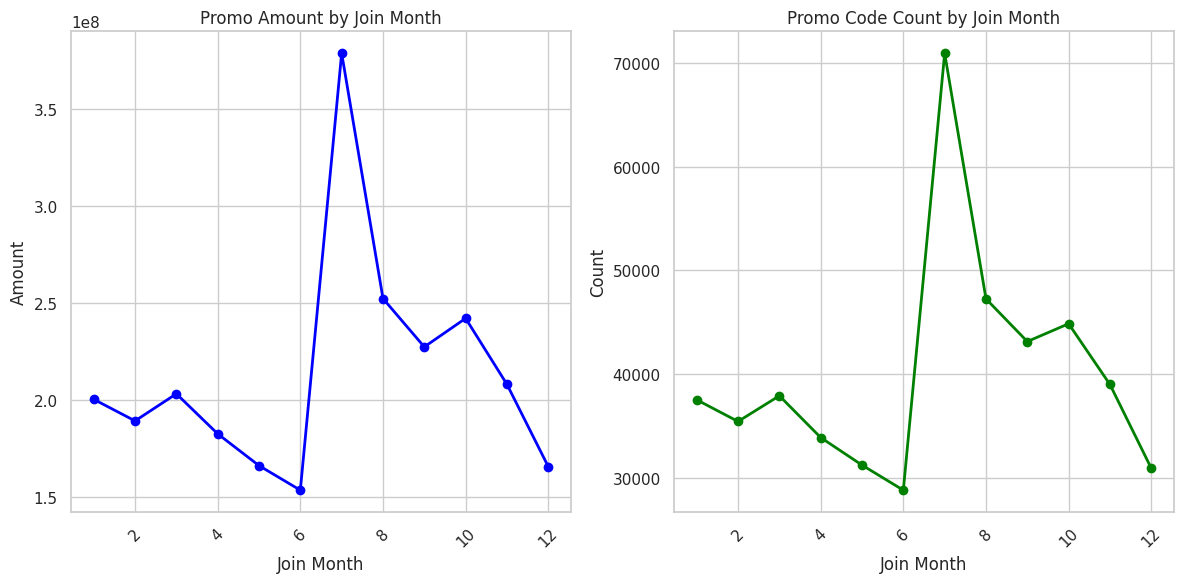

In [59]:
# promo_amount(할인금액)의 금액 합과 promo_code(할인 코드)가 NaN이 아닌 경우를 카운트하여 그룹화
grouped_data = df_ct_merged.groupby('join_month').agg({'promo_amount': 'sum', 'promo_code': lambda x: x.notna().sum()}).reset_index()

# 시각화 설정
plt.figure(figsize=(12, 6))

# Promo Amount 그래프 그리기
plt.subplot(1, 2, 1)
plt.plot(grouped_data['join_month'], grouped_data['promo_amount'], marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Promo Amount by Join Month')
plt.xlabel('Join Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()

# Promo Code Count 그래프 그리기
plt.subplot(1, 2, 2)
plt.plot(grouped_data['join_month'], grouped_data['promo_code'], marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Promo Code Count by Join Month')
plt.xlabel('Join Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()

* 코로나 19년도 시작

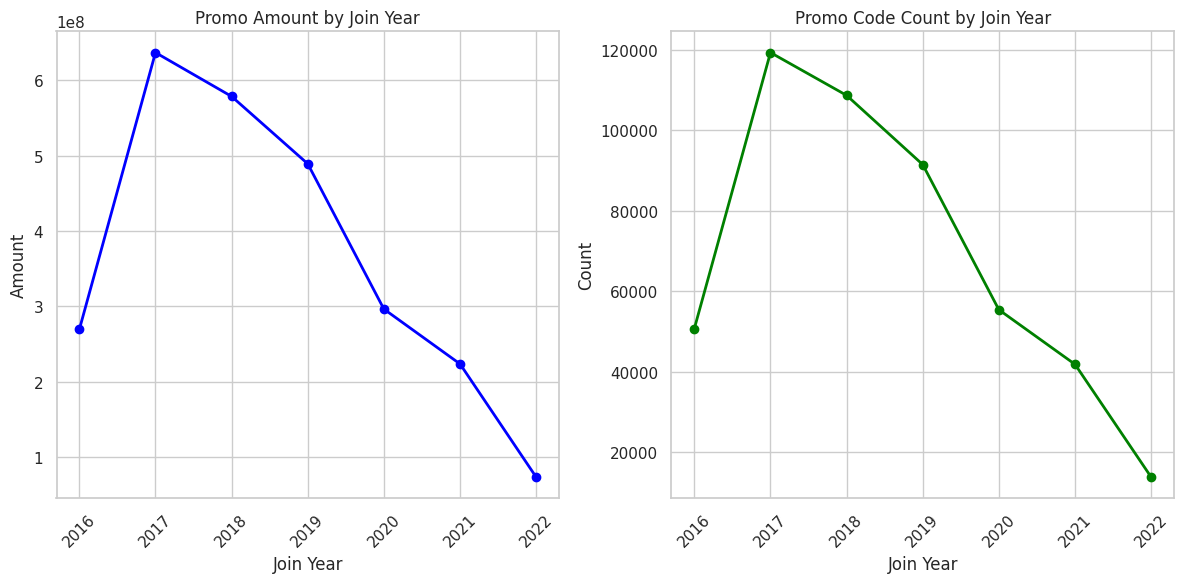

In [61]:
# promo_amount(할인금액)의 금액 합과 promo_code(할인 코드)가 NaN이 아닌 경우를 카운트하여 그룹화
grouped_data = df_ct_merged.groupby('join_year').agg({'promo_amount': 'sum', 'promo_code': lambda x: x.notna().sum()}).reset_index()

# 시각화 설정
plt.figure(figsize=(12, 6))

# Promo Amount 그래프 그리기
plt.subplot(1, 2, 1)
plt.plot(grouped_data['join_year'], grouped_data['promo_amount'], marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Promo Amount by Join Year')
plt.xlabel('Join Year')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()

# Promo Code Count 그래프 그리기
plt.subplot(1, 2, 2)
plt.plot(grouped_data['join_year'], grouped_data['promo_code'], marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Promo Code Count by Join Year')
plt.xlabel('Join Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()

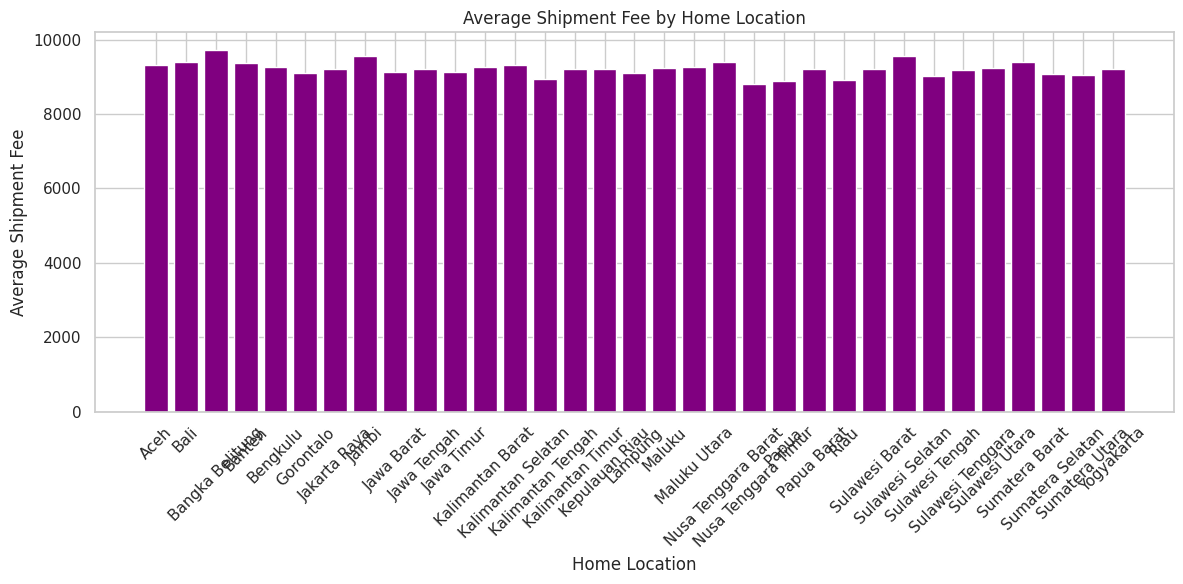

In [60]:
# home_location 별로 shipment_fee 배송비용 평균 계산
avg_shipment_fee_by_location = df_ct_merged.groupby('home_location')['shipment_fee'].mean().reset_index()

# 시각화 설정
plt.figure(figsize=(12, 6))
plt.bar(avg_shipment_fee_by_location['home_location'], avg_shipment_fee_by_location['shipment_fee'], color='purple')
plt.title('Average Shipment Fee by Home Location')
plt.xlabel('Home Location')
plt.ylabel('Average Shipment Fee')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()

* 연령대별로 거래금액의 합

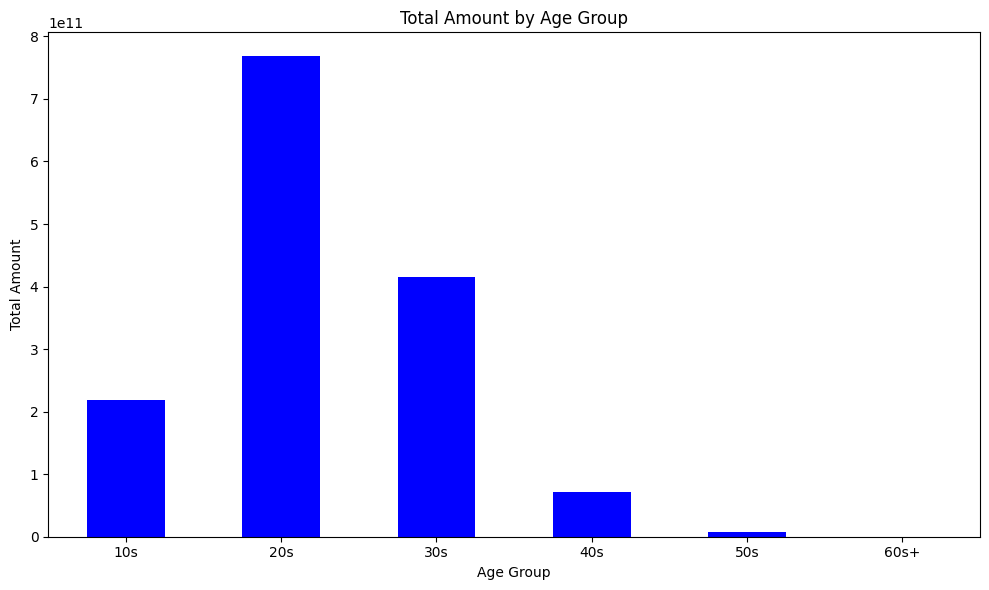

In [15]:
# 연령대를 계산하는 함수
def calculate_age_group(age):
    if age < 20:
        return '10s'
    elif age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    else:
        return '60s+'

# 연령대 칼럼 추가
df_ct_merged['age_group'] = df_ct_merged['age'].apply(calculate_age_group)

# 연령대별 total_amount 합 계산
age_group_totals = df_ct_merged.groupby('age_group')['total_amount'].sum()

# 시각화
plt.figure(figsize=(10, 6))
age_group_totals.plot(kind='bar', color='blue')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.title('Total Amount by Age Group')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

* 연령대별로 가장 많이 팔린 제품 10가지

<Figure size 1500x1000 with 0 Axes>

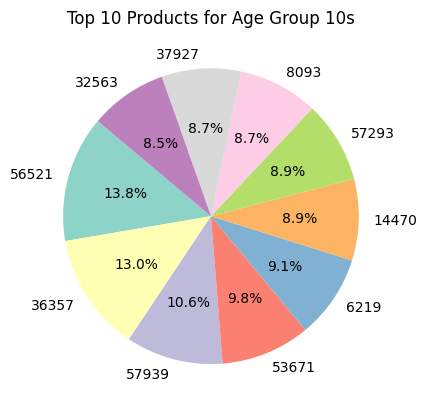

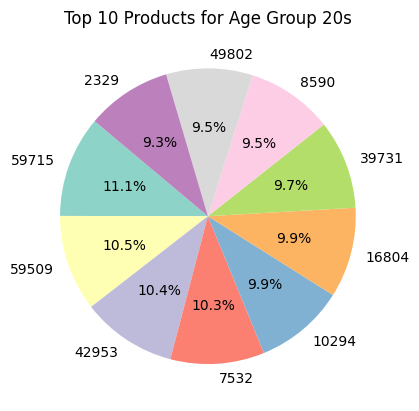

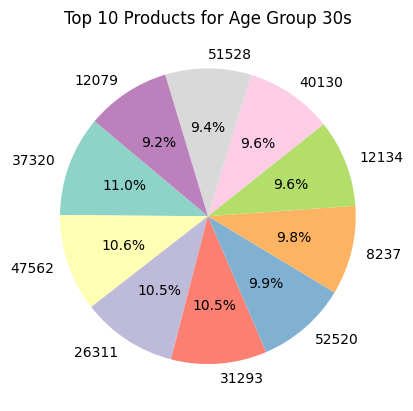

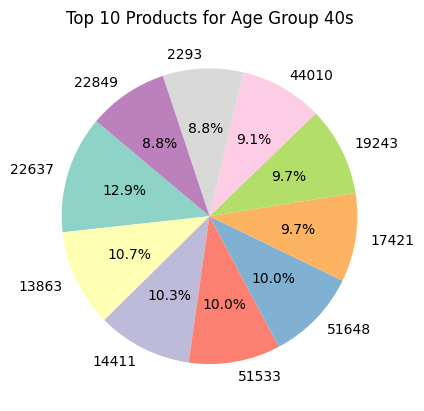

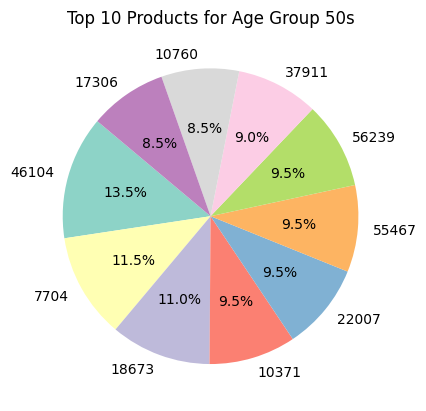

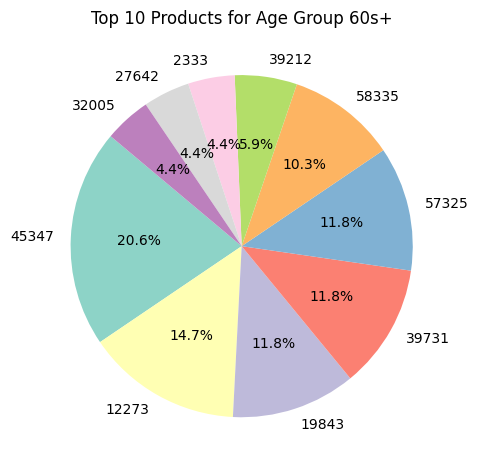

In [17]:
import seaborn as sns

# 연령대를 계산하는 함수
def calculate_age_group(age):
    if age < 20:
        return '10s'
    elif age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    else:
        return '60s+'

# 연령대 칼럼 추가
df_ct_merged['age_group'] = df_ct_merged['age'].apply(calculate_age_group)

# 연령대별 가장 많이 팔린 제품 10가지 구하기
top_products_by_age = df_ct_merged.groupby(['age_group', 'product_id'])['quantity'].sum().reset_index()
top_products_by_age = top_products_by_age.sort_values(['age_group', 'quantity'], ascending=[True, False])
top_products_by_age = top_products_by_age.groupby('age_group').head(10)

# 파이 그래프 시각화
plt.figure(figsize=(15, 10))
sns.set_palette("Set3", n_colors=10)

for age_group in top_products_by_age['age_group'].unique():
    data = top_products_by_age[top_products_by_age['age_group'] == age_group]
    plt.figure()
    plt.pie(data['quantity'], labels=data['product_id'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 10 Products for Age Group {age_group}')

plt.tight_layout()
plt.show()

# 문제점 진단

신규 고객 수는 코로나 이후 줄었지만 매출액 자체에는 문제가 없지만 최근 두달간 주문량이 급락 원인을 찾아보자

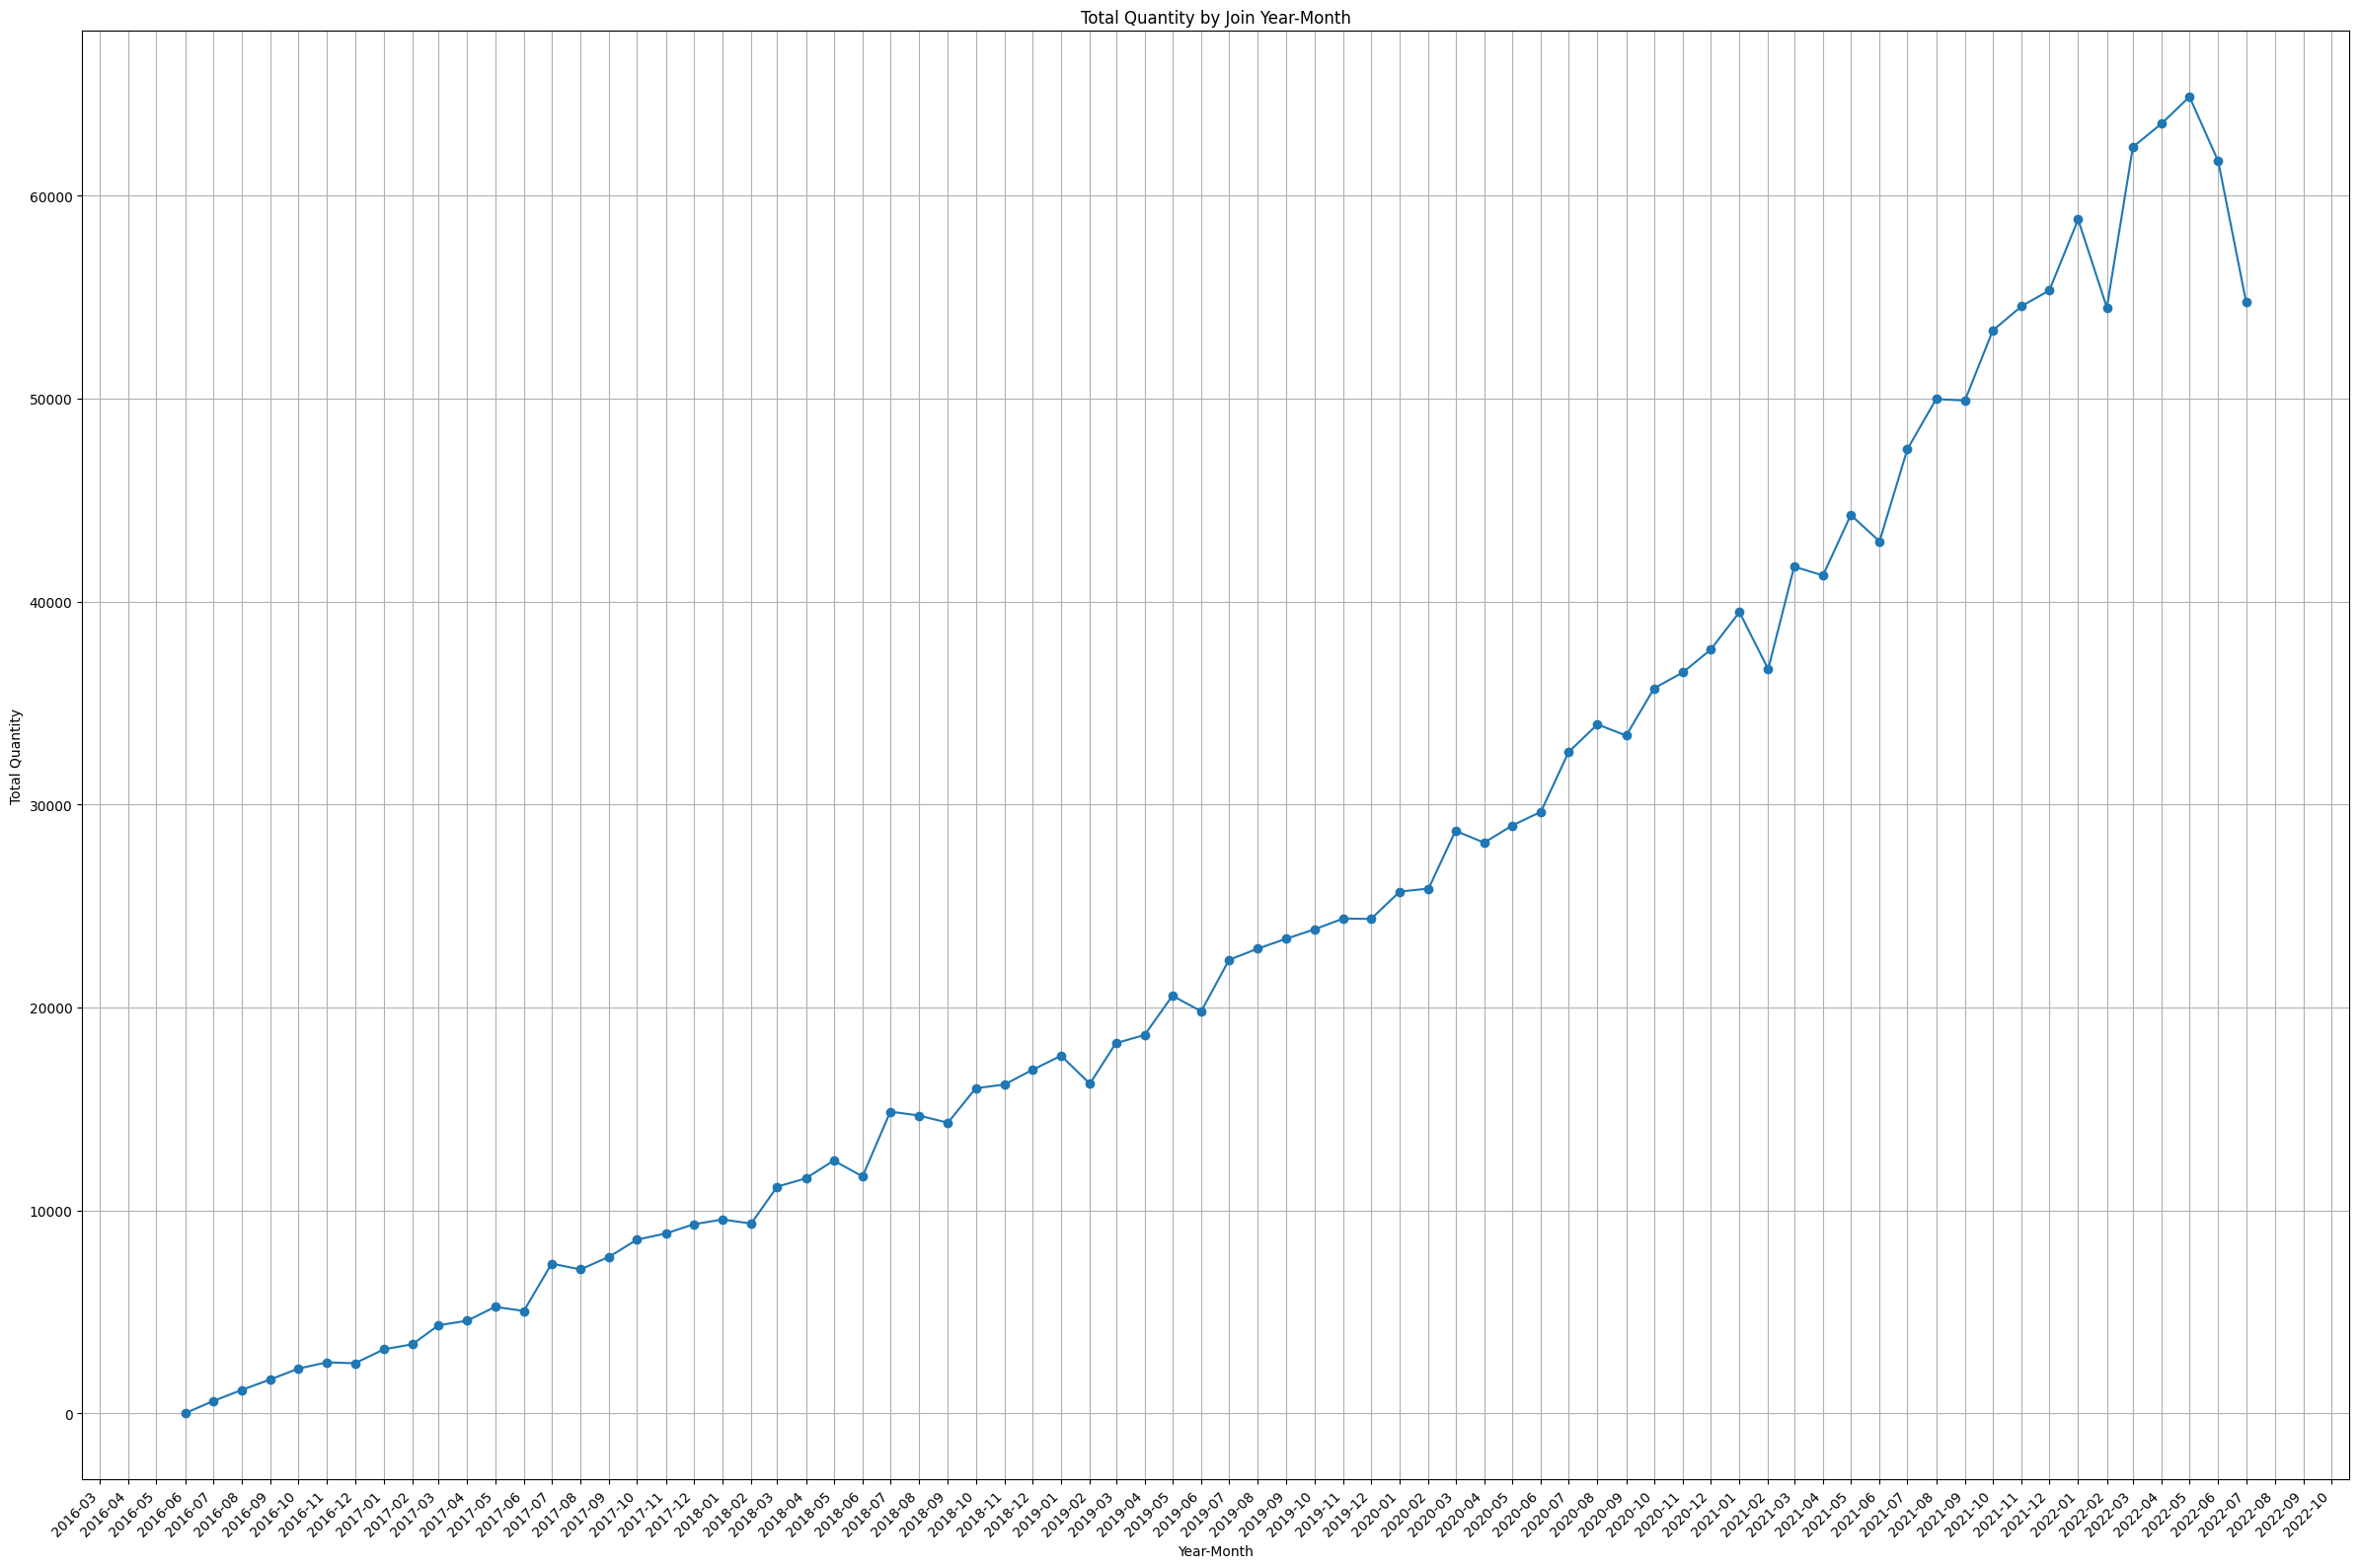

In [30]:
# 'order_date' 칼럼을 기준으로 그룹화하고 'quantity'를 합산합니다.
grouped_data = df_ct_merged.groupby('order_date')['quantity'].sum()

# 그룹화된 데이터를 시각화합니다.
plt.figure(figsize=(24, 16))
plt.plot(grouped_data.index, grouped_data.values, marker='o')

# 연도와 월을 함께 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.xlabel('Year-Month')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Join Year-Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

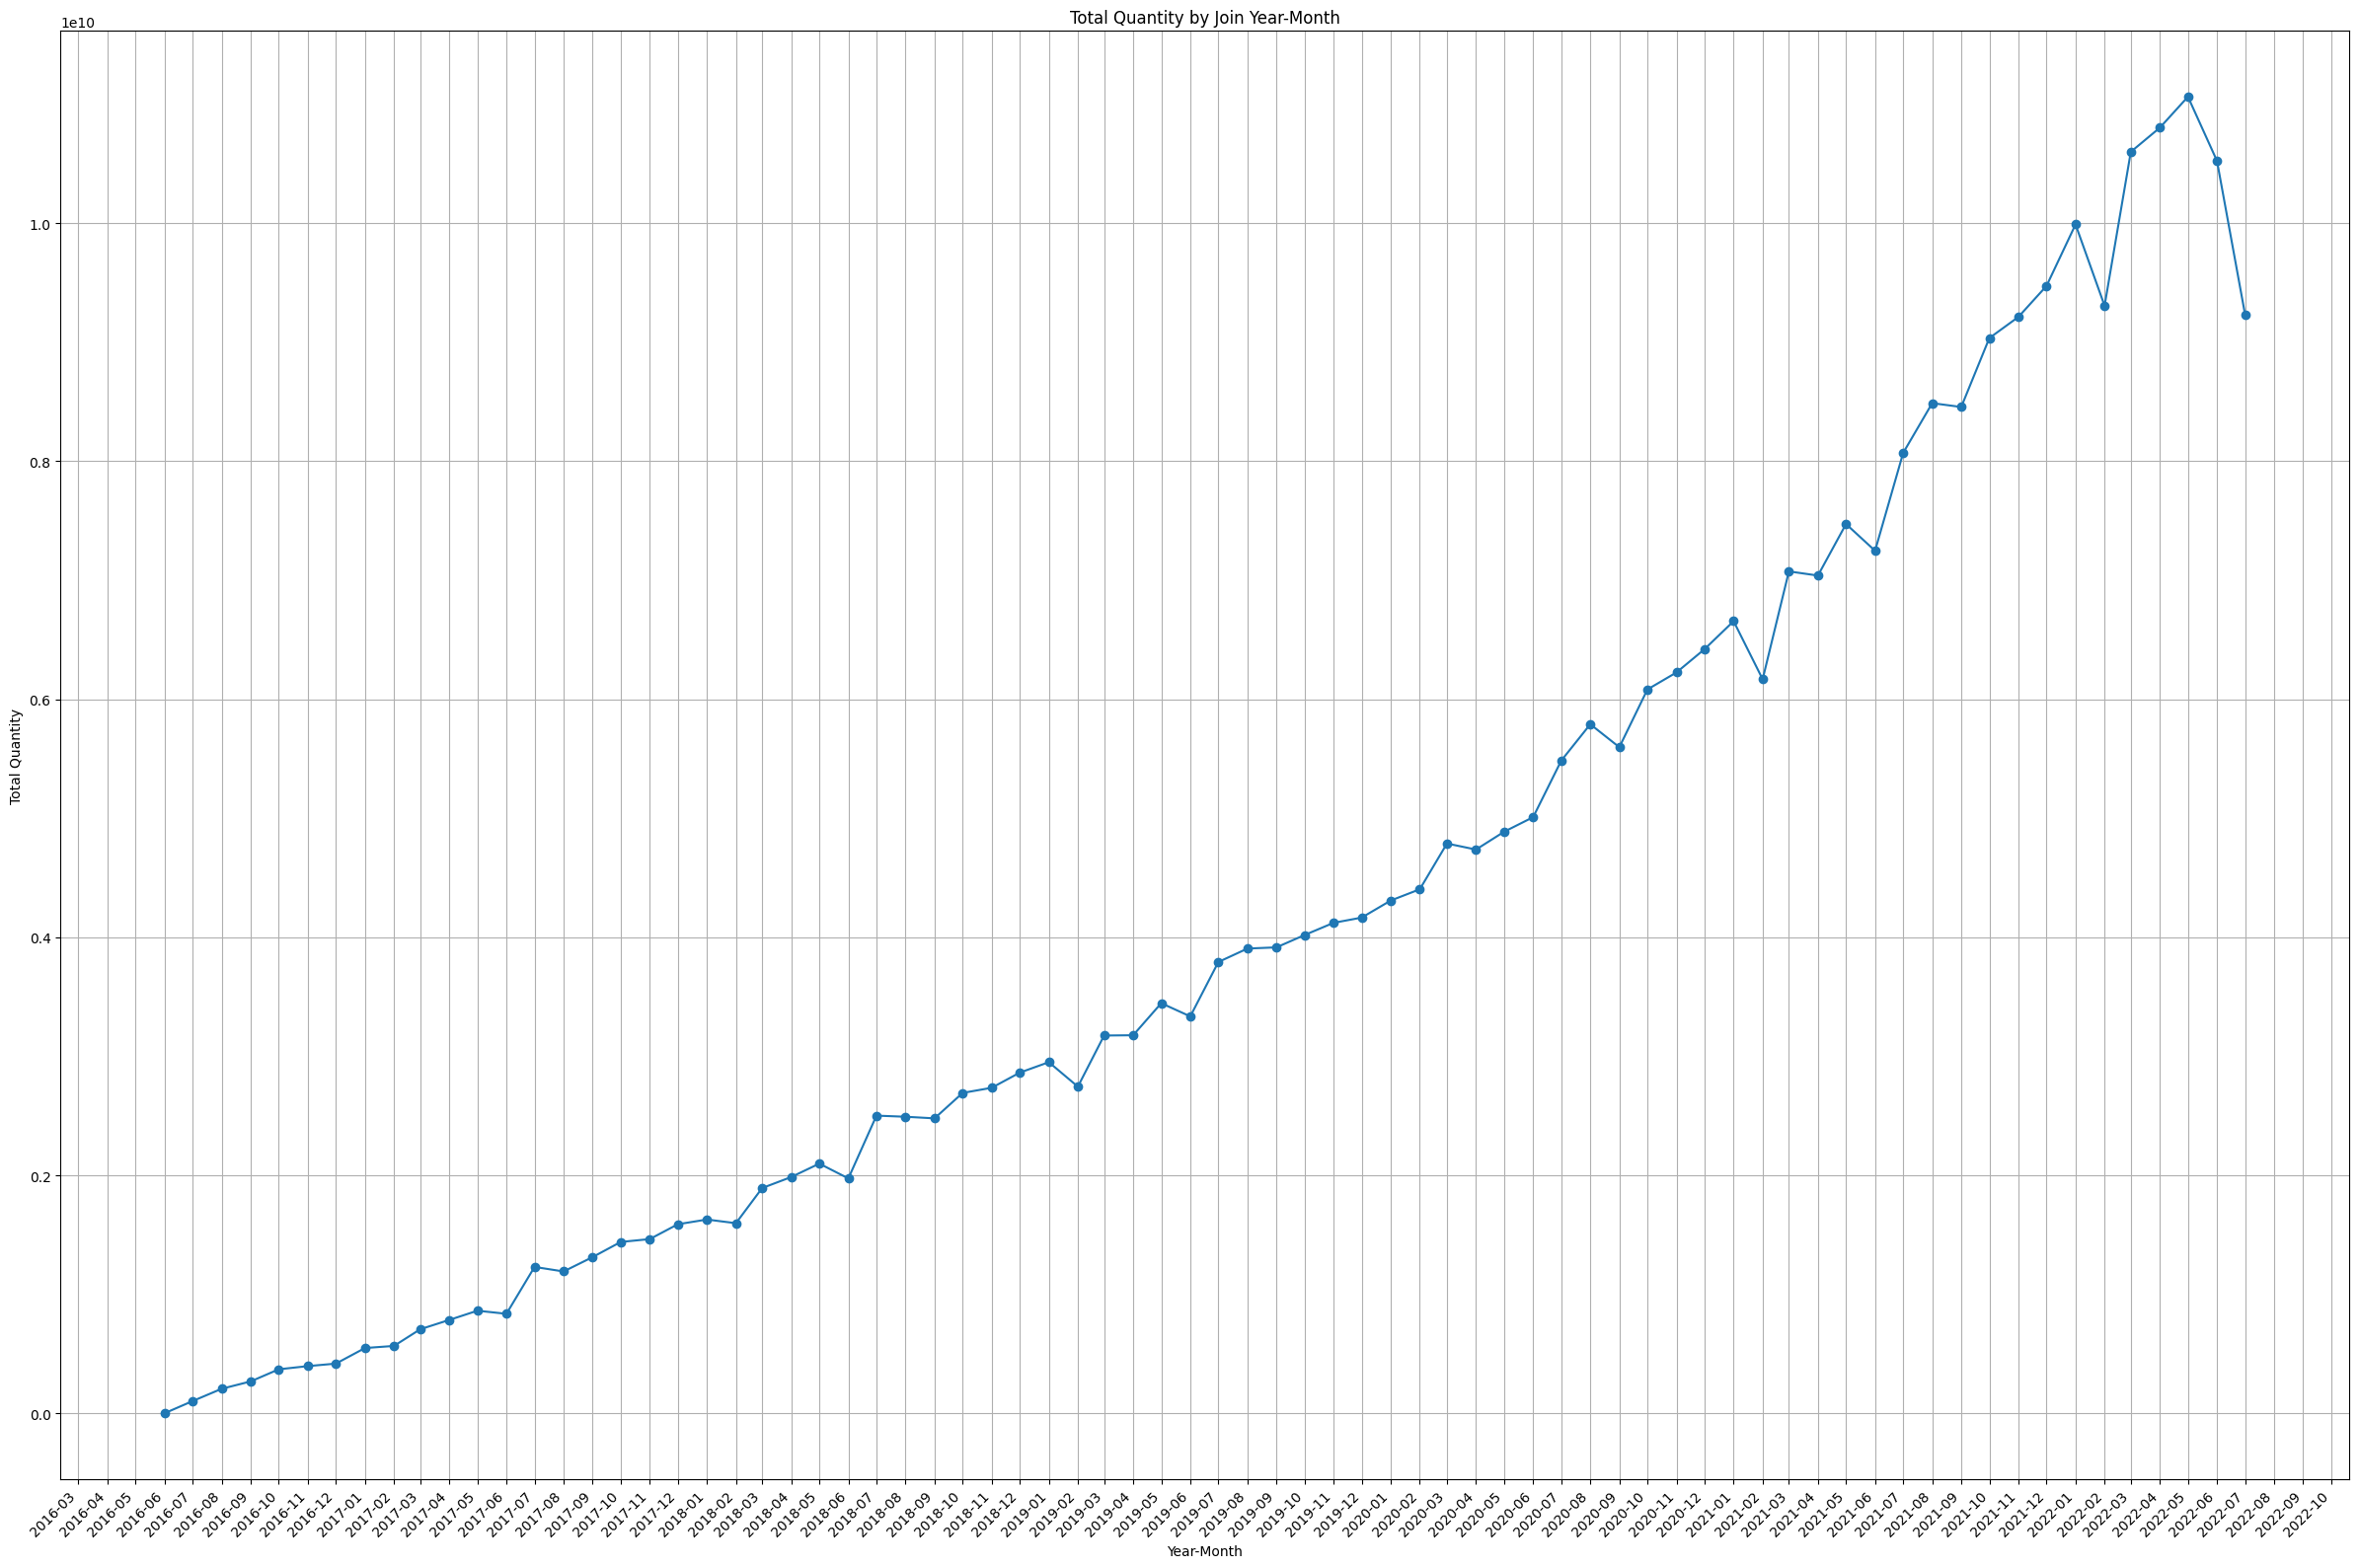

In [12]:
# 'order_date' 칼럼을 기준으로 그룹화하고 'item_price'를 합산합니다.
grouped_data = df_ct_merged.groupby('order_date')['item_price'].sum()

# 그룹화된 데이터를 시각화합니다.
plt.figure(figsize=(24, 16))
plt.plot(grouped_data.index, grouped_data.values, marker='o')

# 연도와 월을 함께 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.xlabel('Year-Month')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Join Year-Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

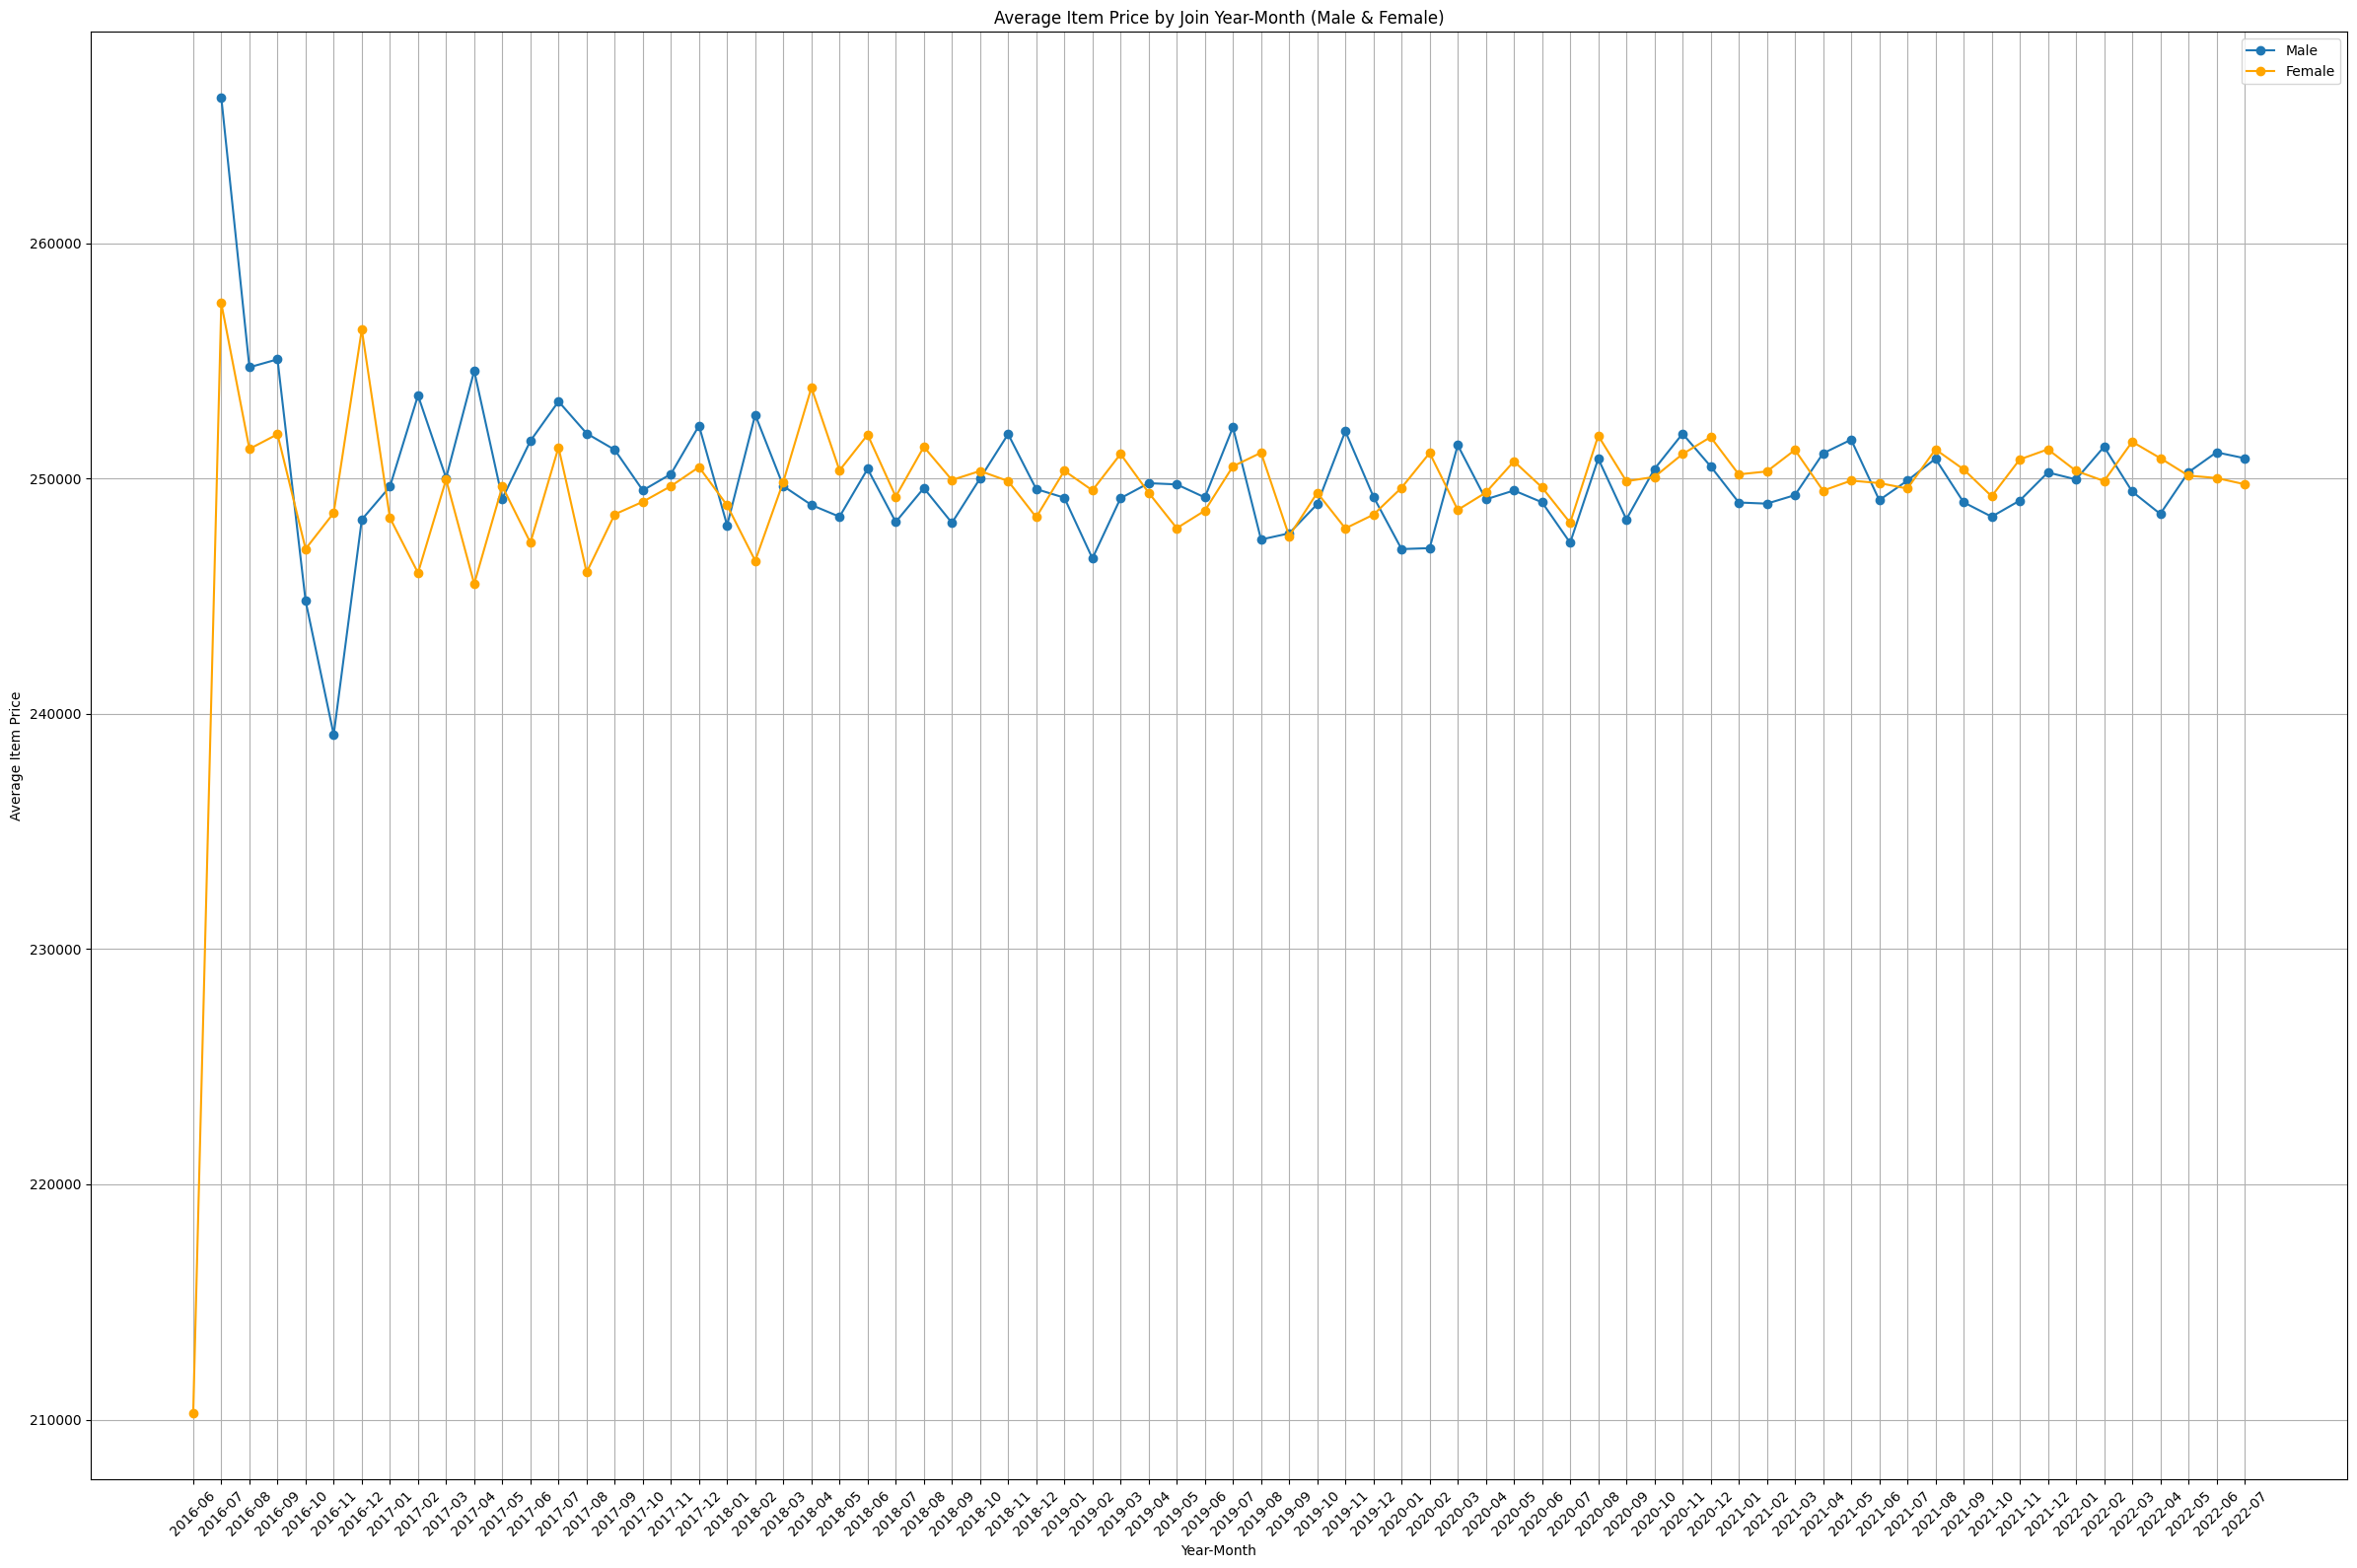

In [63]:
# 'order_date' 칼럼을 기준으로 그룹화하고 'item_price'의 평균을 계산합니다.
grouped_data = df_ct_merged.groupby(['order_date', 'gender'])['item_price'].mean().unstack()

# 그룹화된 데이터를 시각화합니다.
plt.figure(figsize=(24, 16))

# 남성 데이터 시각화
plt.plot(grouped_data.index, grouped_data['M'], marker='o', label='Male')

# 여성 데이터 시각화
plt.plot(grouped_data.index, grouped_data['F'], marker='o', color='orange', label='Female')

# 연도와 월을 함께 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.xlabel('Year-Month')
plt.ylabel('Average Item Price')
plt.title('Average Item Price by Join Year-Month (Male & Female)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

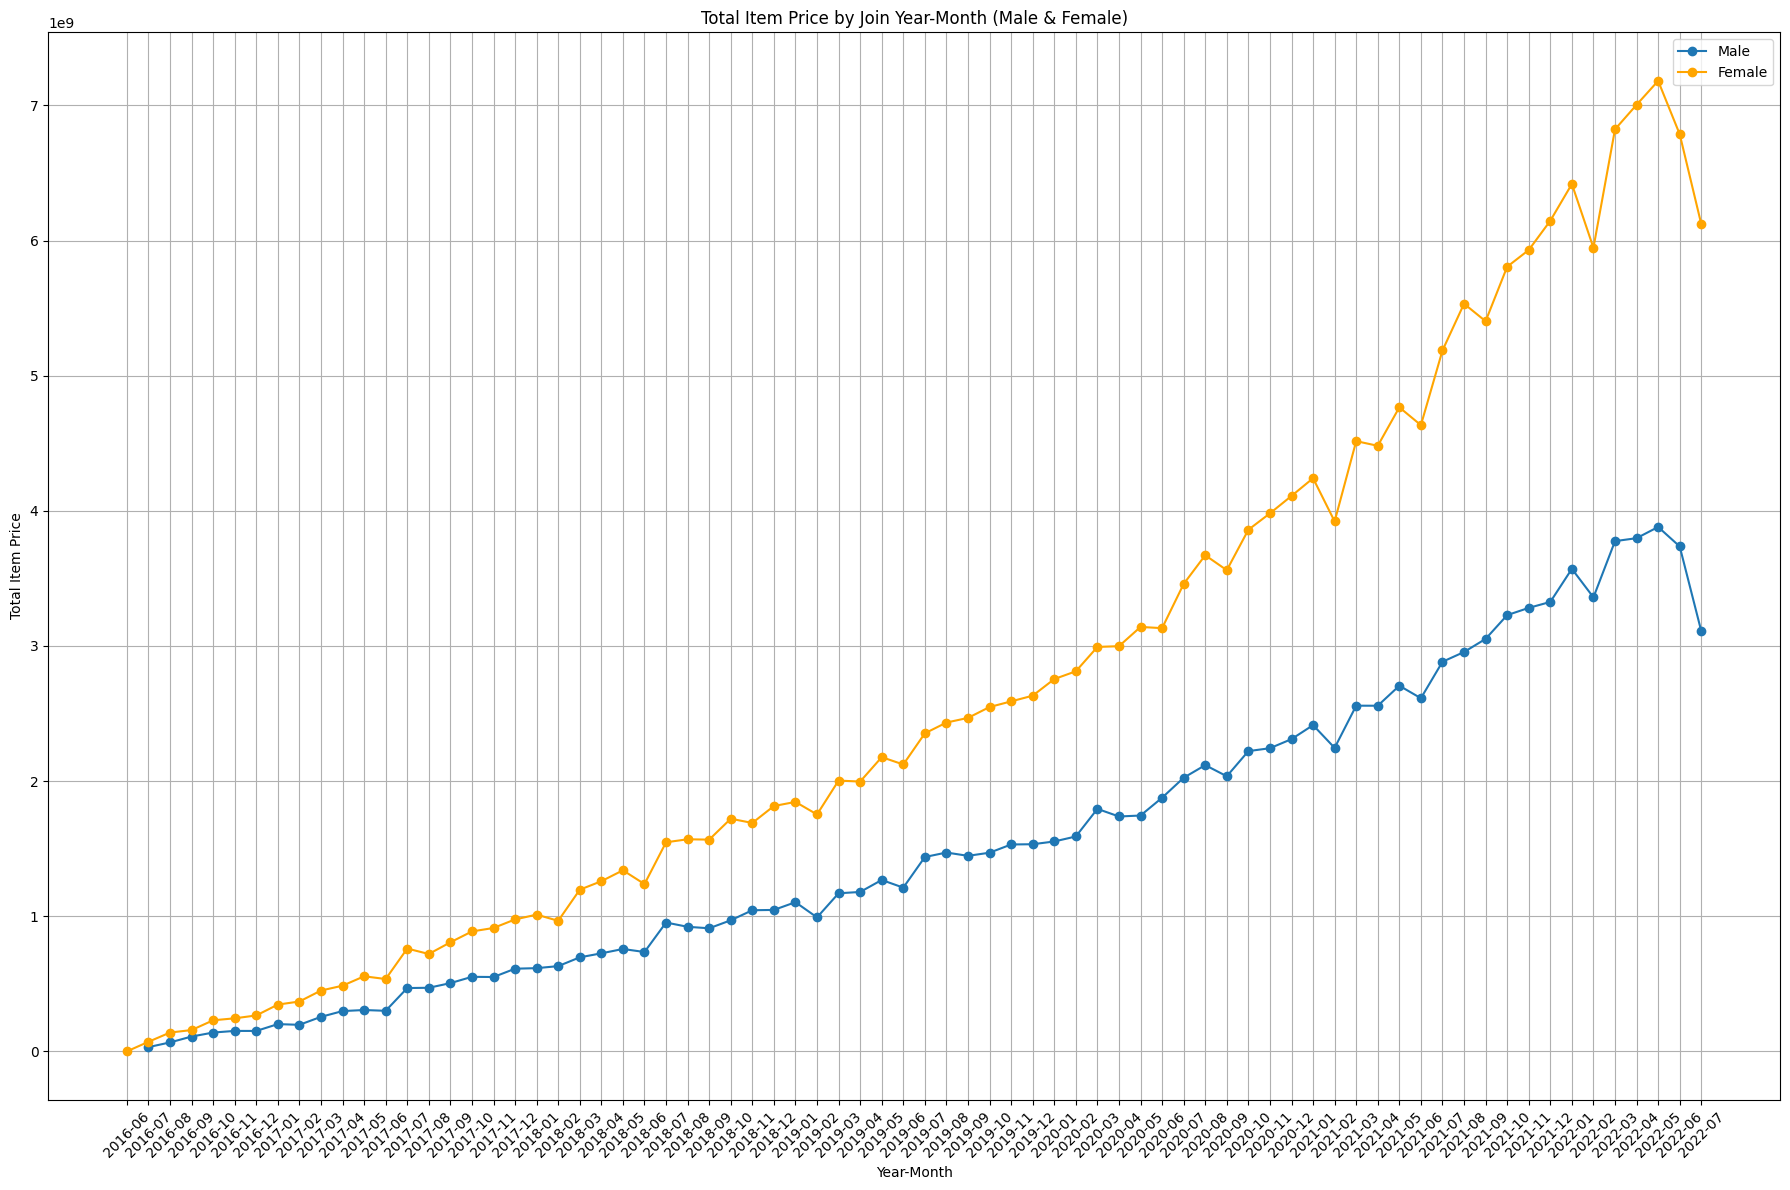

In [62]:
# 'order_date' 칼럼을 기준으로 그룹화하고 'item_price'를 합산합니다.
grouped_data = df_ct_merged.groupby(['order_date', 'gender'])['item_price'].sum().unstack()

# 그룹화된 데이터를 시각화합니다.
plt.figure(figsize=(18, 12))

# 남성 데이터 시각화
plt.plot(grouped_data.index, grouped_data['M'], marker='o', label='Male')

# 여성 데이터 시각화
plt.plot(grouped_data.index, grouped_data['F'], marker='o', color='orange', label='Female')

# 연도와 월을 함께 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.xlabel('Year-Month')
plt.ylabel('Total Item Price')
plt.title('Total Item Price by Join Year-Month (Male & Female)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

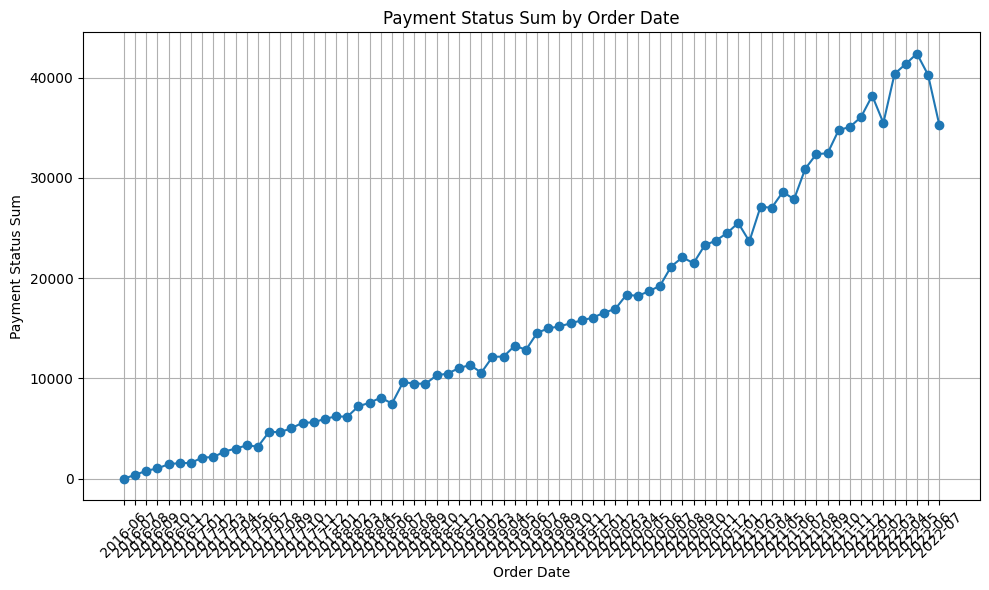

In [54]:
# 데이터 프레임에서 필요한 칼럼만 추출
df_pay = df_transaction_new[['order_date', 'payment_status']]

# payment_status가 'Success'인 경우는 1로, 'Failed'인 경우는 0으로 매핑
df_pay['payment_status'] = df_pay['payment_status'].apply(lambda x: 1 if x == 'Success' else 0)

# 날짜별 payment_status의 합산 계산
df_grouped = df_pay.groupby('order_date')['payment_status'].sum()

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped.values, marker='o')

# 연도와 월을 함께 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.xlabel('Order Date')
plt.ylabel('Payment Status Sum')
plt.title('Payment Status Sum by Order Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

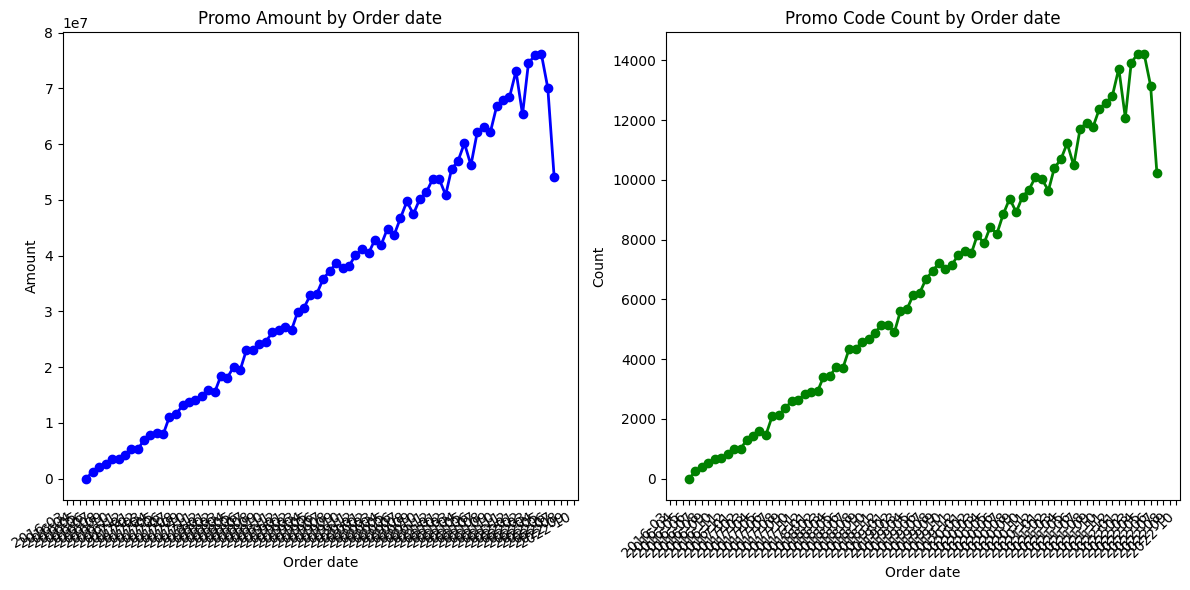

In [13]:
# promo_amount(할인금액)의 금액 합과 promo_code(할인 코드)가 NaN이 아닌 경우를 카운트하여 그룹화
grouped_data = df_ct_merged.groupby('order_date').agg({'promo_amount': 'sum', 'promo_code': lambda x: x.notna().sum()}).reset_index()

# 시각화 설정
plt.figure(figsize=(12, 6))

# Promo Amount 그래프 그리기
plt.subplot(1, 2, 1)
plt.plot(grouped_data['order_date'], grouped_data['promo_amount'], marker='o', color='blue', linestyle='-', linewidth=2)

# 연도와 월을 함께 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.title('Promo Amount by Order date')
plt.xlabel('Order date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()

# Promo Code Count 그래프 그리기
plt.subplot(1, 2, 2)
plt.plot(grouped_data['order_date'], grouped_data['promo_code'], marker='o', color='green', linestyle='-', linewidth=2)

# 연도와 월을 함께 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.title('Promo Code Count by Order date')
plt.xlabel('Order date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()

In [51]:
# 지역별로 그룹화하여 'item_price'의 합계 계산
df_grouped = df_ct_merged.groupby(['home_location', 'order_date'])['item_price'].sum().reset_index()

# 각 지역별로 그래프를 따로 그립니다.
unique_locations = df_grouped['home_location'].unique()
for location in unique_locations:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_grouped[df_grouped['home_location'] == location], x='order_date', y='item_price')
    # 연도와 월을 함께 표시
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()
    plt.title(f'Total Item Price for Home Location: {location}')
    plt.xlabel('Order Date')
    plt.ylabel('Total Item Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

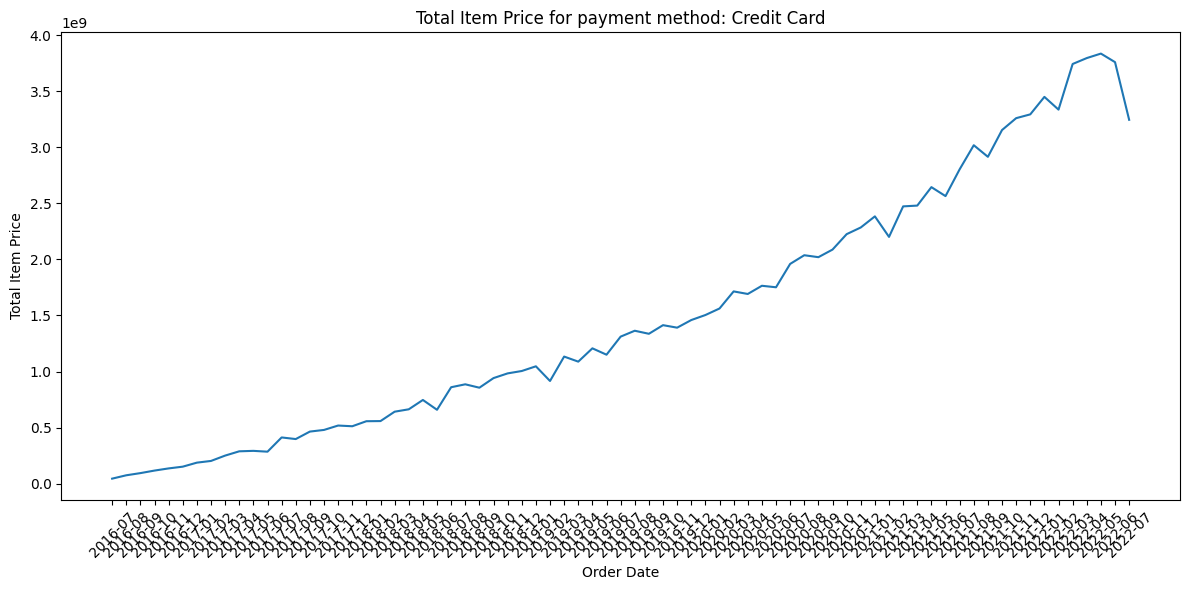

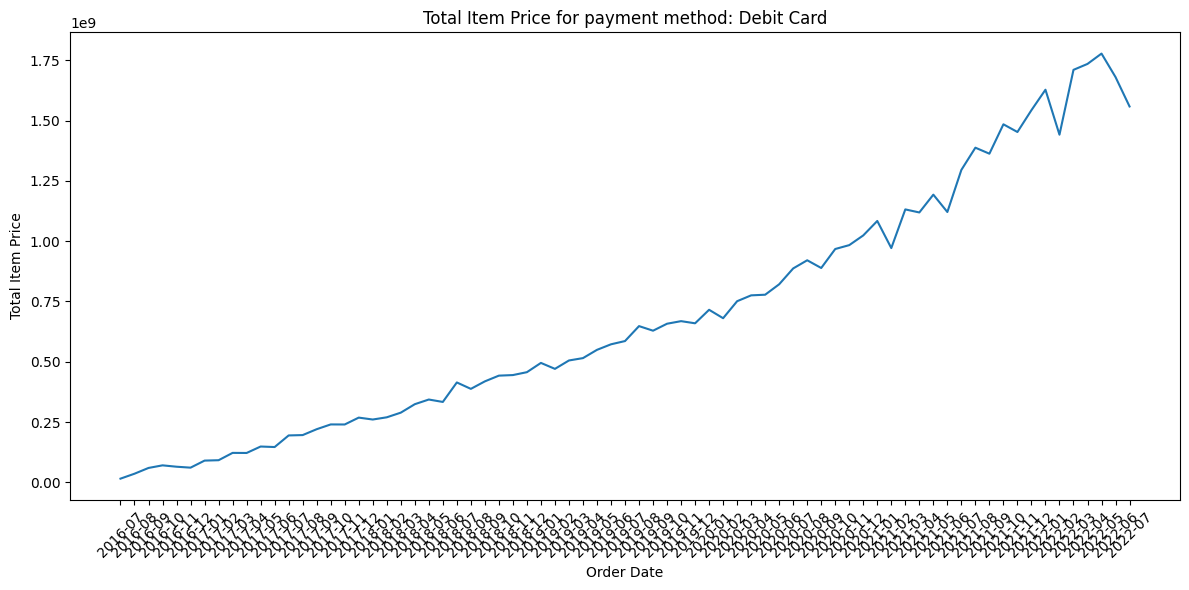

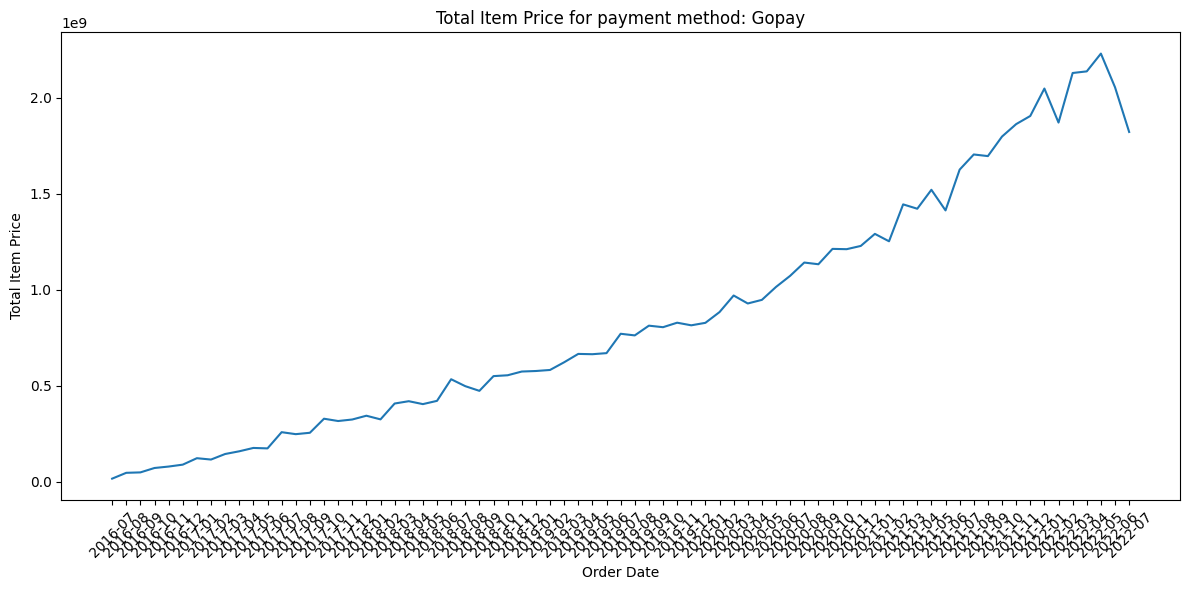

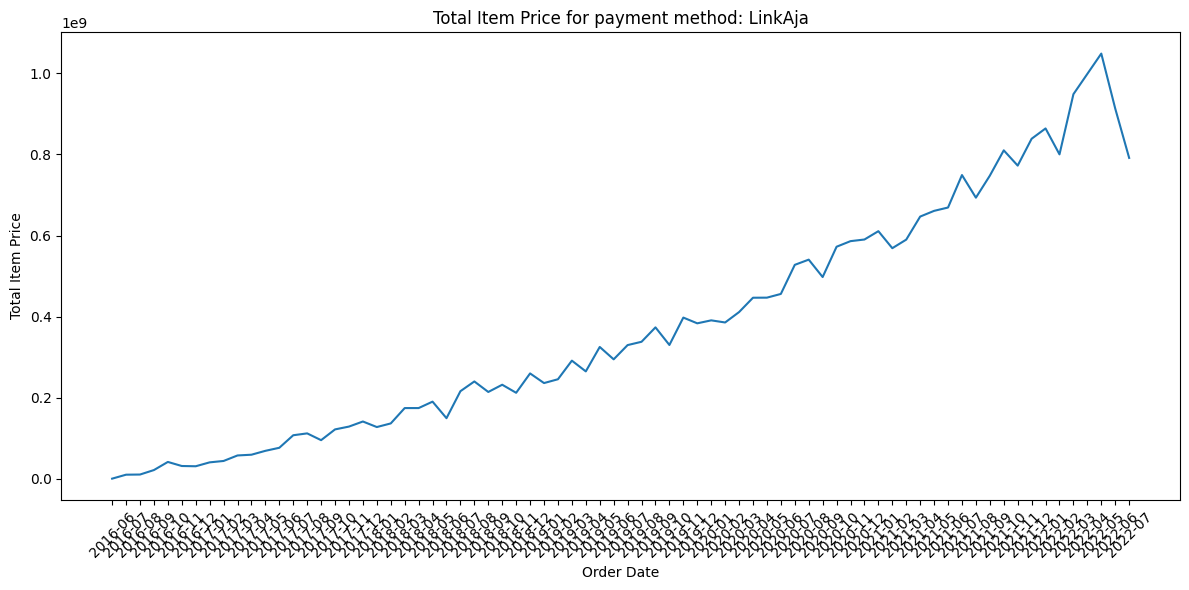

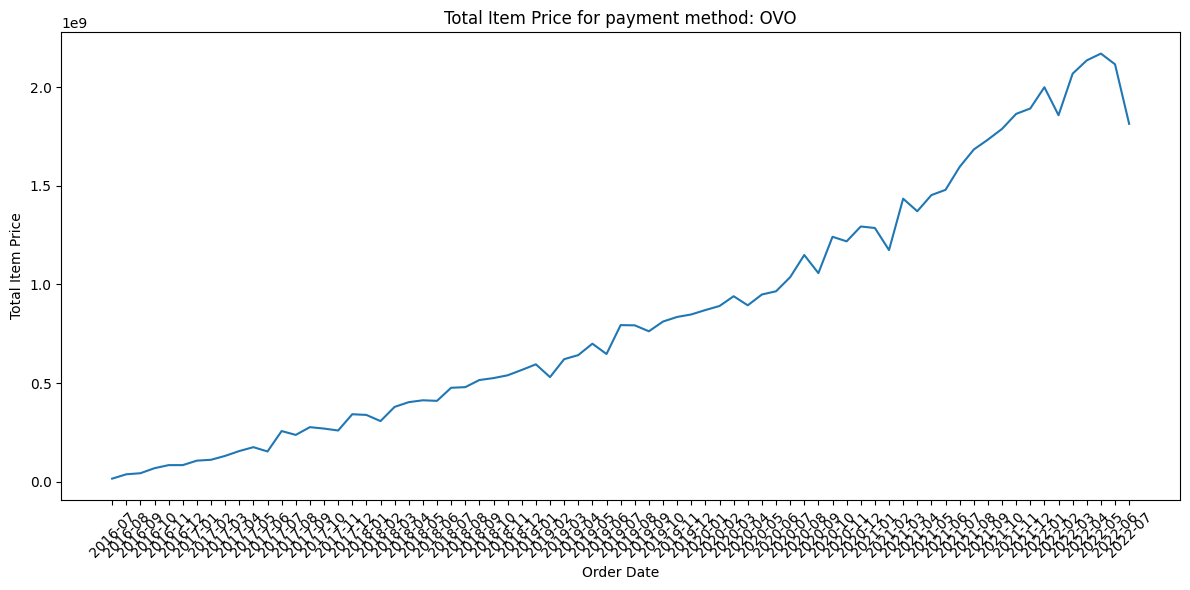

In [57]:
# 결제 방법 별로 그룹화하여 'item_price'의 합계 계산
df_grouped = df_ct_merged.groupby(['payment_method', 'order_date'])['item_price'].sum().reset_index()

# 각 결제 방법 별로 그래프를 따로 그립니다.
unique_locations = df_grouped['payment_method'].unique()
for location in unique_locations:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_grouped[df_grouped['payment_method'] == location], x='order_date', y='item_price')
    # 연도와 월을 함께 표시
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()
    plt.title(f'Total Item Price for payment method: {location}')
    plt.xlabel('Order Date')
    plt.ylabel('Total Item Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

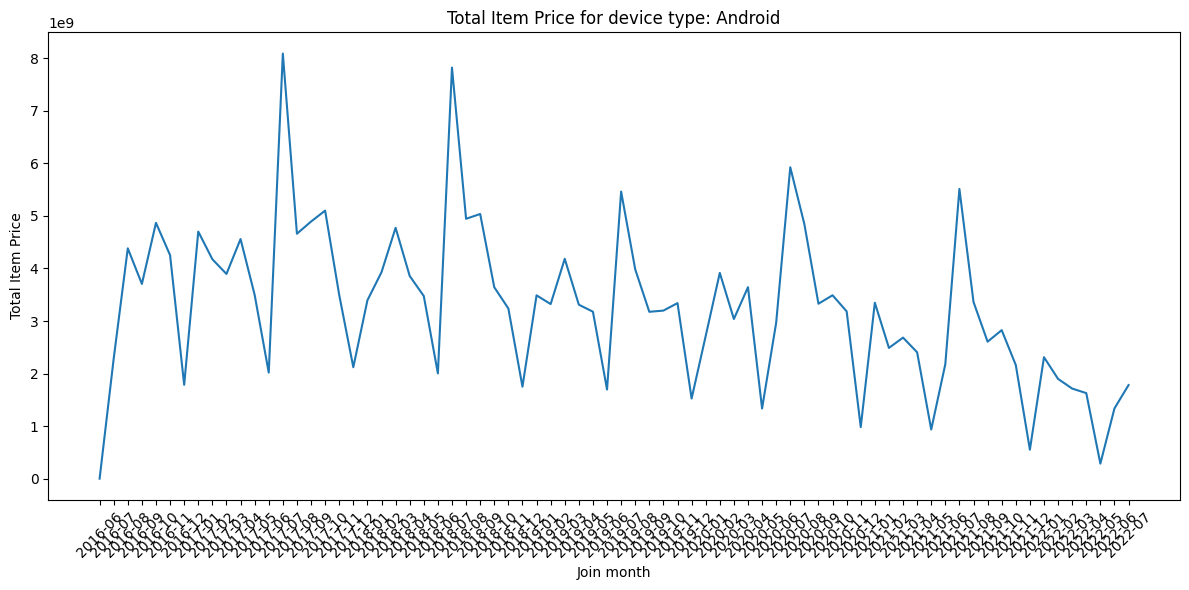

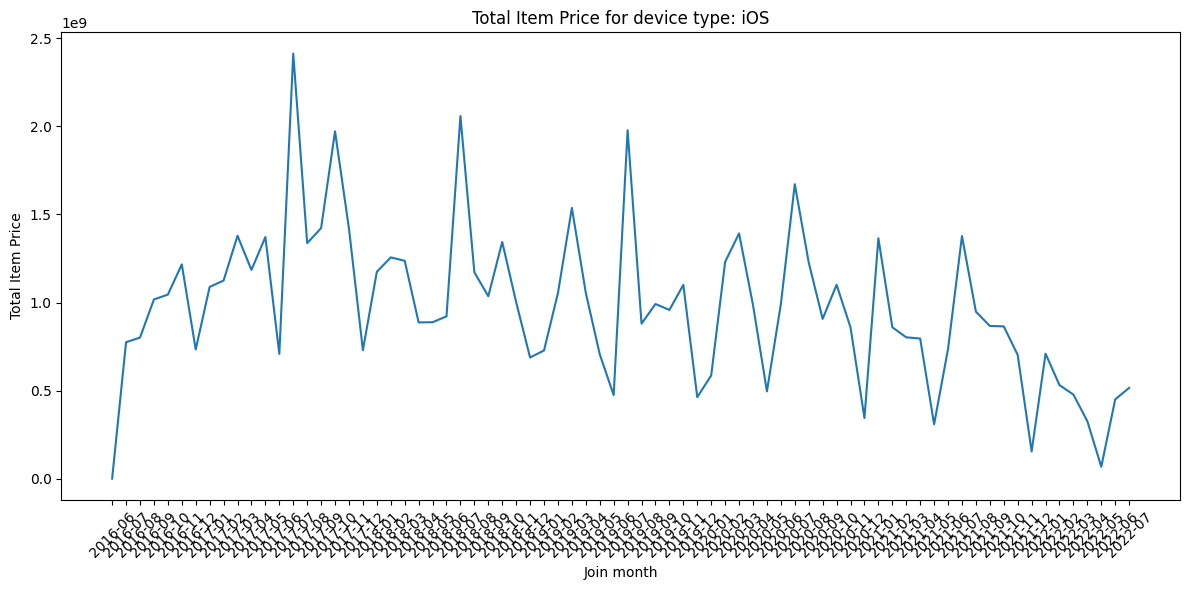

In [60]:
# 사용장치 별로 그룹화하여 'item_price'의 합계 계산
df_grouped = df_ct_merged.groupby(['device_type', 'join_year_month'])['item_price'].sum().reset_index()

# 각 사용장치 별로 그래프를 따로 그립니다.
unique_locations = df_grouped['device_type'].unique()
for location in unique_locations:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_grouped[df_grouped['device_type'] == location], x='join_year_month', y='item_price')
    # 연도와 월을 함께 표시
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()
    plt.title(f'Total Item Price for device type: {location}')
    plt.xlabel('Join month')
    plt.ylabel('Total Item Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

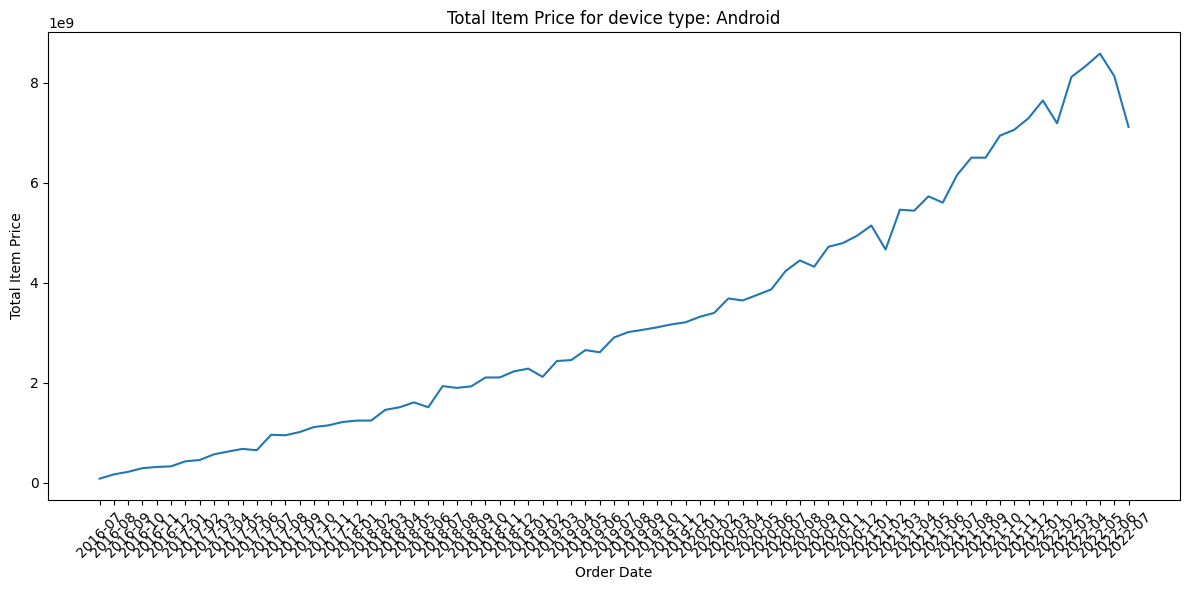

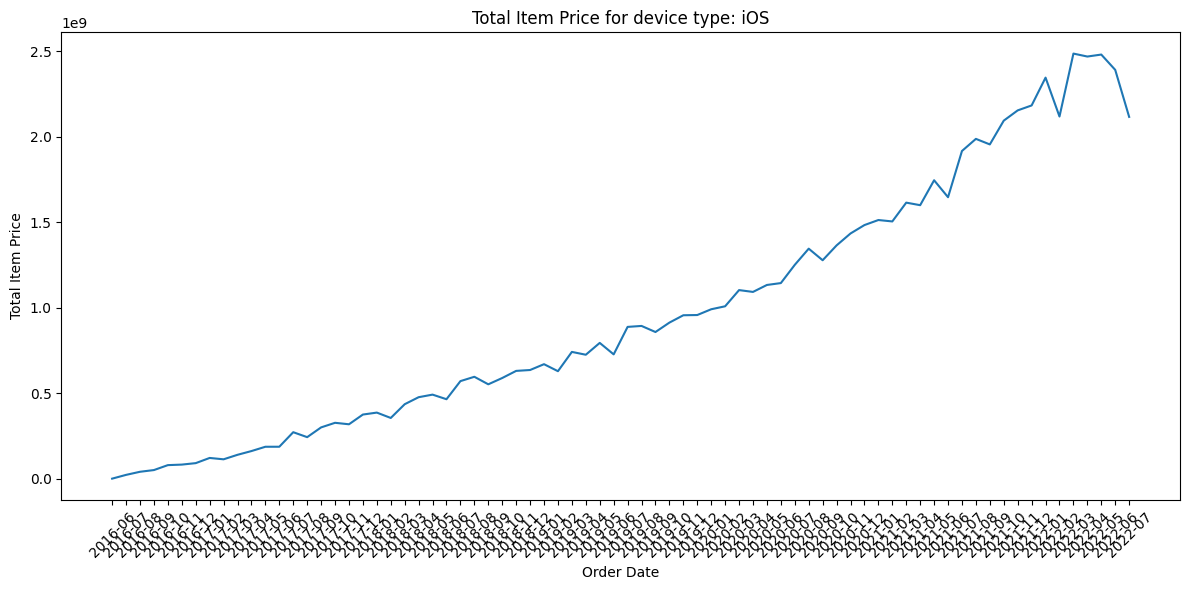

In [58]:
# 사용장치 별로 그룹화하여 'item_price'의 합계 계산
df_grouped = df_ct_merged.groupby(['device_type', 'order_date'])['item_price'].sum().reset_index()

# 각 사용장치 별로 그래프를 따로 그립니다.
unique_locations = df_grouped['device_type'].unique()
for location in unique_locations:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_grouped[df_grouped['device_type'] == location], x='order_date', y='item_price')
    # 연도와 월을 함께 표시
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()
    plt.title(f'Total Item Price for device type: {location}')
    plt.xlabel('Order Date')
    plt.ylabel('Total Item Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

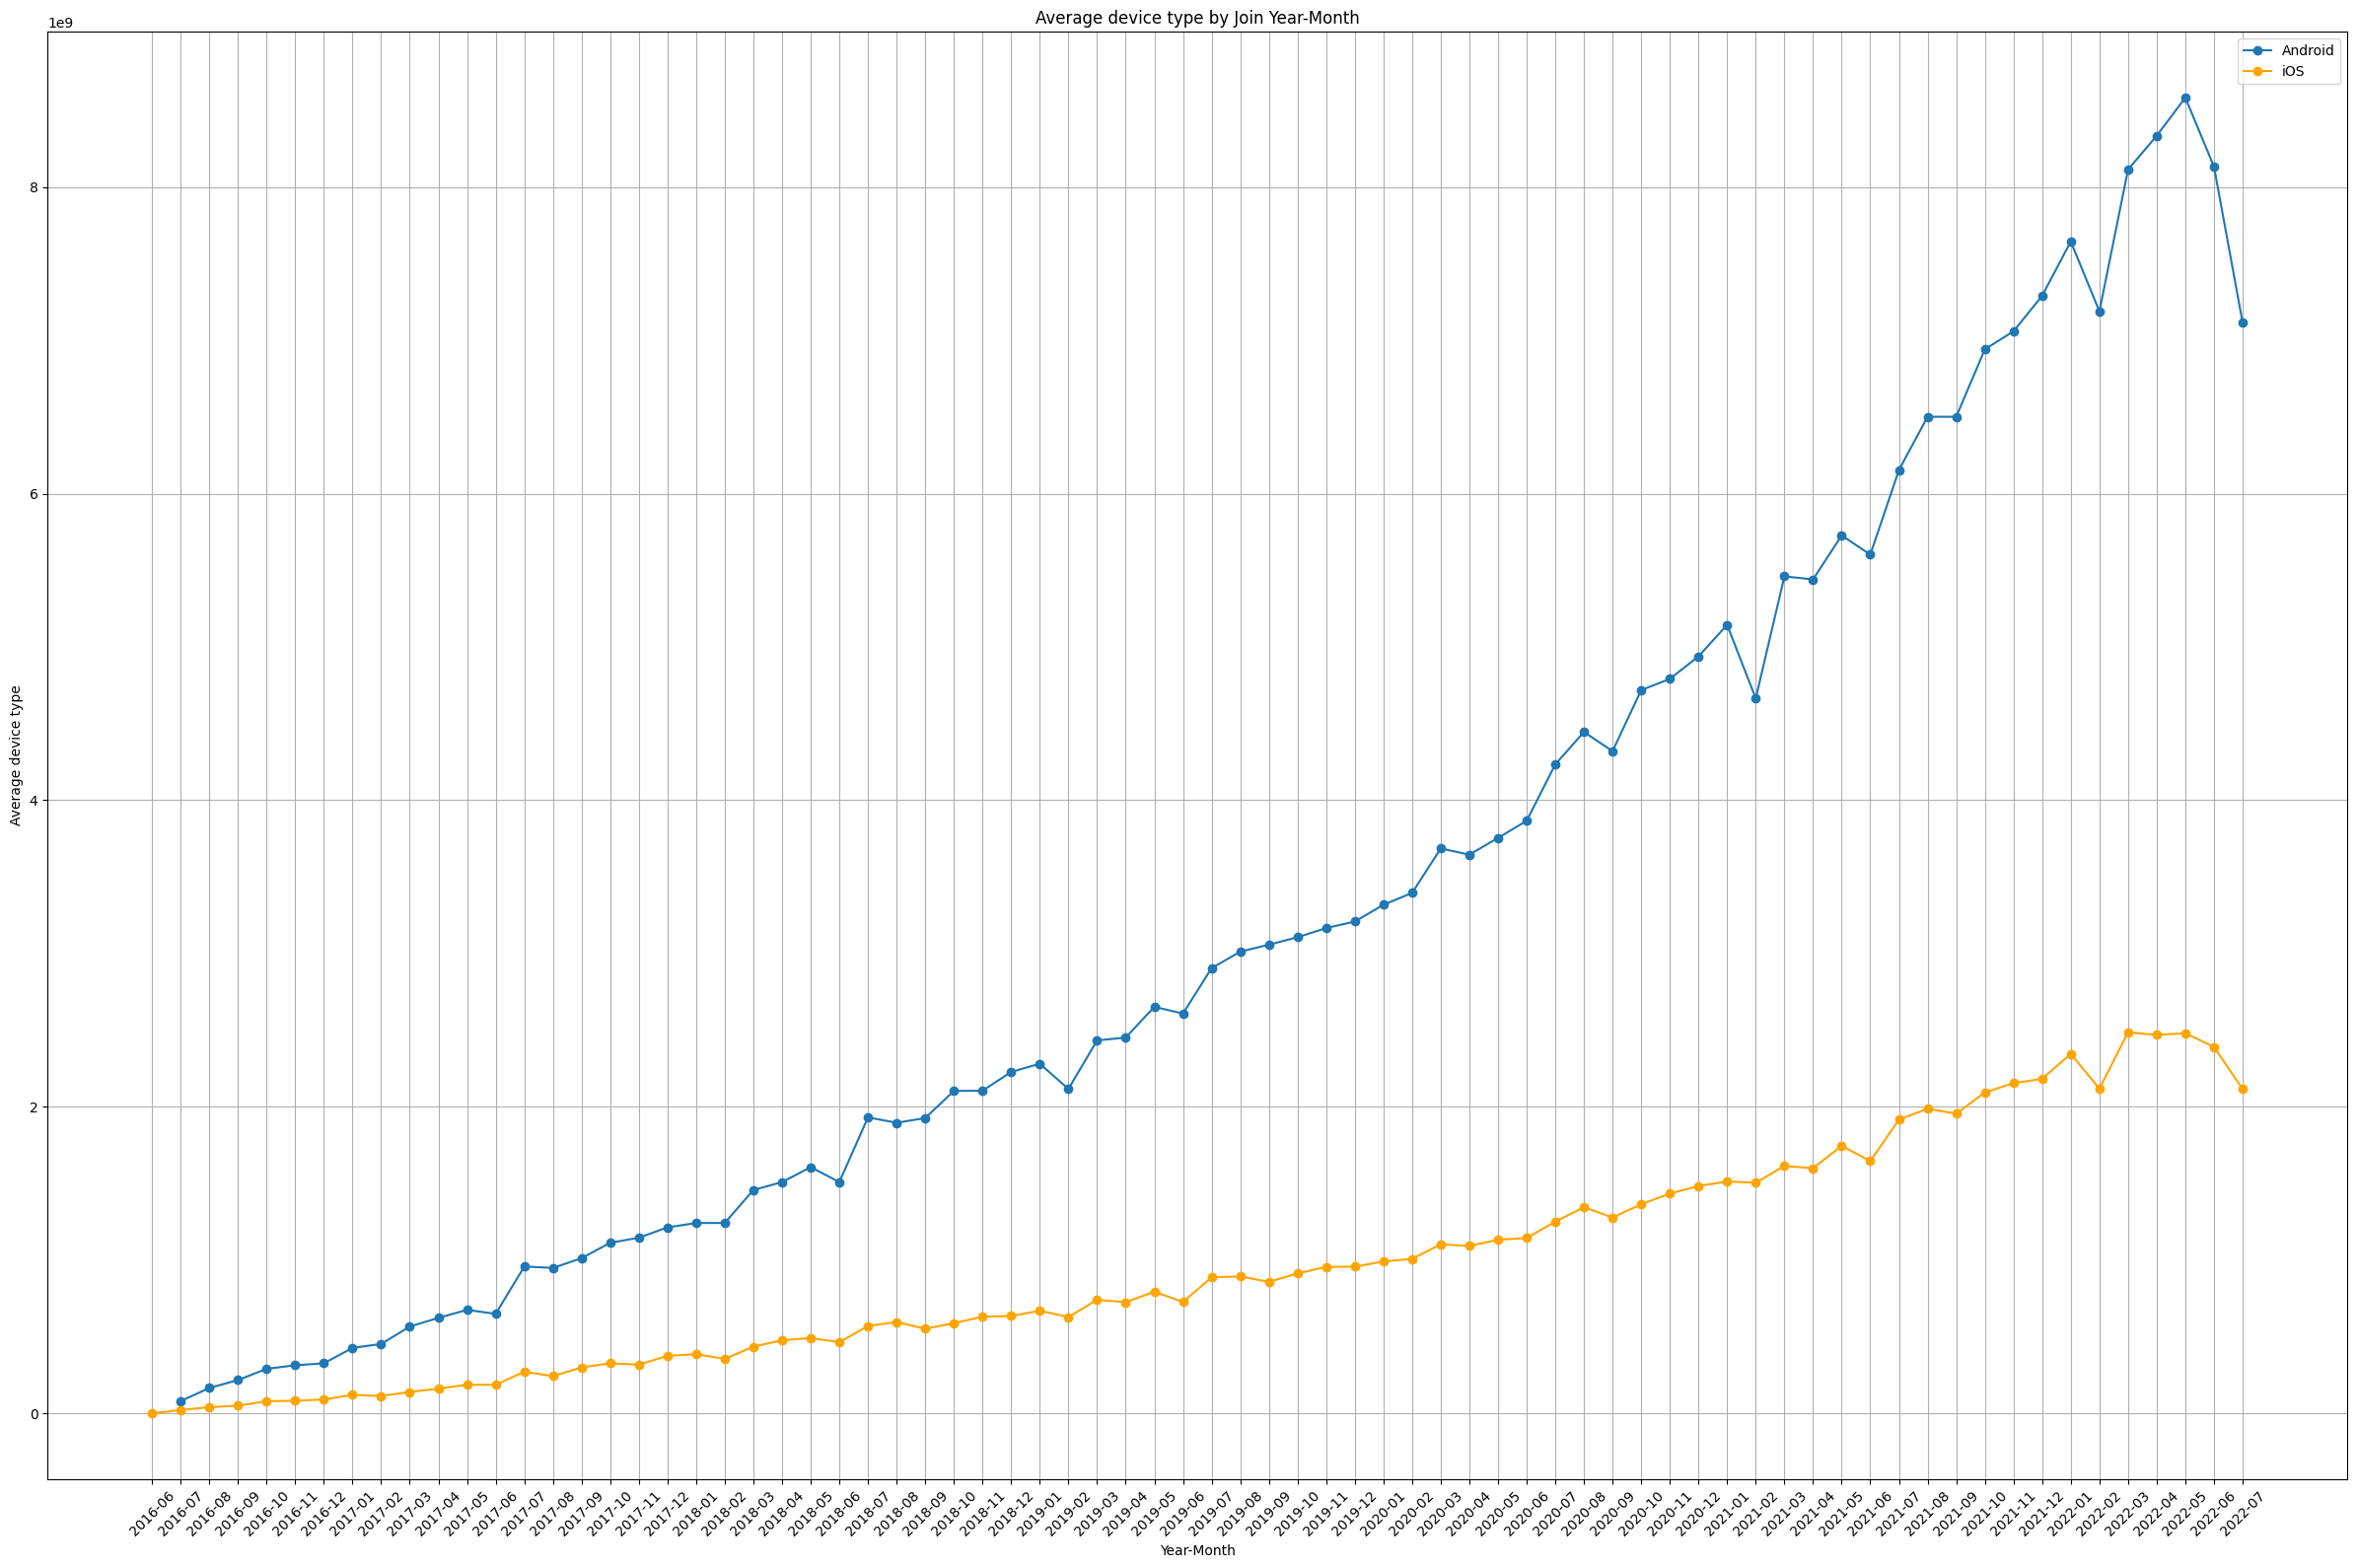

In [69]:
# 'order_date' 칼럼을 기준으로 그룹화하고 'device_type'의 평균을 계산합니다.
grouped_data = df_ct_merged.groupby(['order_date', 'device_type'])['item_price'].sum().unstack()

# 그룹화된 데이터를 시각화합니다.
plt.figure(figsize=(24, 16))

# 남성 데이터 시각화
plt.plot(grouped_data.index, grouped_data['Android'], marker='o', label='Android')
# 연도와 월을 함께 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

# 여성 데이터 시각화
plt.plot(grouped_data.index, grouped_data['iOS'], marker='o', color='orange', label='iOS')
# 연도와 월을 함께 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.xlabel('Year-Month')
plt.ylabel('Average device type')
plt.title('Average device type by Join Year-Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

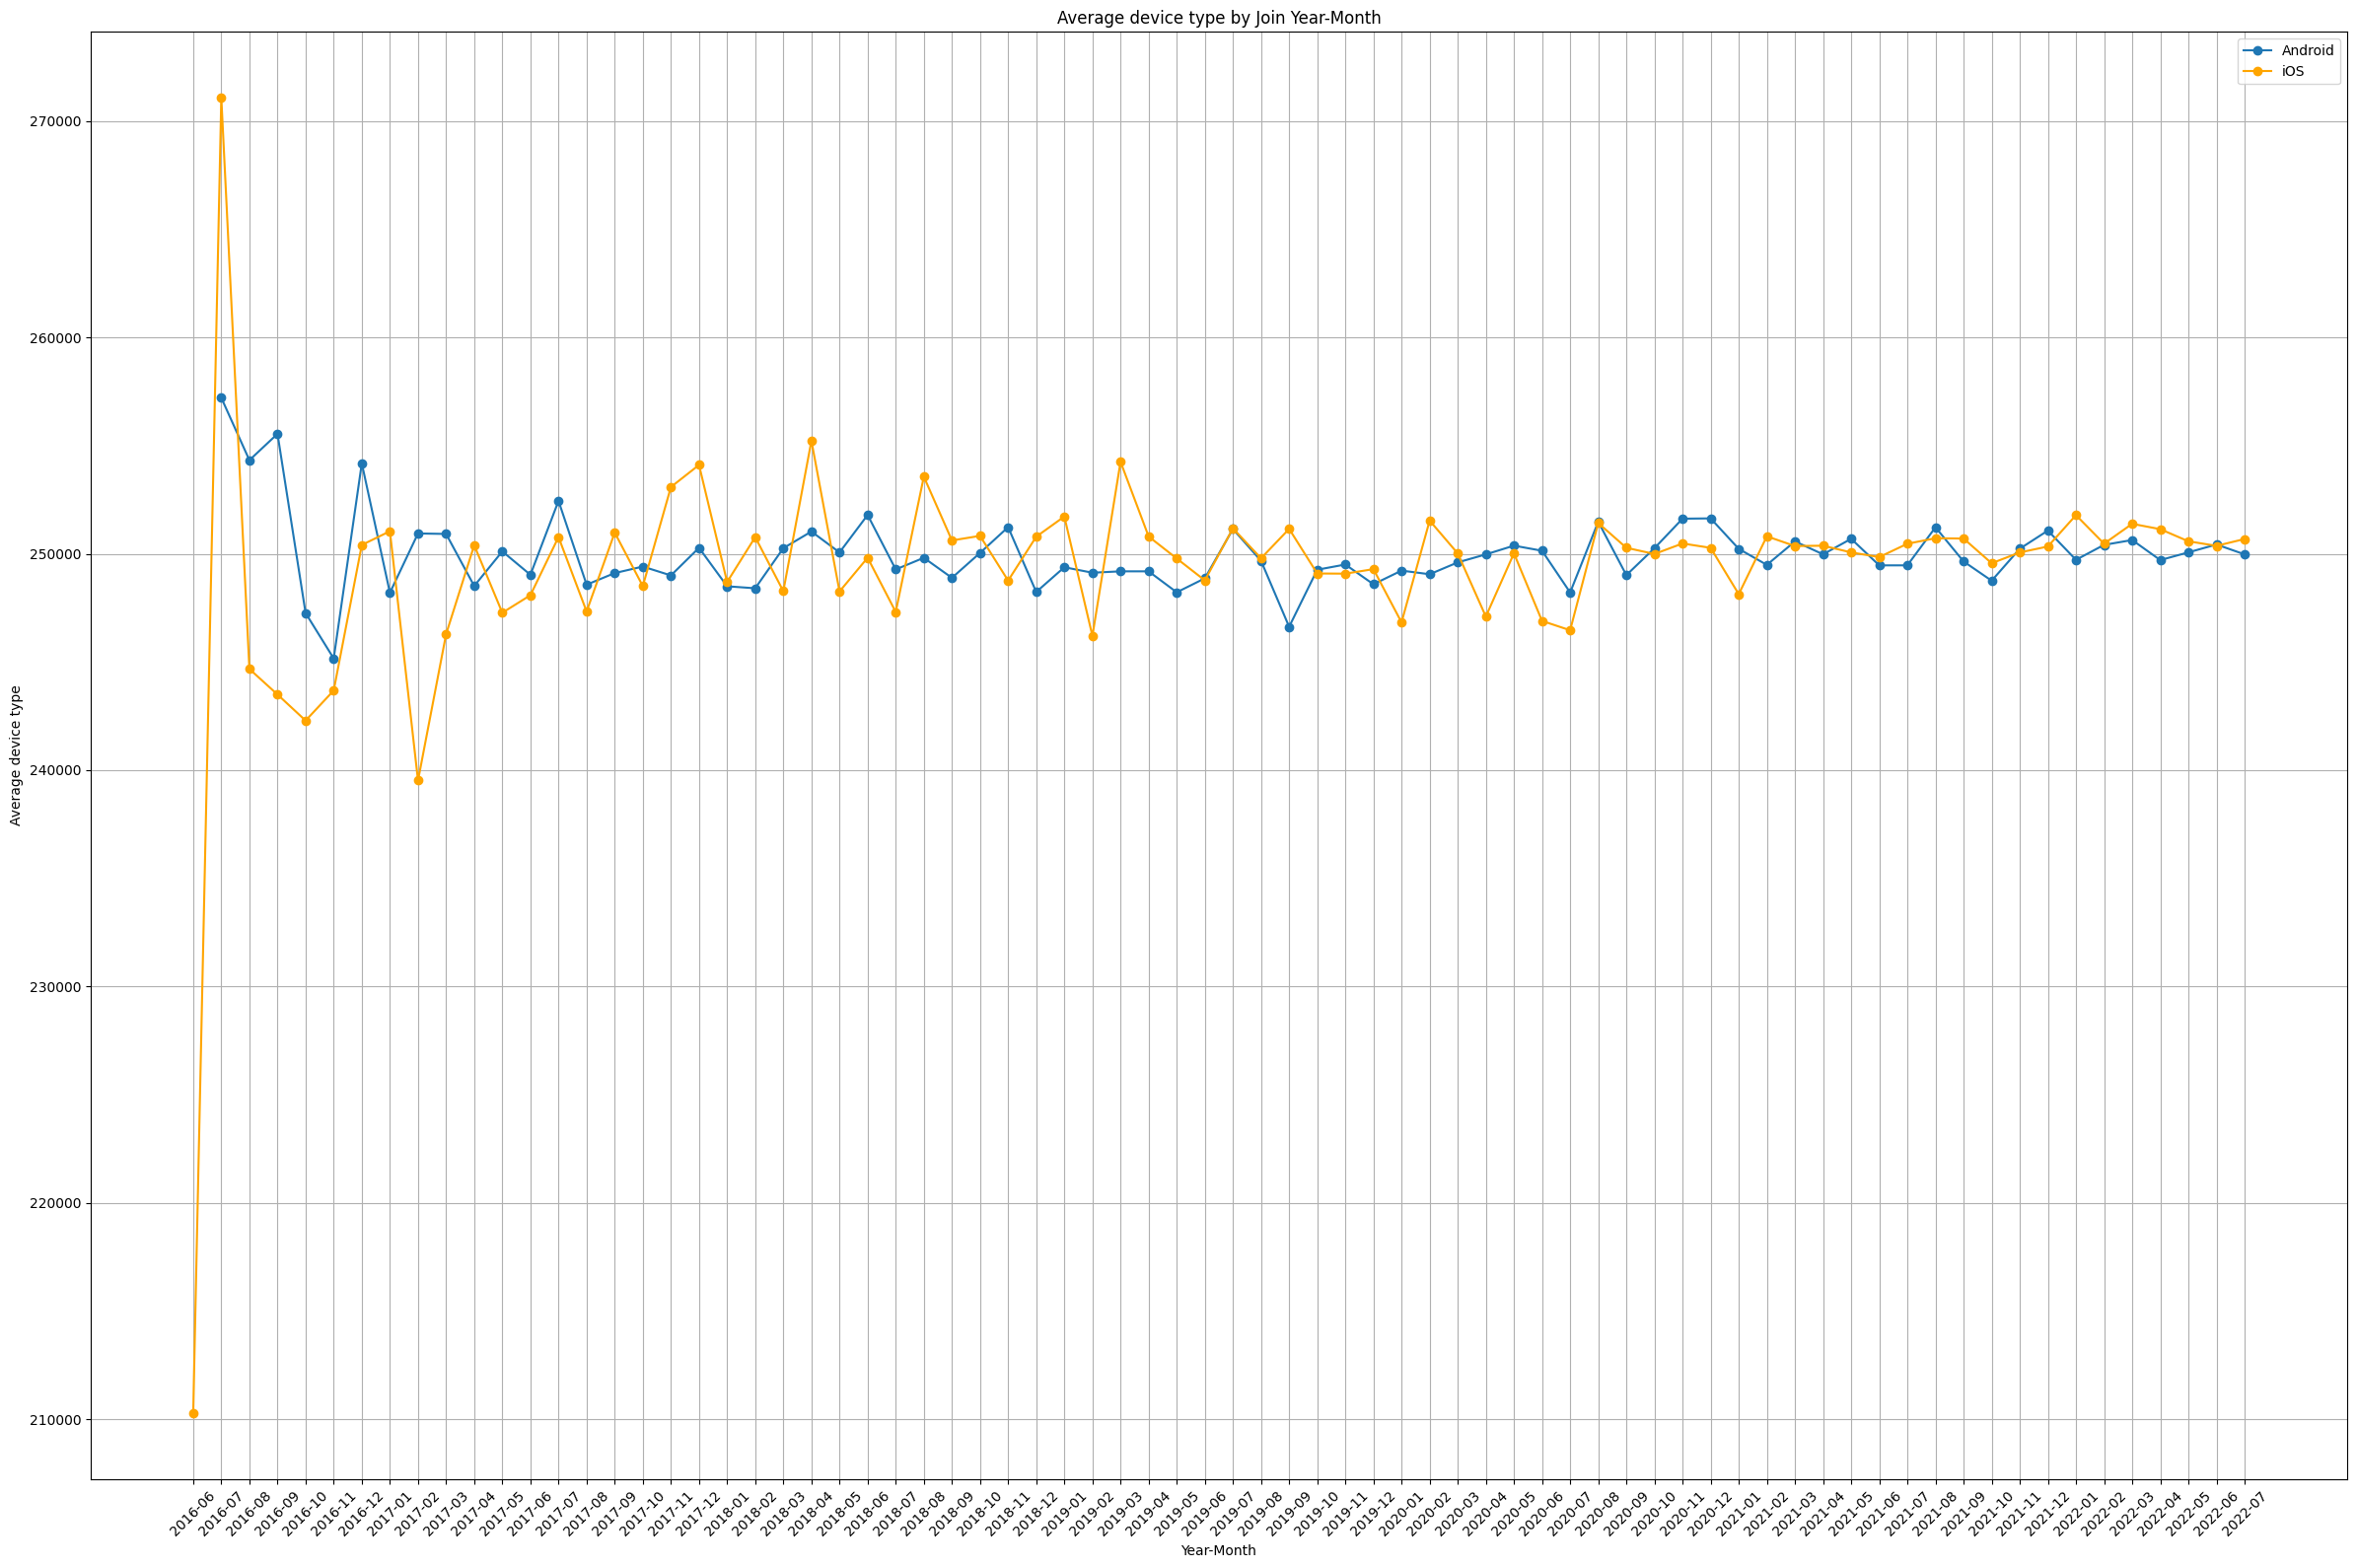

In [68]:
# 'order_date' 칼럼을 기준으로 그룹화하고 'device_type'의 평균을 계산합니다.
grouped_data = df_ct_merged.groupby(['order_date', 'device_type'])['item_price'].mean().unstack()

# 그룹화된 데이터를 시각화합니다.
plt.figure(figsize=(24, 16))

# 남성 데이터 시각화
plt.plot(grouped_data.index, grouped_data['Android'], marker='o', label='Android')
# 연도와 월을 함께 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

# 여성 데이터 시각화
plt.plot(grouped_data.index, grouped_data['iOS'], marker='o', color='orange', label='iOS')
# 연도와 월을 함께 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.xlabel('Year-Month')
plt.ylabel('Average device type')
plt.title('Average device type by Join Year-Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


한 달마다의 롤링 리텐션을 계산하려면 다음과 같은 단계를 따를 수 있습니다:

기준 날짜 설정: 각 월의 시작일을 기준으로 롤링 리텐션을 계산합니다.
사용자 그룹화: 기준 날짜에 가입한 사용자를 그룹화합니다.
리텐션 계산: 각 그룹에 대해 이전 월에 가입한 사용자 중 다음 월에도 활동한 사용자의 비율을 계산합니다.
결과 시각화: 계산한 리텐션 값을 시각화합니다.

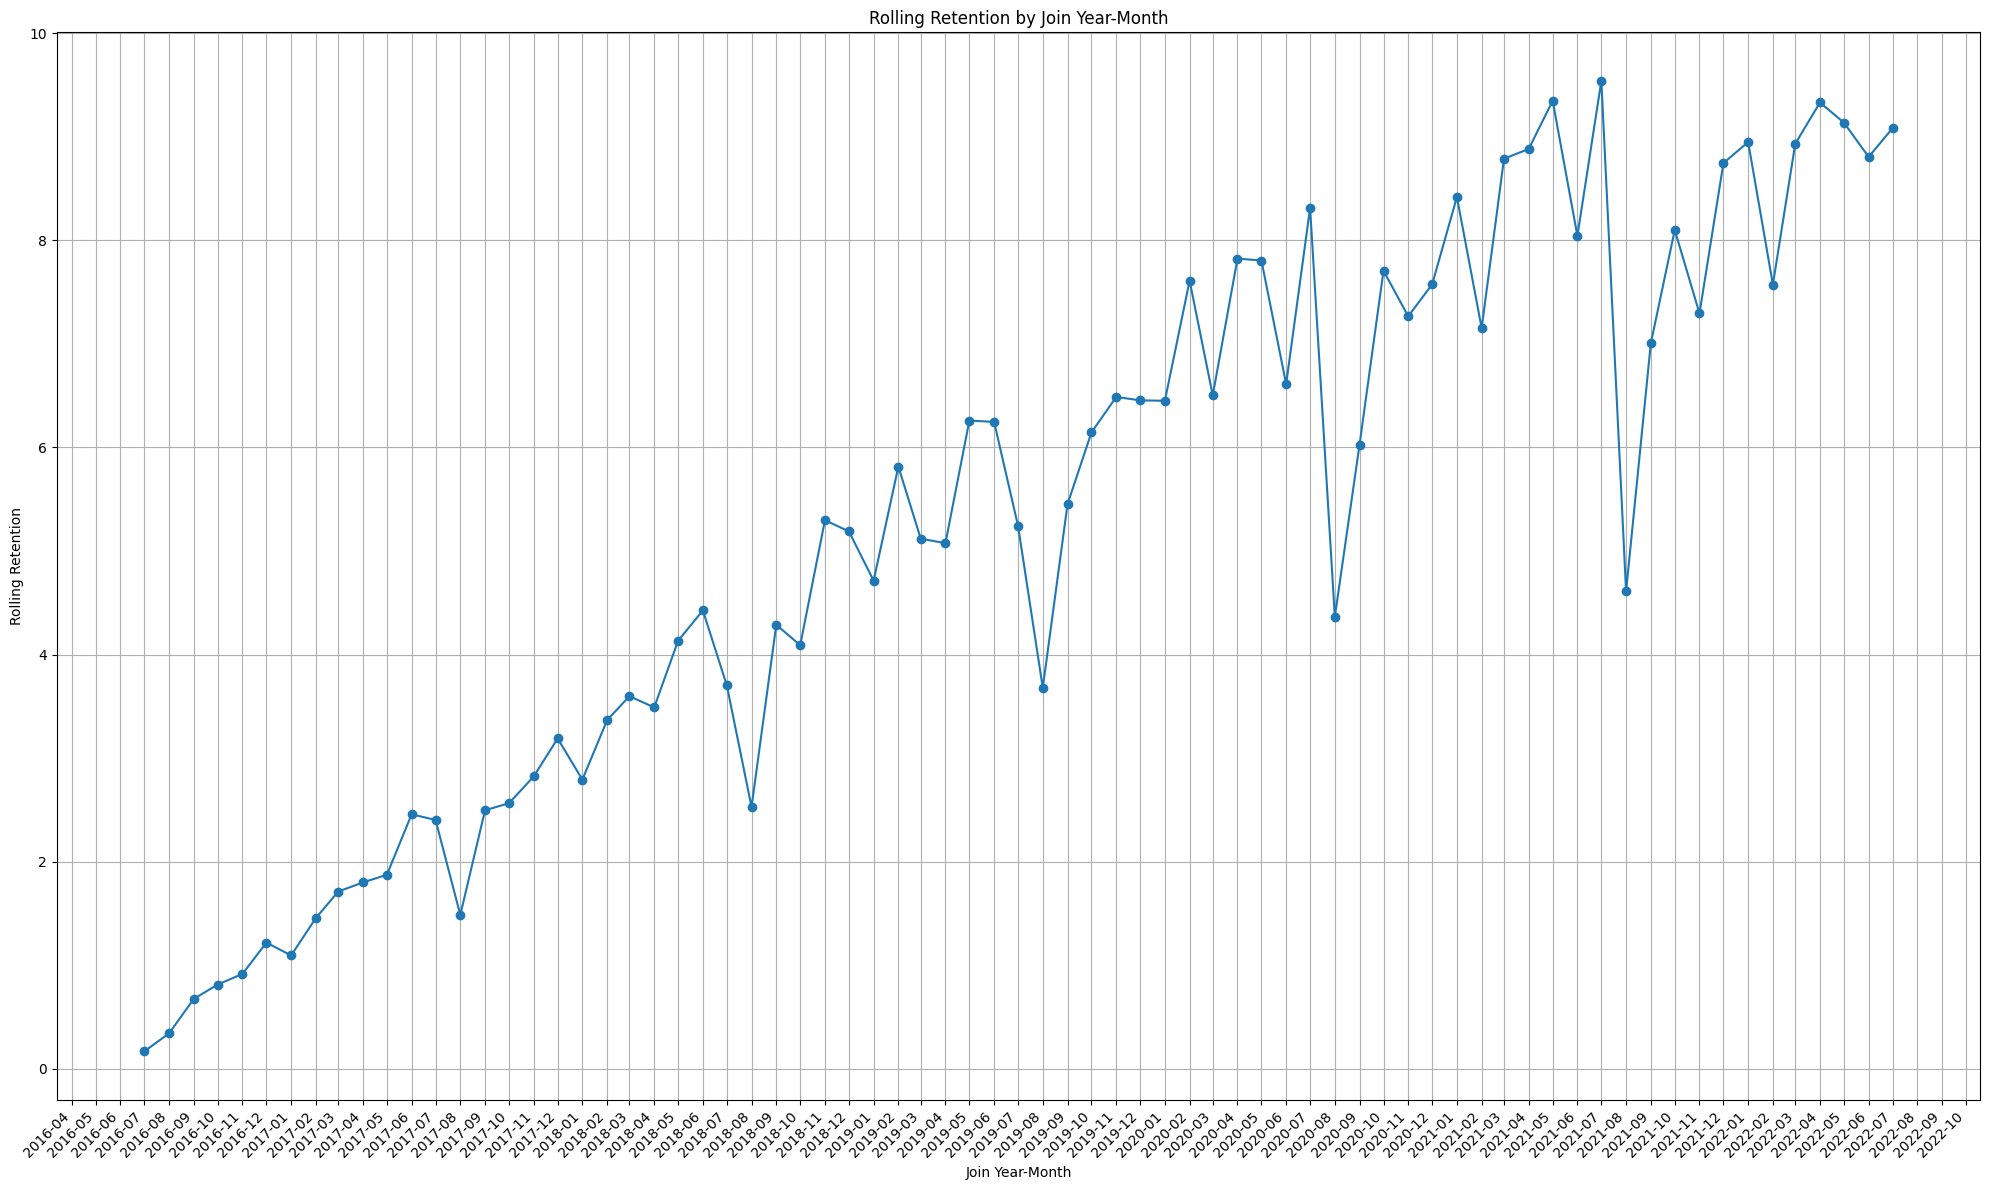

In [16]:
# 사용자 그룹화
grouped_data = df_customer.groupby('join_year_month')['customer_id'].count()

# 리텐션 계산
rolling_retention = []
for i in range(1, len(grouped_data)):
    current_month = grouped_data.index[i]
    prev_month = grouped_data.index[i - 1]

    # prev_month와 current_month 사이의 월 수 계산
    month_diff = (current_month.year - prev_month.year) * 12 + current_month.month - prev_month.month

    retention = df_transaction_new[(df_transaction_new['order_date'] >= prev_month)
                                  & (df_transaction_new['order_date'] < current_month)]['customer_id'].nunique() / grouped_data[i - 1]
    rolling_retention.append(retention)

# 결과 시각화
plt.figure(figsize=(20, 12))
plt.plot(grouped_data.index[1:], rolling_retention, marker='o')

# 연도와 월을 함께 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.xlabel('Join Year-Month')
plt.ylabel('Rolling Retention')
plt.title('Rolling Retention by Join Year-Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         100000 non-null  int64         
 1   first_name          100000 non-null  object        
 2   last_name           100000 non-null  object        
 3   username            100000 non-null  object        
 4   email               100000 non-null  object        
 5   gender              100000 non-null  object        
 6   birthdate           100000 non-null  datetime64[ns]
 7   device_type         100000 non-null  object        
 8   device_id           100000 non-null  object        
 9   device_version      100000 non-null  object        
 10  home_location_lat   100000 non-null  float64       
 11  home_location_long  100000 non-null  float64       
 12  home_location       100000 non-null  object        
 13  first_join_date     100000 non

p-value가 작을수록 배송비용 평균이 서로 다른 것으로 간주

일반적으로 p-value가 0.05보다 작으면 차이가 유의미하다고 판단

In [20]:
import scipy.stats as stats

# home_location별로 shipment_fee 데이터를 추출합니다.
home_location_groups = [df_ct_merged[df_ct_merged['home_location'] == location]['shipment_fee'] for location in df_ct_merged['home_location'].unique()]

# ANOVA 실행
f_stat, p_value = stats.f_oneway(*home_location_groups)

# 결과 출력
print(f'One-way ANOVA')
print(f'F-statistic: {f_stat}')
print(f'p-value: {p_value}')

One-way ANOVA
F-statistic: 5.028514311480637
p-value: 4.119379007453556e-19


F-statistic (F-통계량): F-통계량은 그룹 간의 분산과 그룹 내의 분산의 비율을 나타냅니다. 큰 F-통계량 값은 그룹 간의 평균 차이가 있을 가능성을 높이 나타냅니다.

p-value: p-value는 귀무가설이 참일 때 관측된 데이터보다 더 극단적인 결과를 얻을 확률을 나타냅니다. 작은 p-value는 귀무가설을 기각하고 대립가설을 받아들일 수 있는 강력한 증거를 제공합니다.

해석:

F-statistic 값이 5.03이므로 그룹 간의 평균 배송비용에 차이가 있을 가능성이 상당히 높다는 것을 나타냅니다.
p-value가 거의 0에 가까운 4.11e-19로 매우 작습니다. 이는 귀무가설(모든 그룹의 평균이 동일하다)을 기각하고 그룹 간의 평균 차이가 있다는 대립가설을 지지합니다.
따라서 ANOVA 결과로 보아, home_location별로 배송비용 평균에 통계적으로 유의미한 차이가 있다고 할 수 있습니다. 다만, 어떤 그룹 간에 정확히 어떤 차이가 있는지는 ANOVA 결과만으로는 파악하기 어려울 수 있습니다. 추가적인 사후 분석이 필요할 수 있습니다.

신규 고객 증가율

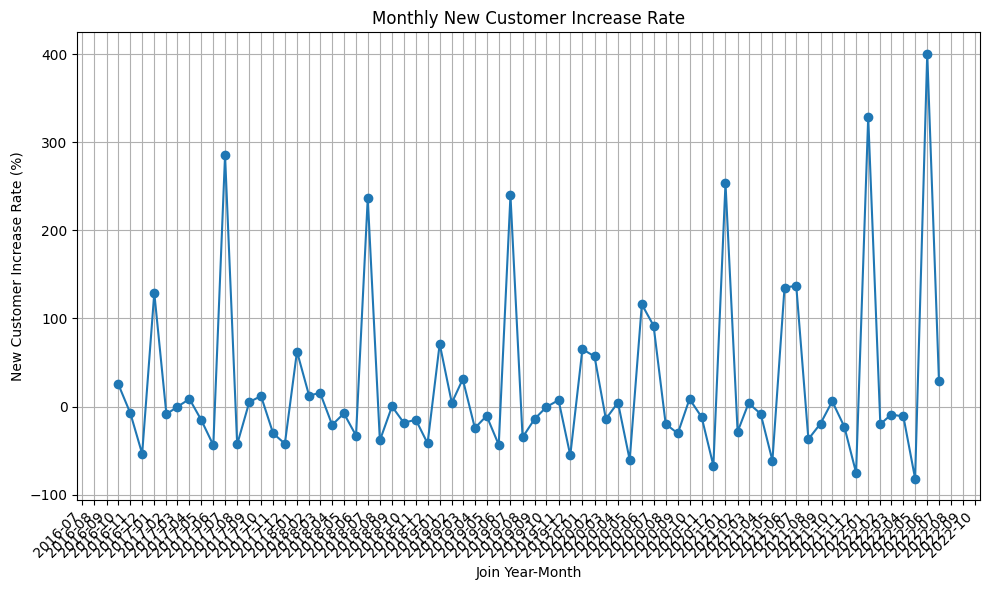

In [17]:
# '2016년 9월'부터의 데이터만 선택
start_date = pd.to_datetime('2016-09')
df_customer_filtered = df_ct_merged[df_ct_merged['first_join_date'] >= start_date]

# 월별 고객 가입 수 계산
df_customer_filtered['join_year_month'] = df_customer_filtered['first_join_date'].apply(lambda x: x.replace(day=1))
monthly_total_customers = df_customer_filtered.groupby('join_year_month')['customer_id'].count()

# 신규 고객 증가율 계산
monthly_new_customers_increase = monthly_total_customers.pct_change() * 100

# 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(monthly_total_customers.index, monthly_new_customers_increase, marker='o')

# 연도와 월을 함께 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.xlabel('Join Year-Month')
plt.ylabel('New Customer Increase Rate (%)')
plt.title('Monthly New Customer Increase Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

신규고객수 증가량에 따른 매출액의 증가

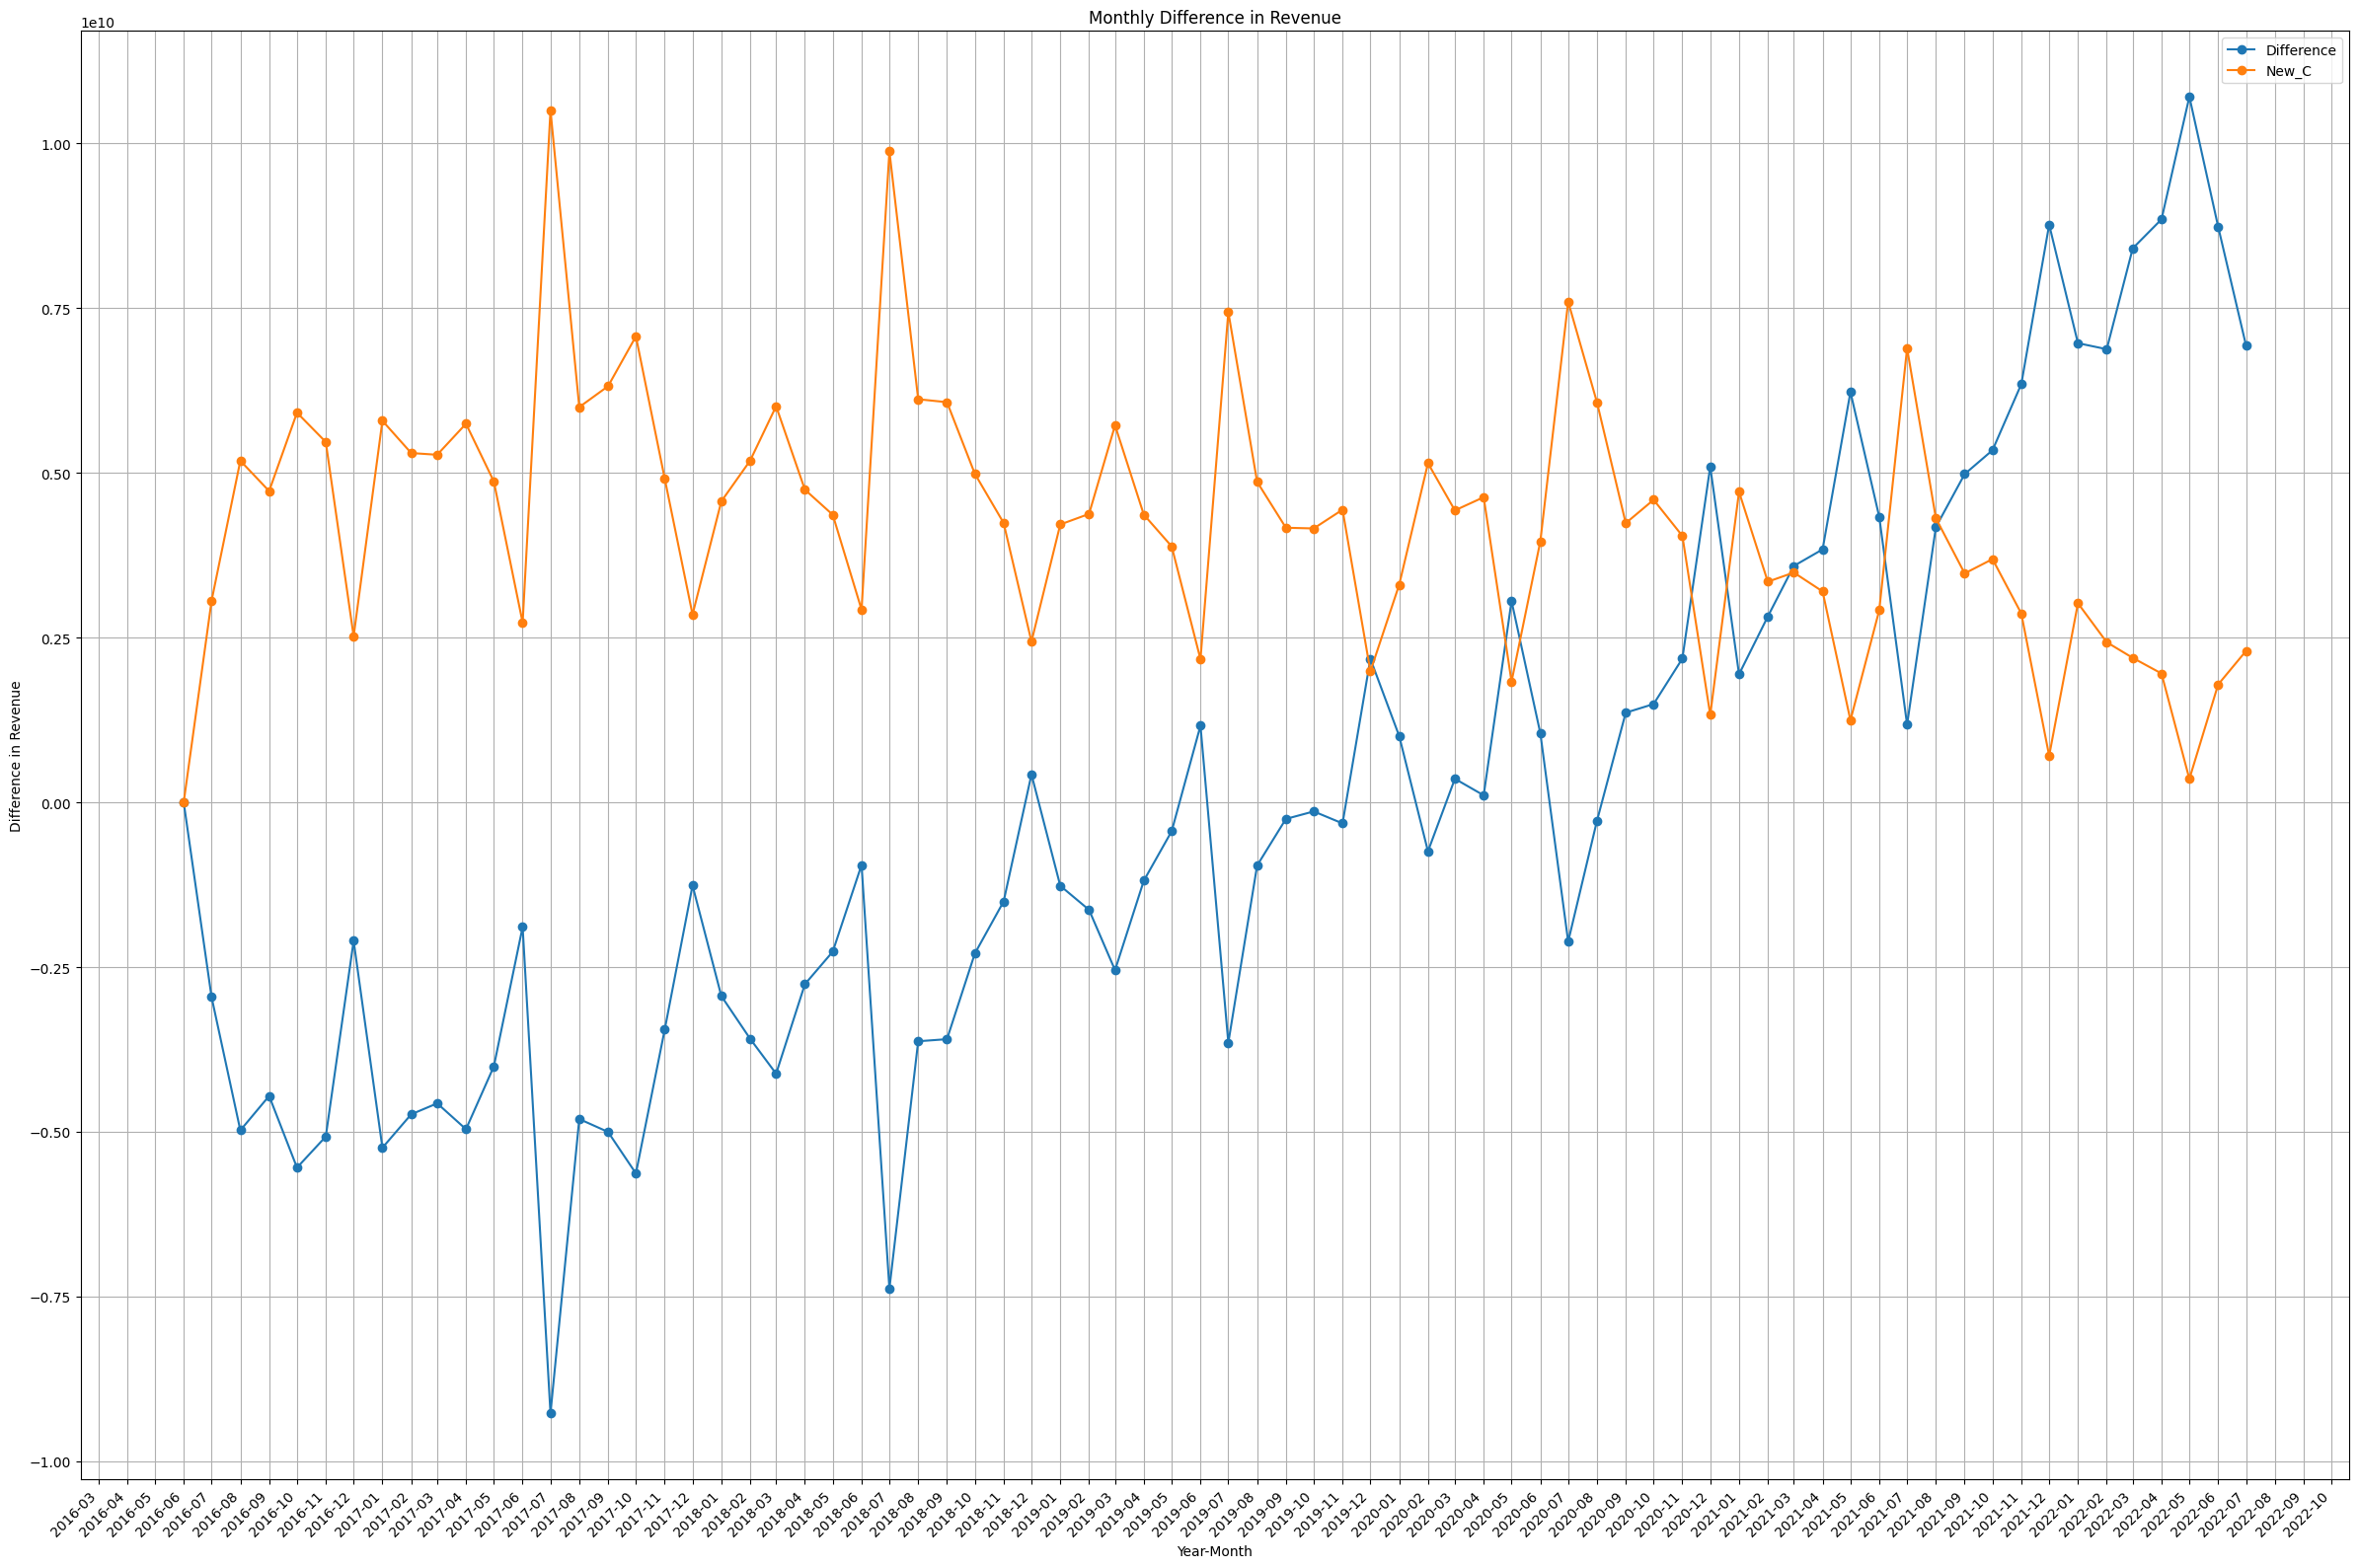

In [19]:
grouped_data = df_ct_merged.groupby('order_date')['item_price'].sum()
grouped_data2 = df_ct_merged.groupby('join_year_month')['item_price'].sum()

difference = grouped_data - grouped_data2

plt.figure(figsize=(24, 16))

plt.plot(difference.index, difference.values, marker='o', label='Difference')
plt.plot(grouped_data2.index, grouped_data2.values, marker='o', label='New_C')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.xlabel('Year-Month')
plt.ylabel('Difference in Revenue')
plt.title('Monthly Difference in Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

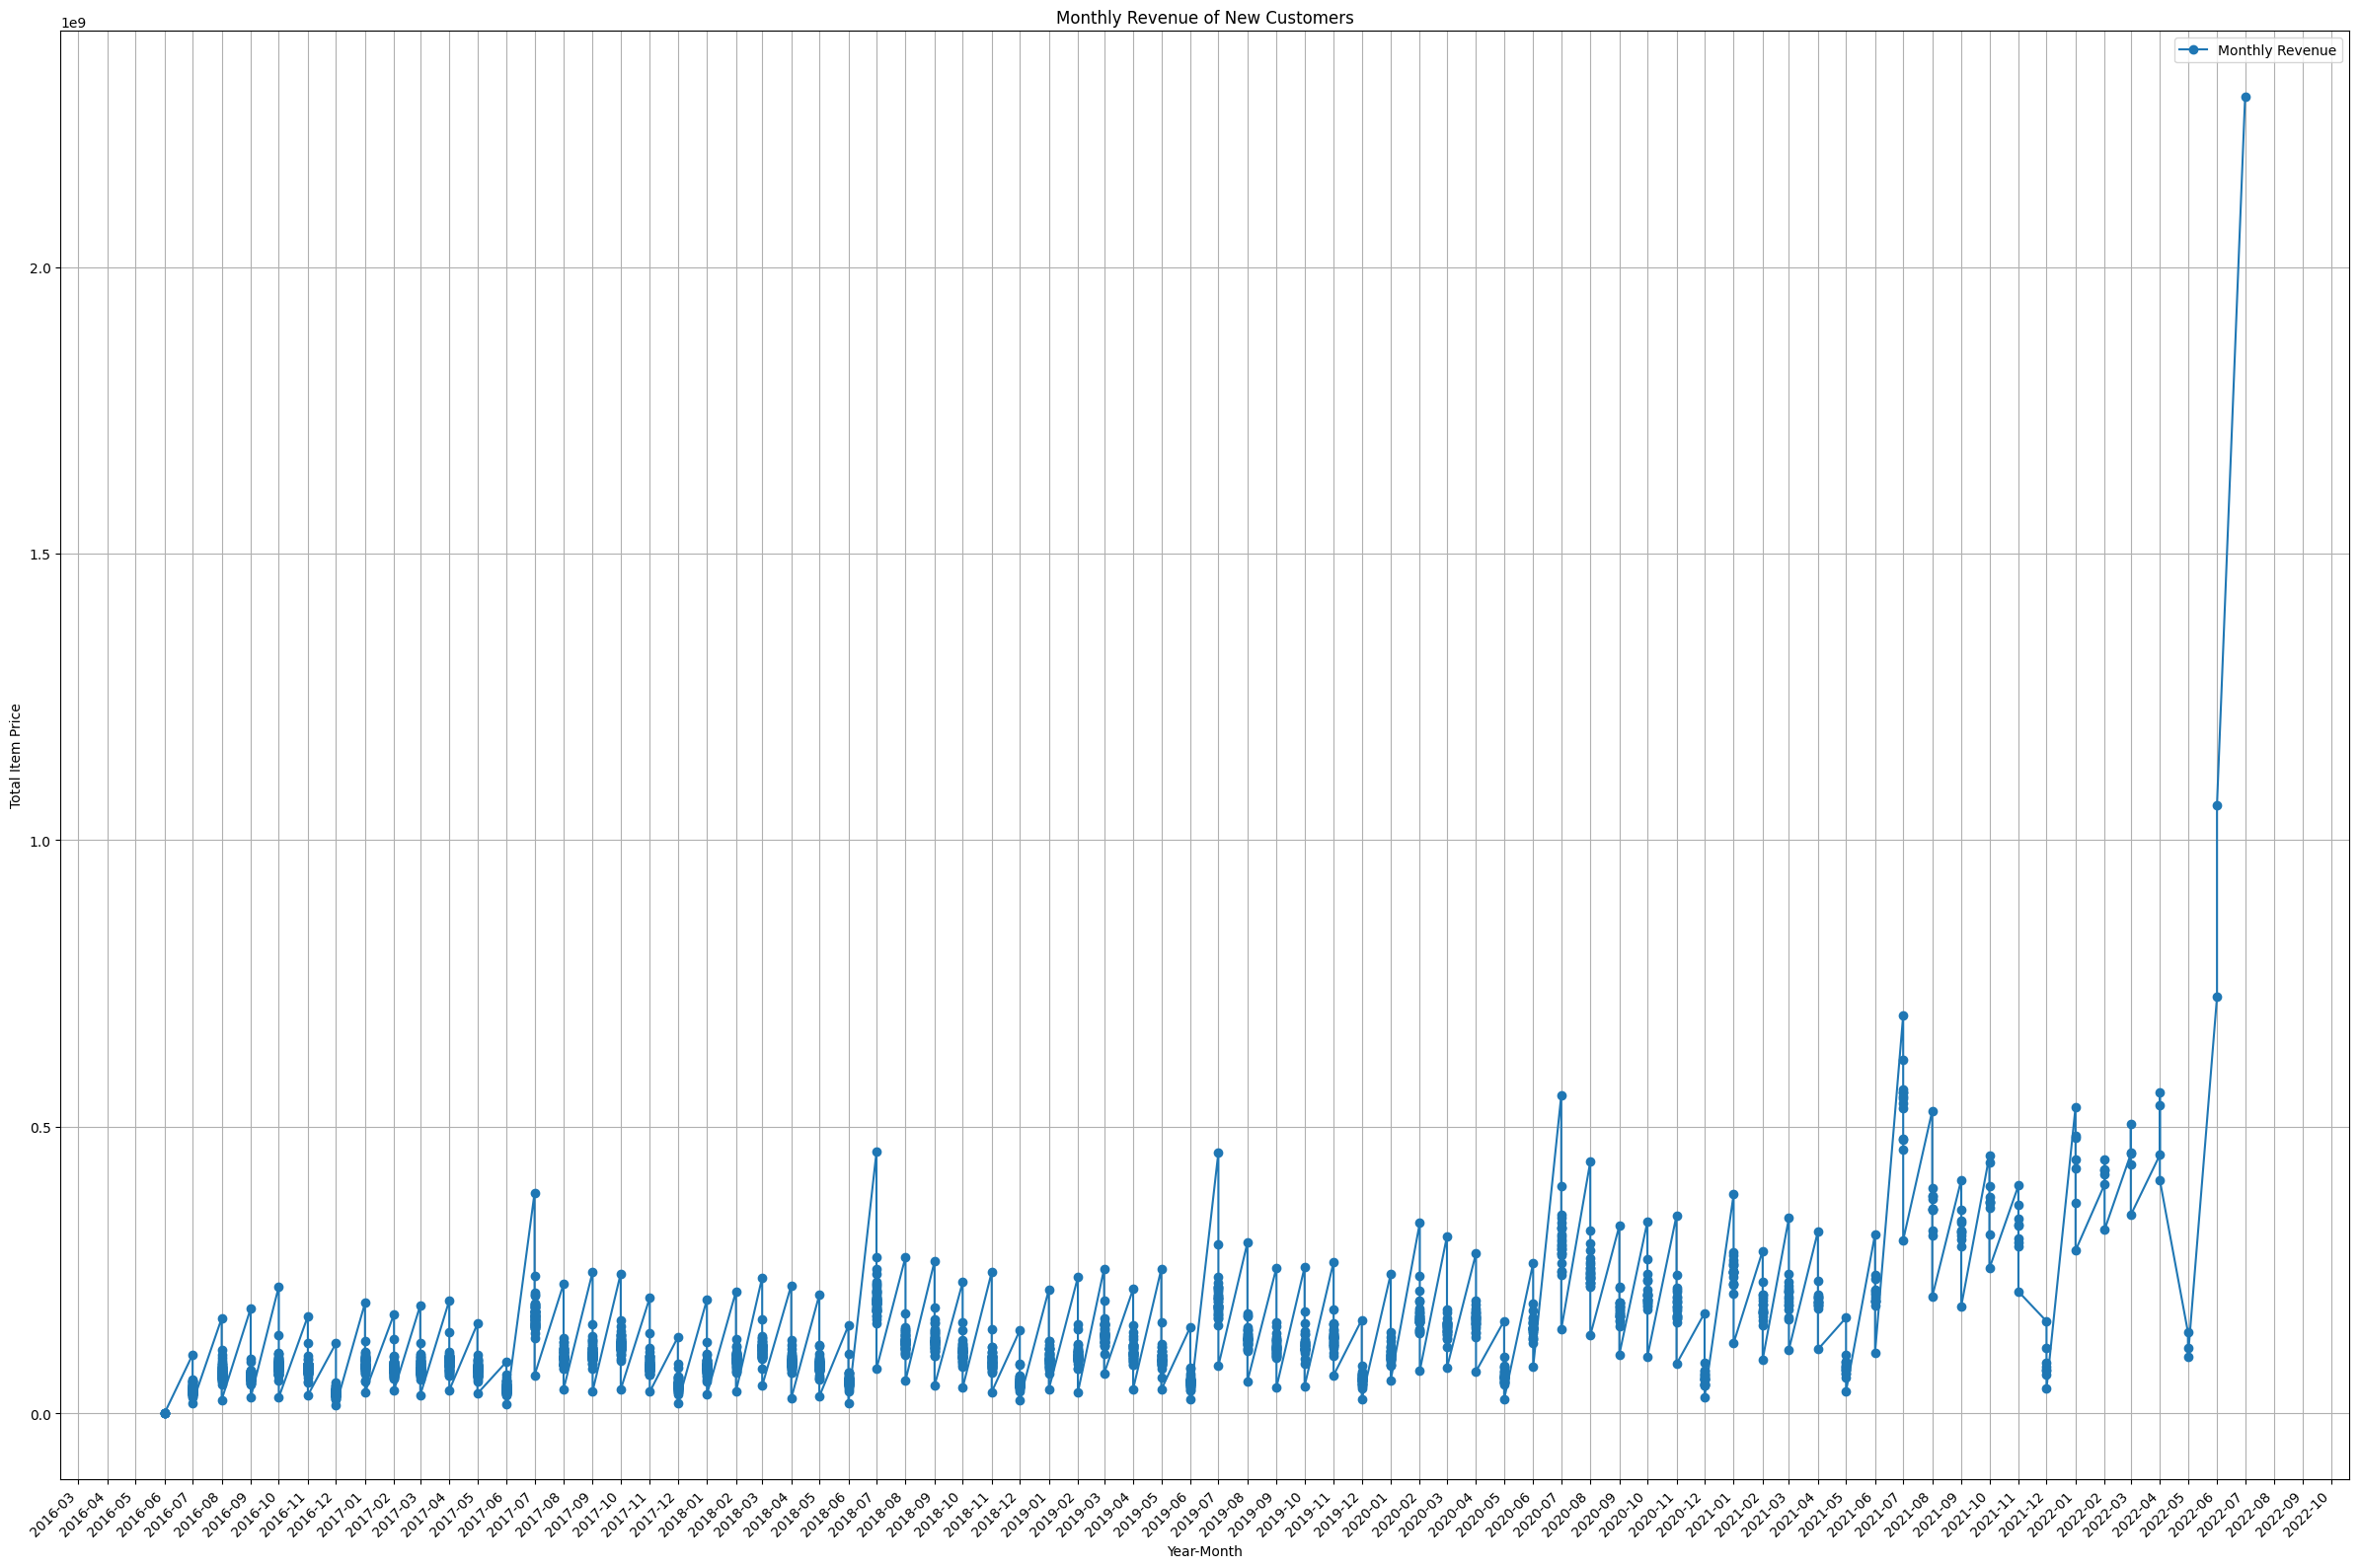

In [21]:
# Group by 'join_year_month' and sum 'item_price'
grouped_data = df_ct_merged.groupby(['join_year_month', 'order_date'])['item_price'].sum()
grouped_data = grouped_data.reset_index()
# Plotting
plt.figure(figsize=(24, 16))

plt.plot(grouped_data['join_year_month'], grouped_data['item_price'], marker='o', label='Monthly Revenue')

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.xlabel('Year-Month')
plt.ylabel('Total Item Price')
plt.title('Monthly Revenue of New Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

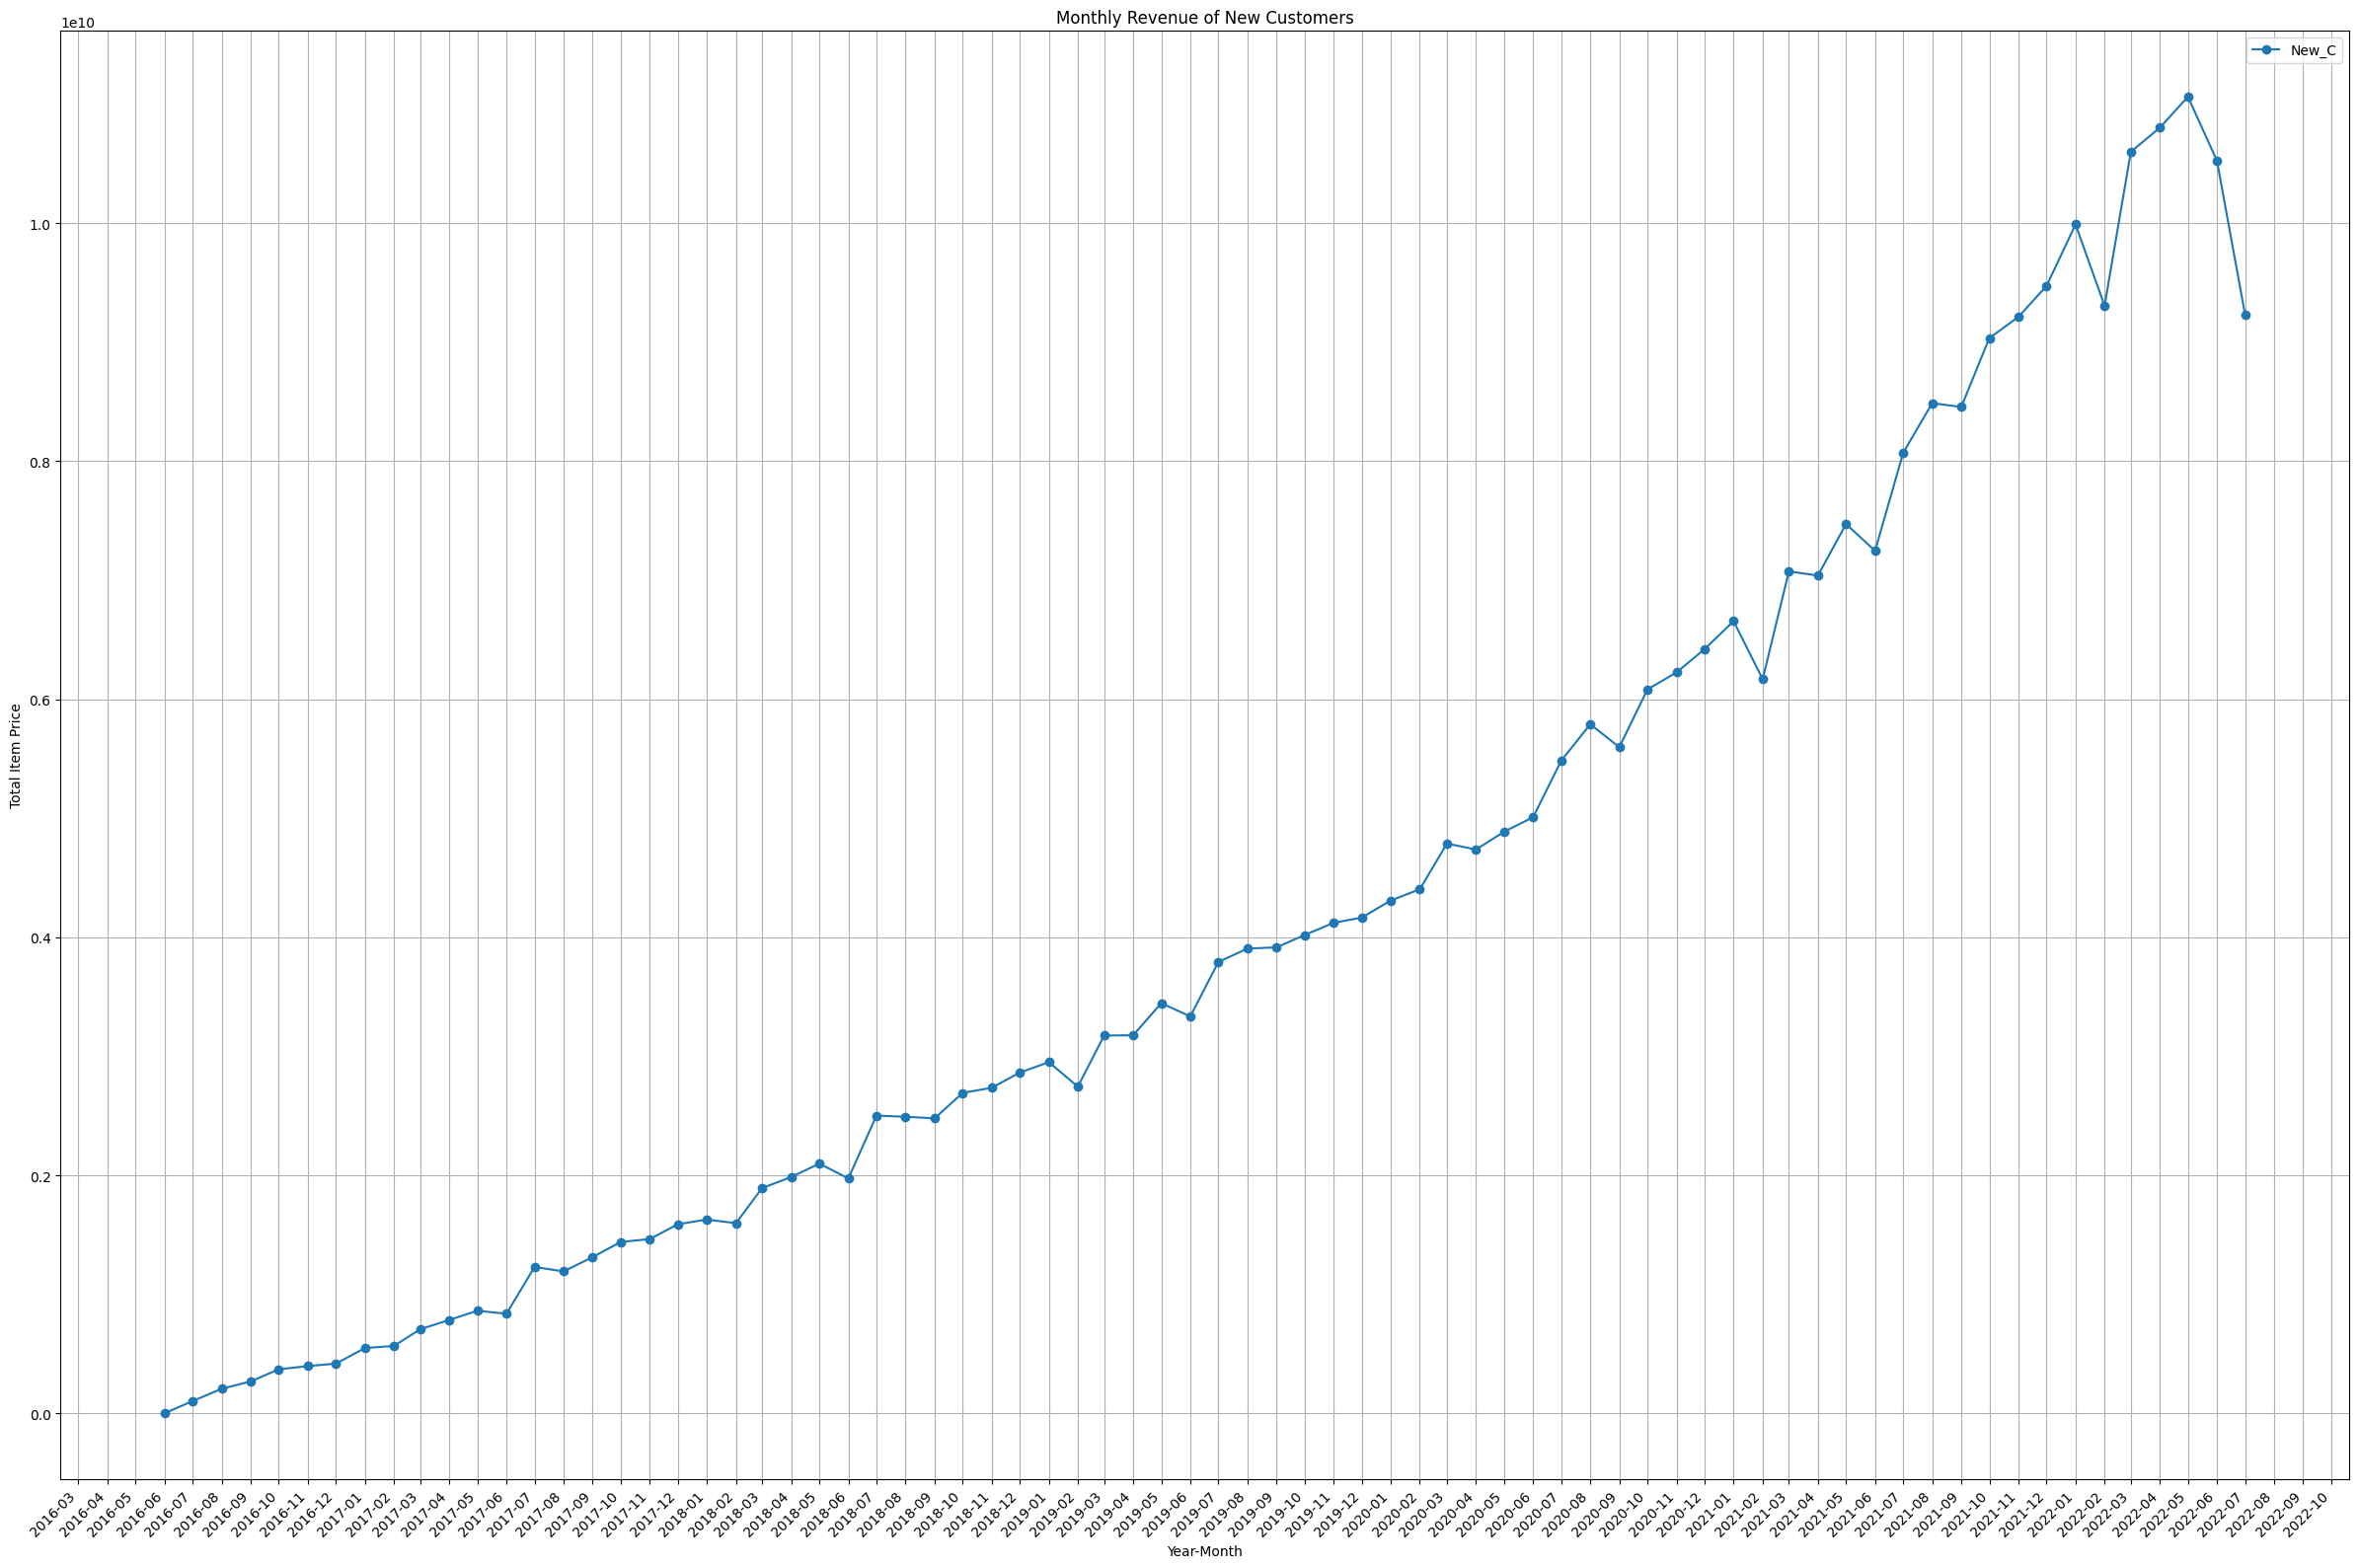

In [16]:
# Group by 'order_date' and sum 'item_price'
grouped_data = df_ct_merged.groupby('order_date')['item_price'].sum()

# Plotting
plt.figure(figsize=(24, 16))

plt.plot(grouped_data.index, grouped_data.values, marker='o', label='New_C')

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.xlabel('Year-Month')
plt.ylabel('Total Item Price')
plt.title('Monthly Revenue of New Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
selected_columns1 = ['customer_id', 'first_join_date']
df_selected_customer = df_customer[selected_columns1]

selected_columns2 = ['customer_id', 'session_id', 'total_amount']
df_selected_transaction_new = df_transaction_new[selected_columns2]

# 세션 데이터와 거래 데이터를 세션 ID로 합칩니다.
df_merged = df_click_stream_new.merge(df_selected_transaction_new, on='session_id', how='left')

# 합친 데이터에 고객 데이터를 고객 ID로 합칩니다.
df_final = df_merged.merge(df_selected_customer, on='customer_id', how='left')

In [22]:
# customer_id가 NaN인 데이터 추출하여 새로운 데이터프레임 생성
df_no_customer = df_final[df_final['customer_id'].isna()]

# customer_id가 NaN인 데이터를 df_final에서 제거
df_final_customer = df_final.dropna(subset=['customer_id'])

In [23]:
df_no_customer = df_no_customer.reset_index(drop=True)

In [24]:
df_final_customer = df_final_customer.reset_index(drop=True)

In [25]:
df_no_customer

session_id click_date  customer_id  \
0      fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c 2019-09-06          NaN   
1      ff04523c-e029-4194-8f6f-bd322057bc72 2017-03-07          NaN   
2      ff04523c-e029-4194-8f6f-bd322057bc72 2017-03-07          NaN   
3      ff04523c-e029-4194-8f6f-bd322057bc72 2017-03-07          NaN   
4      ff04523c-e029-4194-8f6f-bd322057bc72 2017-03-07          NaN   
...                                     ...        ...          ...   
80977  5a177399-8fda-481e-91e5-cba24a6e63d8 2021-12-15          NaN   
80978  4a3a58c6-4ff5-417d-9d80-e1a9a2fd7cf9 2021-09-04          NaN   
80979  2f51f07f-2b5e-49da-bbd6-5ca6c193418b 2021-04-29          NaN   
80980  2f51f07f-2b5e-49da-bbd6-5ca6c193418b 2021-04-29          NaN   
80981  9790b1e5-20ea-45bb-af1c-990d939145fb 2017-01-17          NaN   

       total_amount first_join_date  
0               NaN             NaT  
1               NaN             NaT  
2               NaN             NaT  
3               NaN             NaT  
4               NaN             NaT  
...             ...             ...  
80977           NaN             NaT  
80978           NaN             NaT  
80979           NaN             NaT  
80980           NaN             NaT  
80981           NaN             NaT  

[80982 rows x 5 columns]

In [36]:
df_final_customer.duplicated().sum()

1915987

In [26]:
df_final_customer

session_id click_date  customer_id  \
0        7d440441-e67a-4d36-b324-80ffd636d166 2019-09-01      18770.0   
1        7d440441-e67a-4d36-b324-80ffd636d166 2019-09-01      18770.0   
2        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2 2019-09-09      18770.0   
3        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2 2019-09-09      18770.0   
4        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2 2019-09-09      18770.0   
...                                       ...        ...          ...   
3569284  f38416ce-51f2-46b0-a476-776d8fed1cb0 2021-08-01      82032.0   
3569285  c1ce86f6-858b-4009-af5b-f1483a28d020 2020-09-22      42455.0   
3569286  f5c4bbe0-f977-45bb-af23-6ab524df7777 2022-04-09      64875.0   
3569287  ad1063b0-a6e5-40a9-aed6-d1b45741e571 2021-06-07      44381.0   
3569288  64585e37-3fe7-48d7-b79b-ebcb70230eb2 2021-05-05      83906.0   

         total_amount first_join_date  
0           1254116.0      2019-08-31  
1           1254116.0      2019-08-31  
2           2062833.0      2019-08-31  
3           2062833.0      2019-08-31  
4           2062833.0      2019-08-31  
...               ...             ...  
3569284      292771.0      2021-08-01  
3569285      216365.0      2020-09-20  
3569286      208644.0      2022-04-09  
3569287      294949.0      2021-06-06  
3569288       98918.0      2021-05-02  

[3569289 rows x 5 columns]

In [27]:
df_final_customer2 = df_final_customer.drop_duplicates().reset_index(drop=True)

session_id click_date  customer_id  \
0        7d440441-e67a-4d36-b324-80ffd636d166 2019-09-01      18770.0   
1        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2 2019-09-09      18770.0   
2        b2843a94-248f-429e-bd54-1a456b4ef4a7 2019-09-15      18770.0   
3        d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9 2019-09-23      18770.0   
4        98e66f53-f24f-4238-8c9c-34a0482e22d5 2019-10-02      18770.0   
...                                       ...        ...          ...   
1653297  f38416ce-51f2-46b0-a476-776d8fed1cb0 2021-08-01      82032.0   
1653298  c1ce86f6-858b-4009-af5b-f1483a28d020 2020-09-22      42455.0   
1653299  f5c4bbe0-f977-45bb-af23-6ab524df7777 2022-04-09      64875.0   
1653300  ad1063b0-a6e5-40a9-aed6-d1b45741e571 2021-06-07      44381.0   
1653301  64585e37-3fe7-48d7-b79b-ebcb70230eb2 2021-05-05      83906.0   

         total_amount first_join_date  
0           1254116.0      2019-08-31  
1           2062833.0      2019-08-31  
2            521501.0      2019-08-31  
3           1506117.0      2019-08-31  
4            265140.0      2019-08-31  
...               ...             ...  
1653297      292771.0      2021-08-01  
1653298      216365.0      2020-09-20  
1653299      208644.0      2022-04-09  
1653300      294949.0      2021-06-06  
1653301       98918.0      2021-05-02  

[1653302 rows x 5 columns]

In [46]:
df_final_customer2.customer_id.value_counts()

43202.0    905
82237.0    819
10167.0    756
38588.0    695
39915.0    687
          ... 
43834.0      1
35081.0      1
76441.0      1
8610.0       1
83906.0      1
Name: customer_id, Length: 50704, dtype: int64

In [57]:
df_final_customer2

session_id click_date  customer_id  \
0        7d440441-e67a-4d36-b324-80ffd636d166 2019-09-01      18770.0   
1        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2 2019-09-09      18770.0   
2        b2843a94-248f-429e-bd54-1a456b4ef4a7 2019-09-15      18770.0   
3        d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9 2019-09-23      18770.0   
4        98e66f53-f24f-4238-8c9c-34a0482e22d5 2019-10-02      18770.0   
...                                       ...        ...          ...   
1653297  f38416ce-51f2-46b0-a476-776d8fed1cb0 2021-08-01      82032.0   
1653298  c1ce86f6-858b-4009-af5b-f1483a28d020 2020-09-22      42455.0   
1653299  f5c4bbe0-f977-45bb-af23-6ab524df7777 2022-04-09      64875.0   
1653300  ad1063b0-a6e5-40a9-aed6-d1b45741e571 2021-06-07      44381.0   
1653301  64585e37-3fe7-48d7-b79b-ebcb70230eb2 2021-05-05      83906.0   

         total_amount first_join_date  
0           1254116.0      2019-08-31  
1           2062833.0      2019-08-31  
2            521501.0      2019-08-31  
3           1506117.0      2019-08-31  
4            265140.0      2019-08-31  
...               ...             ...  
1653297      292771.0      2021-08-01  
1653298      216365.0      2020-09-20  
1653299      208644.0      2022-04-09  
1653300      294949.0      2021-06-06  
1653301       98918.0      2021-05-02  

[1653302 rows x 5 columns]

In [28]:
df_final_customer2["click_period"] = df_final_customer2["click_date"].dt.strftime("%Y-%m")

In [29]:
# 유저의 첫번째 주문을 토대로 유저별 코호트 그룹 설정하기

df_final_customer2.set_index("customer_id", inplace=True)
FirstOrder = df_final_customer2.groupby(df_final_customer2.index)["click_date"].min()
FirstOrder = FirstOrder.dt.strftime("%Y-%m")
df_final_customer2["FirstOrder"] = FirstOrder
df_final_customer2.reset_index(inplace=True)

grouped = df_final_customer2.groupby(["FirstOrder", "click_period"])

cohorts = grouped["customer_id"].nunique()
cohorts = cohorts.reset_index()
cohorts.head()

FirstOrder click_period  customer_id
0    2016-06      2016-06            1
1    2016-06      2017-09            1
2    2016-06      2018-09            1
3    2016-06      2018-10            1
4    2016-06      2018-11            1

In [30]:
cohorts.rename({"customer_id": "TotalUsers"}, axis=1, inplace=True)
cohorts.head()

FirstOrder click_period  TotalUsers
0    2016-06      2016-06           1
1    2016-06      2017-09           1
2    2016-06      2018-09           1
3    2016-06      2018-10           1
4    2016-06      2018-11           1

In [31]:
cohorts

FirstOrder click_period  TotalUsers
0       2016-06      2016-06           1
1       2016-06      2017-09           1
2       2016-06      2018-09           1
3       2016-06      2018-10           1
4       2016-06      2018-11           1
...         ...          ...         ...
2706    2022-06      2022-06         776
2707    2022-06      2022-07         544
2708    2022-06      2022-08           1
2709    2022-07      2022-07        1004
2710    2022-07      2022-08           3

[2711 rows x 3 columns]

In [32]:
each_period = cohorts["FirstOrder"].value_counts().sort_index()
# 기간별 레이블 붙이기
cohortperiod = []

for x in each_period:
    for y in range(x):
        cohortperiod.append(y)

In [33]:
cohorts["CohortPeriod"] = cohortperiod
cohorts.set_index(["FirstOrder", "CohortPeriod"], inplace=True)

cohorts = cohorts["TotalUsers"].unstack(1)
cohorts.head()

CohortPeriod     0      1      2      3      4      5      6      7      8   \
FirstOrder                                                                    
2016-06         1.0    1.0    1.0    1.0    1.0    1.0    1.0    NaN    NaN   
2016-07       281.0   59.0   76.0   87.0   78.0   82.0   94.0   80.0   80.0   
2016-08       438.0  126.0  148.0  153.0  156.0  156.0  137.0  156.0  149.0   
2016-09       453.0  123.0  129.0  134.0  161.0  132.0  141.0  140.0  148.0   
2016-10       536.0  148.0  182.0  184.0  174.0  170.0  190.0  177.0  188.0   

CohortPeriod     9   ...     63     64     65     66     67     68     69  \
FirstOrder           ...                                                    
2016-06         NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2016-07        74.0  ...   82.0   68.0   80.0   77.0   66.0   71.0   64.0   
2016-08       168.0  ...  158.0  151.0  145.0  141.0  146.0  140.0  128.0   
2016-09       159.0  ...  155.0  133.0  139.0  124.0  128.0  119.0   84.0   
2016-10       185.0  ...  170.0  162.0  158.0  156.0  153.0   98.0   51.0   

CohortPeriod     70    71    72  
FirstOrder                       
2016-06         NaN   NaN   NaN  
2016-07        65.0  39.0  21.0  
2016-08       100.0  45.0   NaN  
2016-09        36.0   NaN   NaN  
2016-10         NaN   NaN   NaN  

[5 rows x 73 columns]

In [34]:
user_retention = cohorts.divide(cohorts[0], axis=0)
user_retention

CohortPeriod   0         1         2         3         4         5         6   \
FirstOrder                                                                      
2016-06       1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2016-07       1.0  0.209964  0.270463  0.309609  0.277580  0.291815  0.334520   
2016-08       1.0  0.287671  0.337900  0.349315  0.356164  0.356164  0.312785   
2016-09       1.0  0.271523  0.284768  0.295806  0.355408  0.291391  0.311258   
2016-10       1.0  0.276119  0.339552  0.343284  0.324627  0.317164  0.354478   
...           ...       ...       ...       ...       ...       ...       ...   
2022-03       1.0  0.611738  0.645598  0.560948  0.418736       NaN       NaN   
2022-04       1.0  0.634174  0.614679  0.432339       NaN       NaN       NaN   
2022-05       1.0  0.532300  0.312661       NaN       NaN       NaN       NaN   
2022-06       1.0  0.701031  0.001289       NaN       NaN       NaN       NaN   
2022-07       1.0  0.002988       NaN       NaN       NaN       NaN       NaN   

CohortPeriod        7         8         9   ...        63        64        65  \
FirstOrder                                  ...                                 
2016-06            NaN       NaN       NaN  ...       NaN       NaN       NaN   
2016-07       0.284698  0.284698  0.263345  ...  0.291815  0.241993  0.284698   
2016-08       0.356164  0.340183  0.383562  ...  0.360731  0.344749  0.331050   
2016-09       0.309051  0.326711  0.350993  ...  0.342163  0.293598  0.306843   
2016-10       0.330224  0.350746  0.345149  ...  0.317164  0.302239  0.294776   
...                ...       ...       ...  ...       ...       ...       ...   
2022-03            NaN       NaN       NaN  ...       NaN       NaN       NaN   
2022-04            NaN       NaN       NaN  ...       NaN       NaN       NaN   
2022-05            NaN       NaN       NaN  ...       NaN       NaN       NaN   
2022-06            NaN       NaN       NaN  ...       NaN       NaN       NaN   
2022-07            NaN       NaN       NaN  ...       NaN       NaN       NaN   

CohortPeriod        66        67        68        69        70       71  \
FirstOrder                                                                
2016-06            NaN       NaN       NaN       NaN       NaN      NaN   
2016-07       0.274021  0.234875  0.252669  0.227758  0.231317  0.13879   
2016-08       0.321918  0.333333  0.319635  0.292237  0.228311  0.10274   
2016-09       0.273731  0.282561  0.262693  0.185430  0.079470      NaN   
2016-10       0.291045  0.285448  0.182836  0.095149       NaN      NaN   
...                ...       ...       ...       ...       ...      ...   
2022-03            NaN       NaN       NaN       NaN       NaN      NaN   
2022-04            NaN       NaN       NaN       NaN       NaN      NaN   
2022-05            NaN       NaN       NaN       NaN       NaN      NaN   
2022-06            NaN       NaN       NaN       NaN       NaN      NaN   
2022-07            NaN       NaN       NaN       NaN       NaN      NaN   

CohortPeriod        72  
FirstOrder              
2016-06            NaN  
2016-07       0.074733  
2016-08            NaN  
2016-09            NaN  
2016-10            NaN  
...                ...  
2022-03            NaN  
2022-04            NaN  
2022-05            NaN  
2022-06            NaN  
2022-07            NaN  

[74 rows x 73 columns]

In [72]:
user_retention

CohortPeriod   0         1         2         3         4         5         6   \
FirstOrder                                                                      
2016-06       1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2016-07       1.0  0.209964  0.270463  0.309609  0.277580  0.291815  0.334520   
2016-08       1.0  0.287671  0.337900  0.349315  0.356164  0.356164  0.312785   
2016-09       1.0  0.271523  0.284768  0.295806  0.355408  0.291391  0.311258   
2016-10       1.0  0.276119  0.339552  0.343284  0.324627  0.317164  0.354478   
...           ...       ...       ...       ...       ...       ...       ...   
2022-03       1.0  0.611738  0.645598  0.560948  0.418736       NaN       NaN   
2022-04       1.0  0.634174  0.614679  0.432339       NaN       NaN       NaN   
2022-05       1.0  0.532300  0.312661       NaN       NaN       NaN       NaN   
2022-06       1.0  0.701031  0.001289       NaN       NaN       NaN       NaN   
2022-07       1.0  0.002988       NaN       NaN       NaN       NaN       NaN   

CohortPeriod        7         8         9   ...        63        64        65  \
FirstOrder                                  ...                                 
2016-06            NaN       NaN       NaN  ...       NaN       NaN       NaN   
2016-07       0.284698  0.284698  0.263345  ...  0.291815  0.241993  0.284698   
2016-08       0.356164  0.340183  0.383562  ...  0.360731  0.344749  0.331050   
2016-09       0.309051  0.326711  0.350993  ...  0.342163  0.293598  0.306843   
2016-10       0.330224  0.350746  0.345149  ...  0.317164  0.302239  0.294776   
...                ...       ...       ...  ...       ...       ...       ...   
2022-03            NaN       NaN       NaN  ...       NaN       NaN       NaN   
2022-04            NaN       NaN       NaN  ...       NaN       NaN       NaN   
2022-05            NaN       NaN       NaN  ...       NaN       NaN       NaN   
2022-06            NaN       NaN       NaN  ...       NaN       NaN       NaN   
2022-07            NaN       NaN       NaN  ...       NaN       NaN       NaN   

CohortPeriod        66        67        68        69        70       71  \
FirstOrder                                                                
2016-06            NaN       NaN       NaN       NaN       NaN      NaN   
2016-07       0.274021  0.234875  0.252669  0.227758  0.231317  0.13879   
2016-08       0.321918  0.333333  0.319635  0.292237  0.228311  0.10274   
2016-09       0.273731  0.282561  0.262693  0.185430  0.079470      NaN   
2016-10       0.291045  0.285448  0.182836  0.095149       NaN      NaN   
...                ...       ...       ...       ...       ...      ...   
2022-03            NaN       NaN       NaN       NaN       NaN      NaN   
2022-04            NaN       NaN       NaN       NaN       NaN      NaN   
2022-05            NaN       NaN       NaN       NaN       NaN      NaN   
2022-06            NaN       NaN       NaN       NaN       NaN      NaN   
2022-07            NaN       NaN       NaN       NaN       NaN      NaN   

CohortPeriod        72  
FirstOrder              
2016-06            NaN  
2016-07       0.074733  
2016-08            NaN  
2016-09            NaN  
2016-10            NaN  
...                ...  
2022-03            NaN  
2022-04            NaN  
2022-05            NaN  
2022-06            NaN  
2022-07            NaN  

[74 rows x 73 columns]

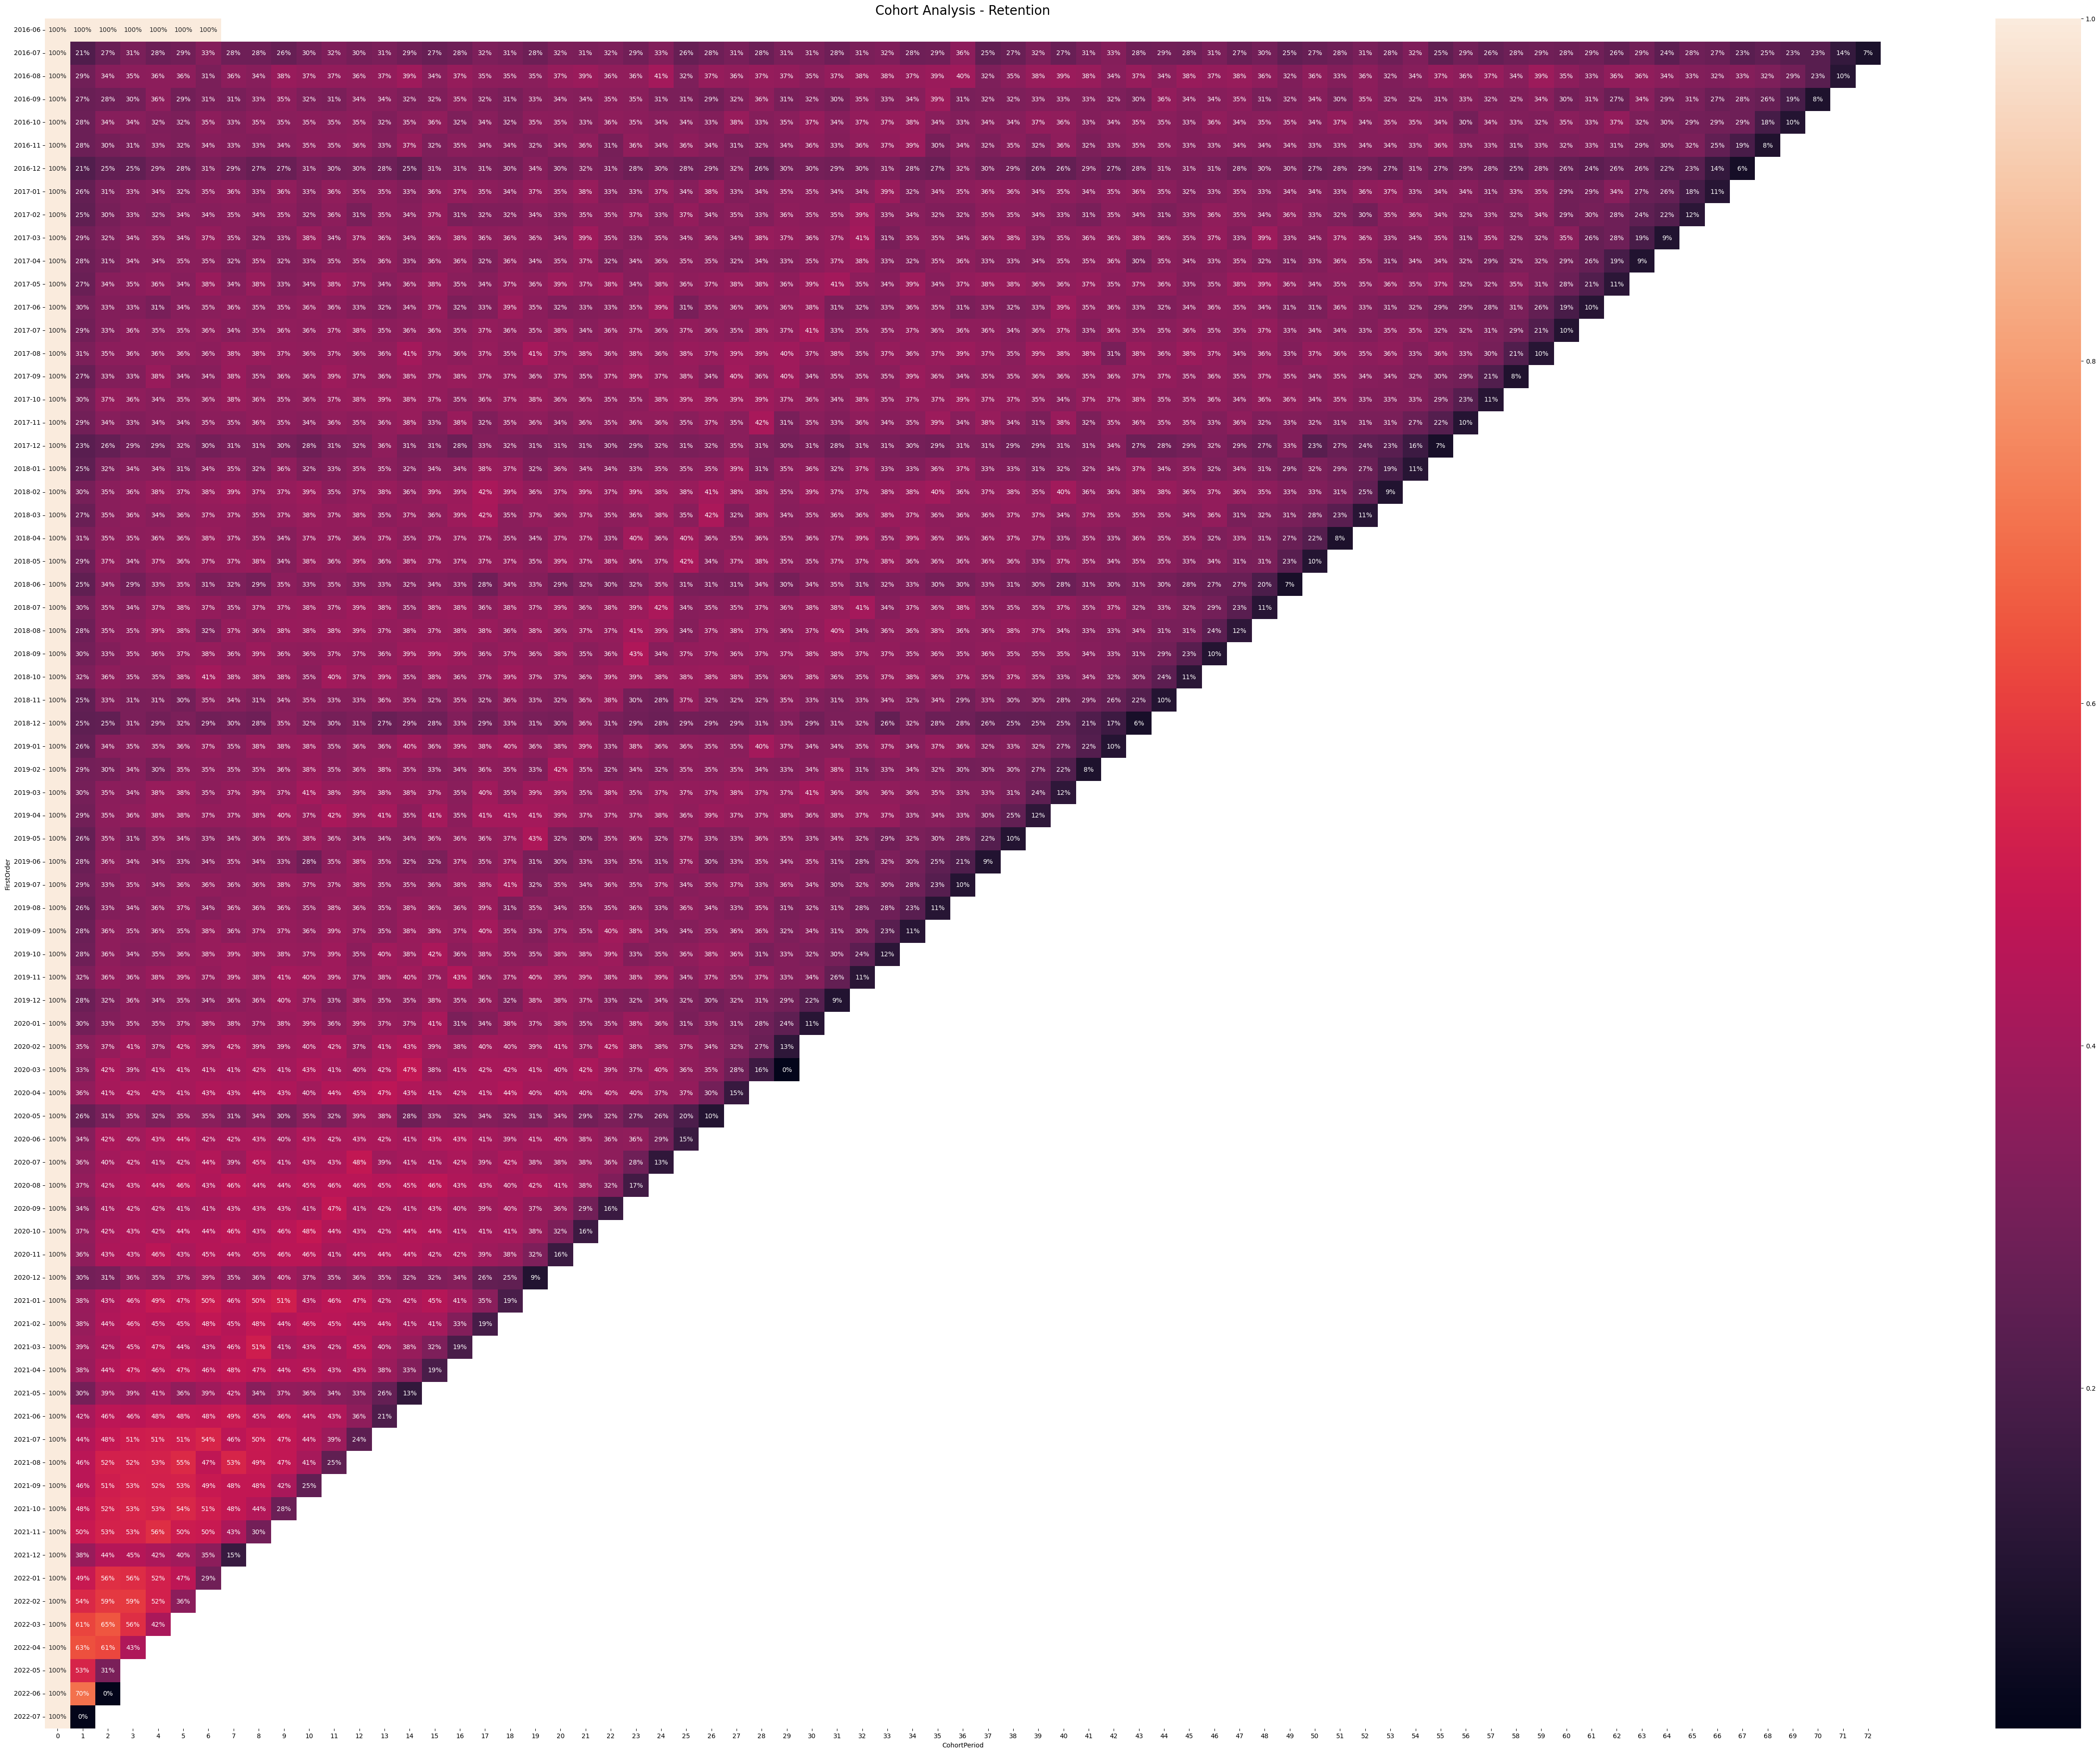

In [35]:
#  시각화
plt.figure(figsize=(64, 48))
plt.title("Cohort Analysis - Retention", fontsize=20)

# 한글패치는 미리미리 ~
sns.heatmap(user_retention, annot=True, fmt=".0%")
plt.show()

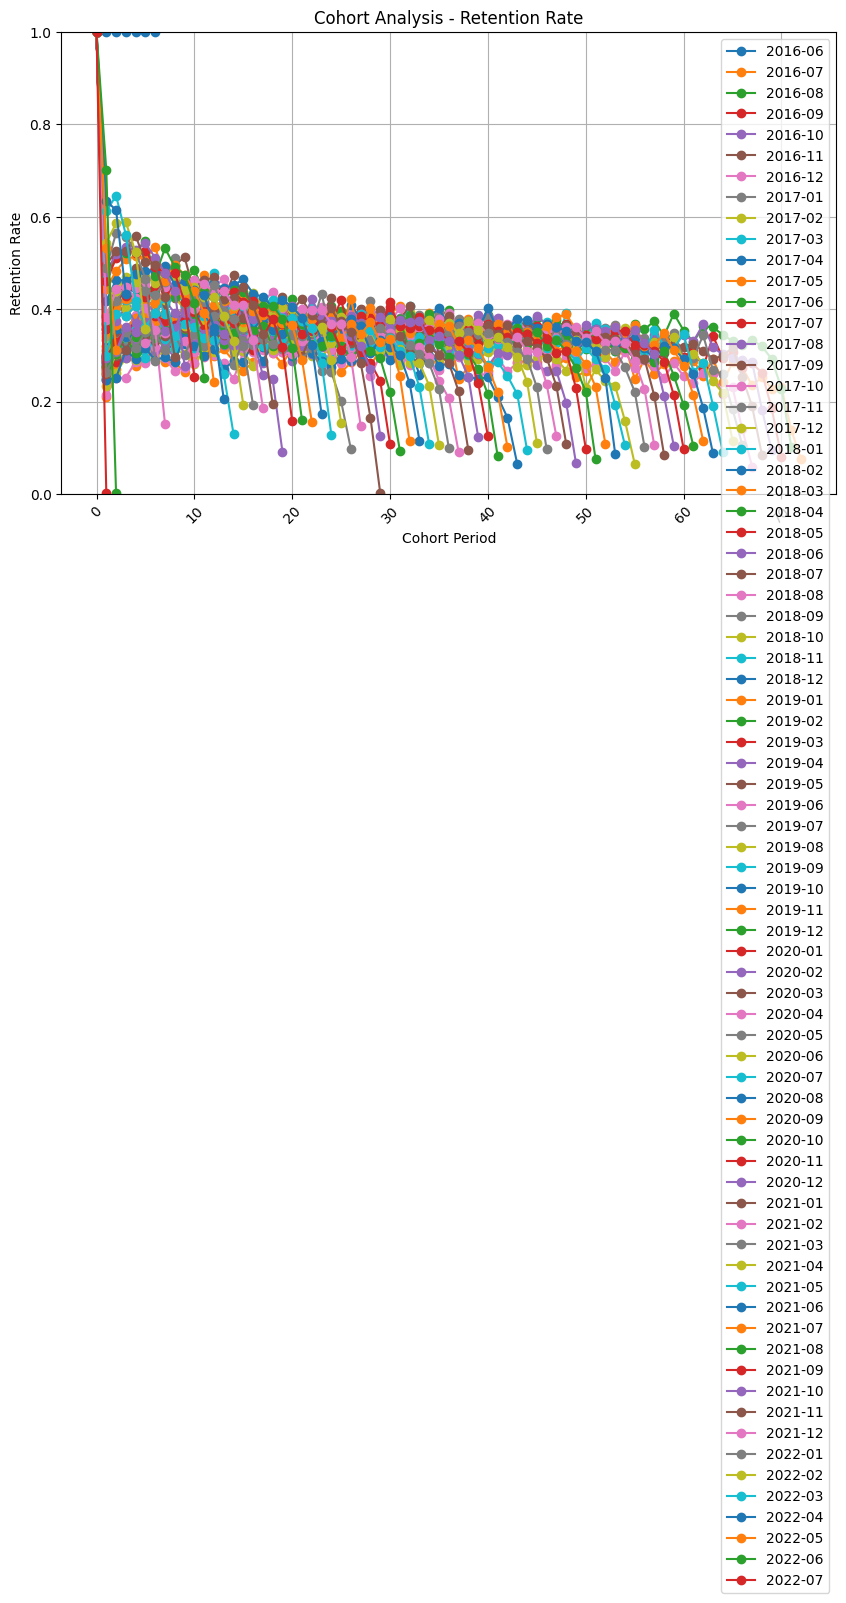

In [74]:
import matplotlib.pyplot as plt

# 모든 코호트 그룹의 리텐션 시각화 함수
def plot_all_cohort_retention(retention_data):
    plt.figure(figsize=(10, 6))

    for cohort_label, retention_values in retention_data.iterrows():
        plt.plot(retention_values.index, retention_values.values, marker='o', label=cohort_label)

    plt.xlabel('Cohort Period')
    plt.ylabel('Retention Rate')
    plt.title('Cohort Analysis - Retention Rate')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 모든 코호트 그룹의 리텐션 시각화
plot_all_cohort_retention(user_retention)

In [32]:
rfm_df_click_stream

session_id  product_id  quantity  \
0        7d440441-e67a-4d36-b324-80ffd636d166     15315.0       4.0   
1        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      6133.0       2.0   
2        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      6721.0       1.0   
3        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2     57622.0       1.0   
4        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      5490.0       1.0   
...                                       ...         ...       ...   
1894526  f38416ce-51f2-46b0-a476-776d8fed1cb0      4869.0       1.0   
1894527  c1ce86f6-858b-4009-af5b-f1483a28d020     25127.0       1.0   
1894528  f5c4bbe0-f977-45bb-af23-6ab524df7777     19386.0       1.0   
1894529  ad1063b0-a6e5-40a9-aed6-d1b45741e571     13143.0       1.0   
1894530  64585e37-3fe7-48d7-b79b-ebcb70230eb2     19820.0       1.0   

         item_price promo_code  promo_amount click_date  
0          313529.0        NaN           NaN 2019-09-01  
1          249443.0     AZ2022        7047.0 2019-09-09  
2          134504.0     AZ2022        7047.0 2019-09-09  
3          384716.0     AZ2022        7047.0 2019-09-09  
4          121318.0     AZ2022        7047.0 2019-09-09  
...             ...        ...           ...        ...  
1894526    282771.0        NaN           NaN 2021-08-01  
1894527    166365.0        NaN           NaN 2020-09-22  
1894528    208644.0        NaN           NaN 2022-04-09  
1894529    284949.0        NaN           NaN 2021-06-07  
1894530     88918.0        NaN           NaN 2021-05-05  

[1894531 rows x 7 columns]

In [33]:
selected_columns1 = ['customer_id', 'first_join_date']
df_selected_customer = df_customer[selected_columns1]

selected_columns2 = ['customer_id', 'session_id', 'total_amount']
df_selected_transaction_new = df_transaction_new[selected_columns2]

# 세션 데이터와 거래 데이터를 세션 ID로 합칩니다.
df_merged = rfm_df_click_stream.merge(df_selected_transaction_new, on='session_id', how='left')

# 합친 데이터에 고객 데이터를 고객 ID로 합칩니다.
df_final = df_merged.merge(df_selected_customer, on='customer_id', how='left')

In [34]:
df_final

session_id  product_id  quantity  \
0        7d440441-e67a-4d36-b324-80ffd636d166     15315.0       4.0   
1        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      6133.0       2.0   
2        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      6133.0       2.0   
3        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      6133.0       2.0   
4        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      6133.0       2.0   
...                                       ...         ...       ...   
4961377  f38416ce-51f2-46b0-a476-776d8fed1cb0      4869.0       1.0   
4961378  c1ce86f6-858b-4009-af5b-f1483a28d020     25127.0       1.0   
4961379  f5c4bbe0-f977-45bb-af23-6ab524df7777     19386.0       1.0   
4961380  ad1063b0-a6e5-40a9-aed6-d1b45741e571     13143.0       1.0   
4961381  64585e37-3fe7-48d7-b79b-ebcb70230eb2     19820.0       1.0   

         item_price promo_code  promo_amount click_date  customer_id  \
0          313529.0        NaN           NaN 2019-09-01        18770   
1          249443.0     AZ2022        7047.0 2019-09-09        18770   
2          249443.0     AZ2022        7047.0 2019-09-09        18770   
3          249443.0     AZ2022        7047.0 2019-09-09        18770   
4          249443.0     AZ2022        7047.0 2019-09-09        18770   
...             ...        ...           ...        ...          ...   
4961377    282771.0        NaN           NaN 2021-08-01        82032   
4961378    166365.0        NaN           NaN 2020-09-22        42455   
4961379    208644.0        NaN           NaN 2022-04-09        64875   
4961380    284949.0        NaN           NaN 2021-06-07        44381   
4961381     88918.0        NaN           NaN 2021-05-05        83906   

         total_amount first_join_date  
0             1254116      2019-08-31  
1             2062833      2019-08-31  
2             2062833      2019-08-31  
3             2062833      2019-08-31  
4             2062833      2019-08-31  
...               ...             ...  
4961377        292771      2021-08-01  
4961378        216365      2020-09-20  
4961379        208644      2022-04-09  
4961380        294949      2021-06-06  
4961381         98918      2021-05-02  

[4961382 rows x 10 columns]

In [37]:
# Recency 계산: 고객별 가장 최근 주문일자를 찾습니다.
recency_df = df_final.groupby('customer_id')['click_date'].max().reset_index()
recency_df['Recency'] = (pd.to_datetime('2022-07-31') - recency_df['click_date']).dt.days

# Frequency 계산: 고객별 주문 횟수를 세어줍니다.
frequency_df = df_final.groupby('customer_id')['session_id'].nunique().reset_index()
frequency_df.rename(columns={'session_id': 'Frequency'}, inplace=True)

# Monetary 계산: 고객별 주문 금액의 합을 구합니다.
monetary_df = df_final.groupby('customer_id')['total_amount'].sum().reset_index()
monetary_df.rename(columns={'total_amount': 'Monetary'}, inplace=True)

# customer_id와 first_join_date 정보를 유지한 새로운 데이터프레임 생성
rfm_df = recency_df.merge(frequency_df, on='customer_id').merge(monetary_df, on='customer_id')
rfm_df = rfm_df.merge(df_final[['customer_id', 'first_join_date']], on='customer_id')

In [40]:
rfm_df = rfm_df.drop_duplicates().reset_index(drop=True)

In [41]:
rfm_df

customer_id click_date  Recency  Frequency    Monetary first_join_date
0                3 2022-06-20       41         51   233745623      2018-08-25
1                8 2022-05-07       85          7    12080746      2021-02-13
2                9 2022-05-24       68          6    14411450      2021-06-26
3               11 2022-03-07      146          1      790132      2022-03-06
4               15 2021-12-12      231          5    36521548      2019-09-28
...            ...        ...      ...        ...         ...             ...
50699        99992 2022-05-24       68         12    85703956      2020-06-30
50700        99995 2022-07-28        3         60   160584087      2020-08-16
50701        99997 2020-04-25      827          1      905844      2020-04-25
50702        99998 2022-01-11      201          8  1225278556      2018-07-01
50703        99999 2016-10-12     2118          1     2353332      2016-10-12

[50704 rows x 6 columns]

랭크	R	F	M

5	90일 이내	20회 이상	5000달러 이상

4	180일 이내	13회 이상	2000달러 이상

3	365일 이내	7회 이상	800달러 이상

2	730일 이내	2회 이상	300달러 이상

1	730일 이상	1회 이상	300달러 미만

위의 기준으로 점수를 매김

In [58]:
# Recency Score 계산
rfm_df['Recency_Score'] = pd.cut(rfm_df['Recency'], bins=[-float('inf'), 90, 180, 365, 730, float('inf')], labels=[5, 4, 3, 2, 1])

# Frequency Score 계산
rfm_df['Frequency_Score'] = pd.cut(rfm_df['Frequency'], bins=[-float('inf'), 2, 7, 13, 20, float('inf')], labels=[1, 2, 3, 4, 5])
# Monetary Score 계산
rfm_df['Monetary_Score'] = pd.cut(rfm_df['Monetary'], bins=[-float('inf'), 4591290.93, 12243442.49, 30608606.22, 76521515.55, float('inf')], labels=[1, 2, 3, 4, 5])

In [64]:
rfm_df

customer_id click_date  Recency  Frequency    Monetary first_join_date  \
0                3 2022-06-20       41         51   233745623      2018-08-25   
1                8 2022-05-07       85          7    12080746      2021-02-13   
2                9 2022-05-24       68          6    14411450      2021-06-26   
3               11 2022-03-07      146          1      790132      2022-03-06   
4               15 2021-12-12      231          5    36521548      2019-09-28   
...            ...        ...      ...        ...         ...             ...   
50699        99992 2022-05-24       68         12    85703956      2020-06-30   
50700        99995 2022-07-28        3         60   160584087      2020-08-16   
50701        99997 2020-04-25      827          1      905844      2020-04-25   
50702        99998 2022-01-11      201          8  1225278556      2018-07-01   
50703        99999 2016-10-12     2118          1     2353332      2016-10-12   

      Recency_Score Frequency_Score Monetary_Score  
0                 5               5              5  
1                 5               2              2  
2                 5               2              3  
3                 4               1              1  
4                 3               2              4  
...             ...             ...            ...  
50699             5               3              5  
50700             5               5              5  
50701             1               1              1  
50702             3               3              5  
50703             1               1              1  

[50704 rows x 9 columns]

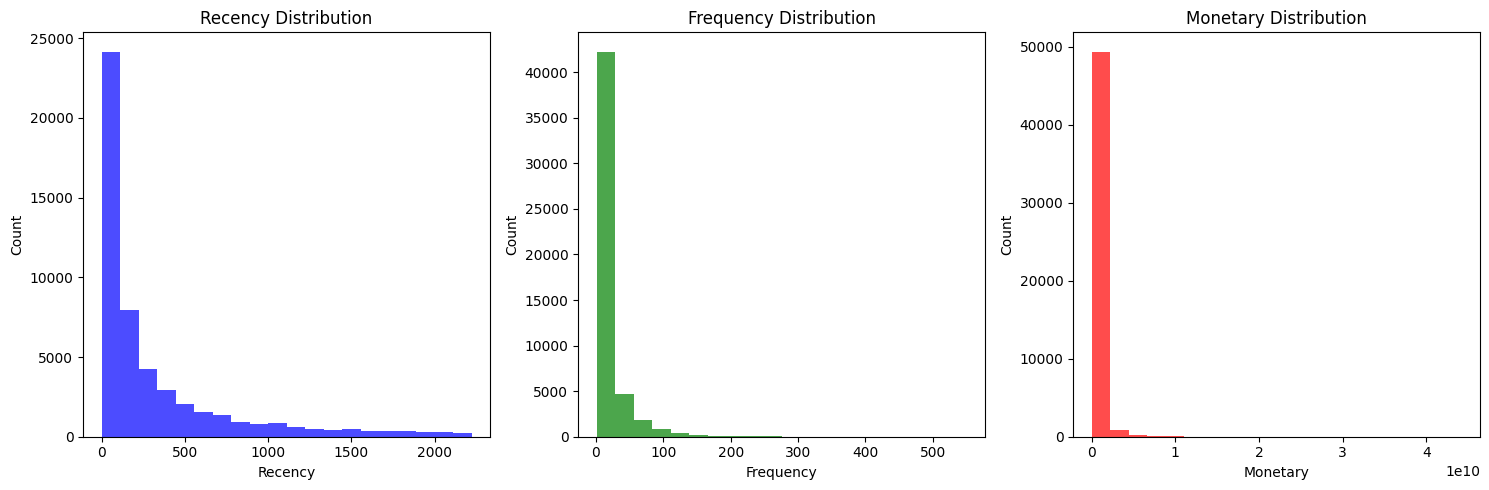

In [42]:
# 시각화
plt.figure(figsize=(15, 5))

# Recency 시각화
plt.subplot(1, 3, 1)
plt.hist(rfm_df['Recency'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Recency')
plt.ylabel('Count')
plt.title('Recency Distribution')

# Frequency 시각화
plt.subplot(1, 3, 2)
plt.hist(rfm_df['Frequency'], bins=20, color='green', alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Frequency Distribution')

# Monetary 시각화
plt.subplot(1, 3, 3)
plt.hist(rfm_df['Monetary'], bins=20, color='red', alpha=0.7)
plt.xlabel('Monetary')
plt.ylabel('Count')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

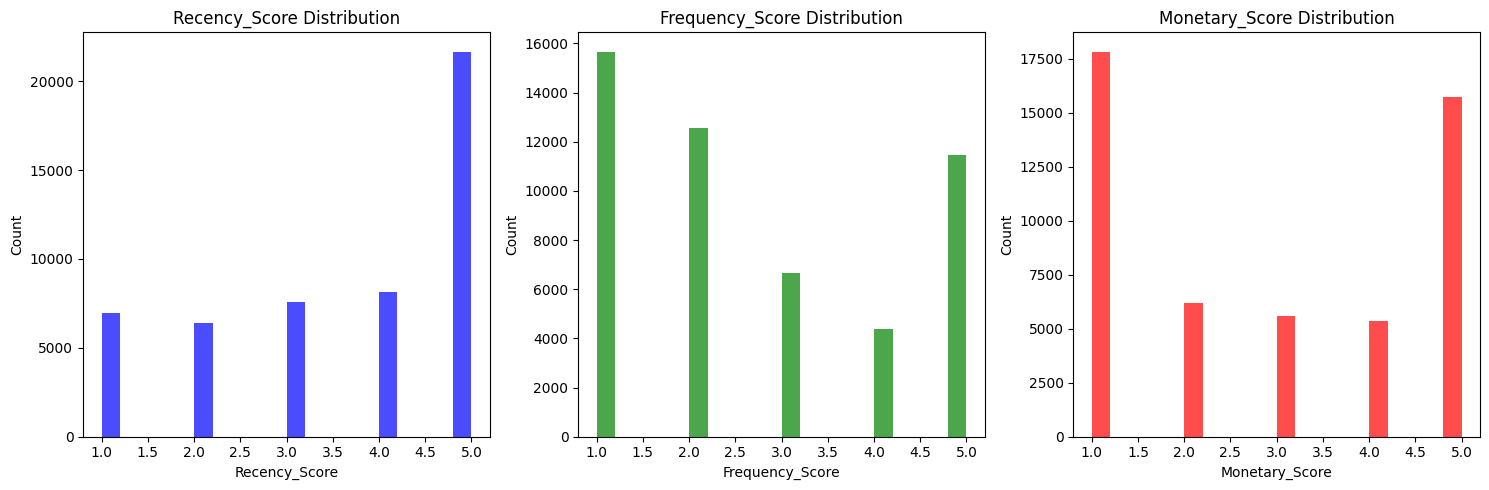

In [60]:
# 시각화
plt.figure(figsize=(15, 5))

# Recency_Score 시각화
plt.subplot(1, 3, 1)
plt.hist(rfm_df['Recency_Score'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Recency_Score')
plt.ylabel('Count')
plt.title('Recency_Score Distribution')

# Frequency_Score 시각화
plt.subplot(1, 3, 2)
plt.hist(rfm_df['Frequency_Score'], bins=20, color='green', alpha=0.7)
plt.xlabel('Frequency_Score')
plt.ylabel('Count')
plt.title('Frequency_Score Distribution')

# Monetary_Score 시각화
plt.subplot(1, 3, 3)
plt.hist(rfm_df['Monetary_Score'], bins=20, color='red', alpha=0.7)
plt.xlabel('Monetary_Score')
plt.ylabel('Count')
plt.title('Monetary_Score Distribution')

plt.tight_layout()
plt.show()

팀원들과 논의한 결과 보통 개인정보 관리를 위해 1년간 접속 되지 않은 계정은 휴면 상태로 분리되기 때문에 최근에 주문한 기록이 1년이 넘어가는 고객들을 이탈 고객으로 설정

주문을 하지 않고 방문만 하는 고객의 경우 구경만 하거나 가격 비교를 위해 들어와서 결제는 다른사이트에서 하는 것으로 생각 되며 이경우 꾸준히 접속해도 이탈 고객으로 봐야 되겠다고 생각

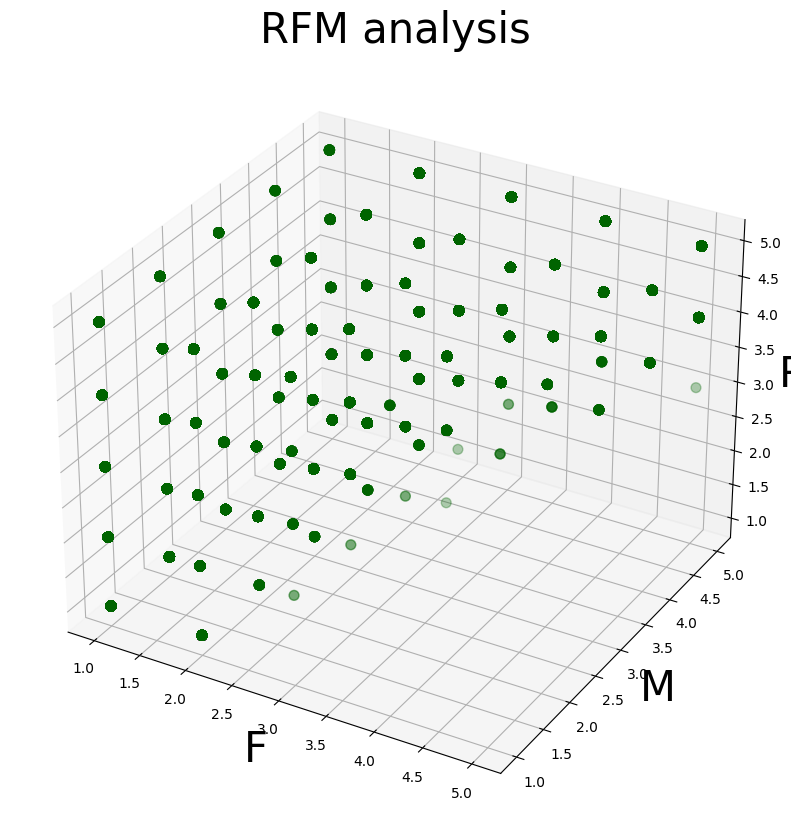

In [61]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
X = rfm_df['Frequency_Score']
Y = rfm_df['Monetary_Score']
Z = rfm_df['Recency_Score']

ax.scatter(X,Y,Z, marker='o', s = 50, c='darkgreen', alpha = 0.3)
ax.set_xlabel('F', size=30)
ax.set_ylabel('M', size=30)
ax.set_zlabel('R', size=30)
ax.set_title('RFM analysis', size = 30)

plt.show()

In [62]:
# rfm_df에 있는 Recency_Score, Frequency_Score 열을 기준으로 교차표 생성
cross_tab = pd.crosstab([rfm_df['Frequency_Score']], rfm_df['Recency_Score'], margins=True)

print(cross_tab)

Recency_Score        5     4     3     2     1    All
Frequency_Score                                      
1                 1258  1388  2576  3755  6689  15666
2                 3199  2682  3780  2647   257  12565
3                 3133  2339  1179     9     0   6660
4                 2993  1351    25     0     0   4369
5                11077   366     1     0     0  11444
All              21660  8126  7561  6411  6946  50704


In [63]:
# rfm_df에 있는 Recency_Score, Frequency_Score, Monetary_Score 열을 기준으로 교차표 생성
cross_tab = pd.crosstab([rfm_df['Frequency_Score'], rfm_df['Monetary_Score']], rfm_df['Recency_Score'], margins=True)

print(cross_tab)

Recency_Score                       5     4     3     2     1    All
Frequency_Score Monetary_Score                                      
1               1                1038  1079  2086  3006  5524  12733
                2                 102   126   230   300   482   1240
                3                  51    81   102   184   274    692
                4                  29    41    73   122   160    425
                5                  38    61    85   143   249    576
2               1                1252   873  1297  1245   140   4807
                2                 739   783   958   603    39   3122
                3                 441   432   572   307    34   1786
                4                 320   252   403   228    19   1222
                5                 447   342   550   264    25   1628
3               1                 223    36    28     2     0    289
                2                 692   479   295     2     0   1468
                3                 